# MultiOmics RNA + ATAC for Chao dataset emphasis on OL population (MORNAATACCOL) technical documentation
## Multiomics RNAseq & ATACseq on EAE model

<hr>

**This notebook is the following of MORNAATACCOL 4 notebook**

<hr>

Related paper : [Mimitou et al. (2020)](https://www.biorxiv.org/content/10.1101/2020.09.08.286914v1)

Data used in this notebook :

In [ ]:
#/Castelo_Branco/NGSDATA/EAE_multiomics_EAMM_250521/Processed_data/ARC2
#/Castelo_Branco/NGSDATA/EAE_late_multiomics_CZ_030721/Processed_data
#only the filtered_feature_bc_matrix repositories, atac_fragments.tsv.gz and atac_fragments.tsv.gz.tbi

#/Castelo_Branco/NGSDATA/Datasets_from_literature

#Memory needed for a full run : 120Gb

In [ ]:
#Early1          = P21208_1003_EAE_ARC
#PeakCtrl2       = P21208_1004_EAE_ARC
#Peak2           = P21208_1005_EAE_ARC
#Late1           = MORNAATACC_1003
#EarlyCtrl2      = P23605_1002
#Peak3           = P23605_1003
#PeakCtrl3       = P23605_1004
#EarlyCtrl3      = P24115_1001
#EarlyFemale3    = P24115_1002
#EarlyMale3      = P24115_1003
#Late2           = P25316_1001
#LateCtrl2       = P25316_1002
#Late3           = P25316_1003
#LateCtrl3       = P25316_1004
#PeakMale4        = P27208_1001
#PeakFemale4      = P27208_1002
#LateMale4        = P27208_1003
#LateFemale4      = P27208_1004

## 0. Environment status

In [5]:
%use

Subkernel 
 Kernel Name 
 Language 
 Language Module 
 Interpreter 
 
 Bash 
 bash 
 bash 
 sos_bash 
 /usr/bin/python3 
 
 Bash 
 calysto_bash 
 bash 
 sos_bash 
 python 
 
 Python3 
 python3 
 python 
 sos_python 
 python 
 
 R 
 ir 
 R 
 sos_r 
 /usr/lib/R/bin/R 
 
 SoS 
 sos 
 sos 
 
 /usr/bin/python3

In [3]:
lsb_release -a

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 20.04 LTS
Release:	20.04
Codename:	focal


In [4]:
lscpu

Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
Address sizes:       46 bits physical, 48 bits virtual
CPU(s):              20
On-line CPU(s) list: 0-19
Thread(s) per core:  1
Core(s) per socket:  10
Socket(s):           2
NUMA node(s):        2
Vendor ID:           GenuineIntel
CPU family:          6
Model:               79
Model name:          Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz
Stepping:            1
CPU MHz:             2735.498
CPU max MHz:         3100.0000
CPU min MHz:         1200.0000
BogoMIPS:            4390.12
Virtualization:      VT-x
L1d cache:           640 KiB
L1i cache:           640 KiB
L2 cache:            5 MiB
L3 cache:            50 MiB
NUMA node0 CPU(s):   0-9
NUMA node1 CPU(s):   10-19
Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cm
                     ov pat pse36 clflush dts acpi mmx fxsr sse sse2 ss ht tm pb
                     e syscall nx pdpe1gb rdtscp lm constant_t

In [5]:
grep MemTotal /proc/meminfo | awk '{print $2 / 1024}'

128374


In [ ]:
apt list --installed

In [ ]:
pip list

In [9]:
jupyter --version

Selected Jupyter core packages...
IPython          : 7.30.1
ipykernel        : 6.6.0
ipywidgets       : 7.6.5
jupyter_client   : 7.1.0
jupyter_core     : 4.9.1
jupyter_server   : 1.13.1
jupyterlab       : 3.1.17
nbclient         : 0.5.9
nbconvert        : 6.2.0
nbformat         : 5.1.3
notebook         : 6.4.6
qtconsole        : 5.2.2
traitlets        : 5.1.0


In [1]:
#conda env export -n jupyter

## 1. Loading environments

### 1.1 R Packages

In [3]:
library(Seurat)
library(Signac)
library(EnsDb.Mmusculus.v79)
library(BSgenome.Mmusculus.UCSC.mm10)
library(dplyr)
library(stringr)
library(harmony)
library(clustree)
library(data.table)
library(biomaRt)
library(cowplot)
library(randomForest)
library(ggplot2)
library(caret)
library(tidyverse)
library(pheatmap)
library(grid)
library(gridExtra)
library(biovizBase)
library(ggrepel)
library(viridis)
library(reshape2)
library(hues)
library(clusterProfiler)
library(org.Mm.eg.db)
library(ggnewscale)
library(scales)

#conda dependencies trouble
library(enrichplot)
library(ReactomePA)

#Doublet determination
#Cannot be installed through conda
library(DoubletFinder)

library(textclean)
library(mclust)

#ArchR
library(ArchR)
library(TxDb.Mmusculus.UCSC.mm10.knownGene)

library(muscat)
library(SingleCellExperiment)
library(scater)
library(cowplot)
library(UpSetR)
library(limma)
library(Matrix.utils)
library(purrr)
library(DESeq2)
library(EnhancedVolcano)

Attaching SeuratObject

Loading required package: ensembldb

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    Filter, Find, Map, Position, Reduce, anyDuplicated, aperm, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmin.int, rank, rbind, rownames, sapply, setdiff, sort, table,
    tapply, union, unique, unsplit, which.max, which.min


Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    I, expand.grid, unname


Loading required package: IRanges

Loading required package: GenomeInfoDb

Loading requir

In [4]:
sessionInfo()

R version 4.2.3 (2023-03-15)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 20.04.4 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/blas/libblas.so.3.9.0
LAPACK: /usr/lib/x86_64-linux-gnu/lapack/liblapack.so.3.9.0

locale:
 [1] LC_CTYPE=C.UTF-8    LC_NUMERIC=C        LC_TIME=C          
 [4] LC_COLLATE=C        LC_MONETARY=C       LC_MESSAGES=C      
 [7] LC_PAPER=C          LC_NAME=C           LC_ADDRESS=C       
[10] LC_TELEPHONE=C      LC_MEASUREMENT=C    LC_IDENTIFICATION=C

attached base packages:
[1] grid      stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] EnhancedVolcano_1.16.0                   
 [2] DESeq2_1.38.3                            
 [3] Matrix.utils_0.9.8                       
 [4] limma_3.54.2                             
 [5] UpSetR_1.4.0                             
 [6] scater_1.26.1                            
 [7] scuttle_1.8.4                            
 [8] Sing

### 1.2 Functions

In [5]:
PrctCellExpringGene <- function(object, genes, group.by = "all"){
    if(group.by == "all"){
        prct = unlist(lapply(genes,calc_helper, object=object))
        result = data.frame(Markers = genes, Cell_proportion = prct)
        return(result)
    }

    else{        
        list = SplitObject(object, group.by)
        factors = names(list)

        results = lapply(list, PrctCellExpringGene, genes=genes)
        for(i in 1:length(factors)){
        results[[i]]$Feature = factors[i]
        }
        combined = do.call("rbind", results)
        return(combined)
    }
}

calc_helper <- function(object,genes){
    counts = object[['RNA']]@counts
    ncells = ncol(counts)
    if(genes %in% row.names(counts)){
    sum(counts[genes,]>0)/ncells
    }else{return(NA)}
}

NbCellExpringGene <- function(object, genes, group.by = "all"){
    if(group.by == "all"){
        nb = unlist(lapply(genes,calc_helper_nb, object=object))
        result = data.frame(Markers = genes, Cell_nb = nb)
        return(result)
    }

    else{        
        list = SplitObject(object, group.by)
        factors = names(list)

        results = lapply(list, NbCellExpringGene, genes=genes)
        for(i in 1:length(factors)){
        results[[i]]$Feature = factors[i]
        }
        combined = do.call("rbind", results)
        return(combined)
    }
}

calc_helper_nb <- function(object,genes){
    counts = object[['RNA']]@counts
    if(genes %in% row.names(counts)){
    length(counts[genes,][counts[genes,] > 0])
    }else{return(NA)}
}

DoMultiBarHeatmap <- function (object, features = NULL, cells = NULL, group.by = "ident", additional.group.by = NULL, additional.group.sort.by = NULL,  cols.use = NULL, group.bar = TRUE, disp.min = -2.5, disp.max = NULL, slot = "scale.data", assay = NULL, label = TRUE, size = 5.5, hjust = 0, angle = 45, raster = TRUE, draw.lines = TRUE, lines.width = NULL, group.bar.height = 0.02, combine = TRUE){

  cells <- cells %||% colnames(x = object)
  if (is.numeric(x = cells)) {
    cells <- colnames(x = object)[cells]
  }
  assay <- assay %||% DefaultAssay(object = object)
  DefaultAssay(object = object) <- assay
  features <- features %||% VariableFeatures(object = object)
  ## Why reverse???
  features <- rev(x = unique(x = features))
  disp.max <- disp.max %||% ifelse(test = slot == "scale.data", yes = 2.5, no = 6)
  possible.features <- rownames(x = GetAssayData(object = object, slot = slot))
  if (any(!features %in% possible.features)) {
    bad.features <- features[!features %in% possible.features]
    features <- features[features %in% possible.features]
    if (length(x = features) == 0) {
      stop("No requested features found in the ", slot,
      " slot for the ", assay, " assay.")
    }
    warning("The following features were omitted as they were not found in the ", slot, " slot for the ", assay, " assay: ", paste(bad.features, collapse = ", "))
  }

  if (!is.null(additional.group.sort.by)) {
    if (any(!additional.group.sort.by %in% additional.group.by)) {
      bad.sorts <- additional.group.sort.by[!additional.group.sort.by %in% additional.group.by]
      additional.group.sort.by <- additional.group.sort.by[additional.group.sort.by %in% additional.group.by]
      if (length(x = bad.sorts) > 0) {
        warning("The following additional sorts were omitted as they were not a subset of additional.group.by : ",
        paste(bad.sorts, collapse = ", "))
      }
    }
  }

  data <- as.data.frame(x = as.matrix(x = t(x = GetAssayData(object = object, slot = slot)[features, cells, drop = FALSE])))

  object <- suppressMessages(expr = StashIdent(object = object, save.name = "ident"))
  group.by <- group.by %||% "ident"
  groups.use <- object[[c(group.by, additional.group.by[!additional.group.by %in% group.by])]][cells, , drop = FALSE]
  plots <- list()
  for (i in group.by) {
    data.group <- data
    if (!is.null(additional.group.by)) {
      additional.group.use <- additional.group.by[additional.group.by!=i]
      if (!is.null(additional.group.sort.by)){
        additional.sort.use = additional.group.sort.by[additional.group.sort.by != i]
      } else {
        additional.sort.use = NULL
      }
    } else {
      additional.group.use = NULL
      additional.sort.use = NULL
    }

    group.use <- groups.use[, c(i, additional.group.use), drop = FALSE]

    for(colname in colnames(group.use)){
      if (!is.factor(x = group.use[[colname]])) {
        group.use[[colname]] <- factor(x = group.use[[colname]])
      }
    }

    if (draw.lines) {
      lines.width <- lines.width %||% ceiling(x = nrow(x = data.group) * 0.0025)
      placeholder.cells <- sapply(X = 1:(length(x = levels(x = group.use[[i]])) * lines.width), FUN = function(x) {
        return(Seurat:::RandomName(length = 20))
      })
      placeholder.groups <- data.frame(rep(x = levels(x = group.use[[i]]), times = lines.width))
      group.levels <- list()
      group.levels[[i]] = levels(x = group.use[[i]])
      for (j in additional.group.use) {
        group.levels[[j]] <- levels(x = group.use[[j]])
        placeholder.groups[[j]] = NA
      }

      colnames(placeholder.groups) <- colnames(group.use)
      rownames(placeholder.groups) <- placeholder.cells

      group.use <- sapply(group.use, as.vector)
      rownames(x = group.use) <- cells

      group.use <- rbind(group.use, placeholder.groups)

      for (j in names(group.levels)) {
        group.use[[j]] <- factor(x = group.use[[j]], levels = group.levels[[j]])
      }

      na.data.group <- matrix(data = NA, nrow = length(x = placeholder.cells), ncol = ncol(x = data.group), dimnames = list(placeholder.cells, colnames(x = data.group)))
      data.group <- rbind(data.group, na.data.group)
    }

    order_expr <- paste0('order(', paste(c(i, additional.sort.use), collapse=','), ')')
    group.use = with(group.use, group.use[eval(parse(text=order_expr)), , drop=F])

    plot <- Seurat:::SingleRasterMap(data = data.group, raster = raster, disp.min = disp.min, disp.max = disp.max, feature.order = features, cell.order = rownames(x = group.use), group.by = group.use[[i]])

    if (group.bar) {
      pbuild <- ggplot_build(plot = plot)
      group.use2 <- group.use
      cols <- list()
      na.group <- Seurat:::RandomName(length = 20)
      for (colname in rev(x = colnames(group.use2))) {
        if (colname == i) {
          colid = paste0('Identity (', colname, ')')
        } else {
          colid = colname
        }

        # Default
        cols[[colname]] <- c(scales::hue_pal()(length(x = levels(x = group.use[[colname]]))))

        #Overwrite if better value is provided
        if (!is.null(cols.use[[colname]])) {
          req_length = length(x = levels(group.use))
          if (length(cols.use[[colname]]) < req_length){
            warning("Cannot use provided colors for ", colname, " since there aren't enough colors.")
          } else {
            if (!is.null(names(cols.use[[colname]]))) {
              if (all(levels(group.use[[colname]]) %in% names(cols.use[[colname]]))) {
                cols[[colname]] <- as.vector(cols.use[[colname]][levels(group.use[[colname]])])
              } else {
                warning("Cannot use provided colors for ", colname, " since all levels (", paste(levels(group.use[[colname]]), collapse=","), ") are not represented.")
              }
            } else {
              cols[[colname]] <- as.vector(cols.use[[colname]])[c(1:length(x = levels(x = group.use[[colname]])))]
            }
          }
        }

        # Add white if there's lines
        if (draw.lines) {
          levels(x = group.use2[[colname]]) <- c(levels(x = group.use2[[colname]]), na.group)
          group.use2[placeholder.cells, colname] <- na.group
          cols[[colname]] <- c(cols[[colname]], "#FFFFFF")
        }
        names(x = cols[[colname]]) <- levels(x = group.use2[[colname]])

        y.range <- diff(x = pbuild$layout$panel_params[[1]]$y.range)
        y.pos <- max(pbuild$layout$panel_params[[1]]$y.range) + y.range * 0.015
        y.max <- y.pos + group.bar.height * y.range
        pbuild$layout$panel_params[[1]]$y.range <- c(pbuild$layout$panel_params[[1]]$y.range[1], y.max)

        plot <- suppressMessages(plot +
          annotation_raster(raster = t(x = cols[[colname]][group.use2[[colname]]]),  xmin = -Inf, xmax = Inf, ymin = y.pos, ymax = y.max) +
          annotation_custom(grob = grid::textGrob(label = colid, hjust = 0, gp = gpar(cex = 0.75)), ymin = mean(c(y.pos, y.max)), ymax = mean(c(y.pos, y.max)), xmin = Inf, xmax = Inf) +
          coord_cartesian(ylim = c(0, y.max), clip = "off")
        )


        if ((colname == i) && label) {
          x.max <- max(pbuild$layout$panel_params[[1]]$x.range)
          x.divs <- pbuild$layout$panel_params[[1]]$x.major %||% pbuild$layout$panel_params[[1]]$x$break_positions()
          group.use$x <- x.divs

          label.x.pos <- tapply(X = group.use$x, INDEX = group.use[[colname]], FUN = median) * x.max
          label.x.pos <- data.frame(group = names(x = label.x.pos), label.x.pos)
          plot <- plot + geom_text(stat = "identity", data = label.x.pos, aes_string(label = "group", x = "label.x.pos"), y = y.max + y.max *  0.03 * 0.5, angle = angle, hjust = hjust, size = size)
          plot <- suppressMessages(plot + coord_cartesian(ylim = c(0, y.max + y.max * 0.002 * max(nchar(x = levels(x = group.use[[colname]]))) * size), clip = "off"))
        }
      }
    }
    plot <- plot + theme(line = element_blank())
    plots[[i]] <- plot
  }
  if (combine) {
    plots <- CombinePlots(plots = plots)
  }
  return(plots)
}


#####################################################
# Function for getting the marker peaks from the Seurat
# object, based on the current ident
#####################################################
getMarkerPeaks <- function(obj, doublets, n_peaks = 100, min_cells = 200){

  n_clusters = length(unique(as.vector(Idents(obj))))
  
  cells <- Cells(obj)
  
  # remove the doublet cells for better marker peaks
  obj <- subset(obj, cells = cells[!cells %in% doublets])
  
  obj@assays$ATAC@data@x <- obj@assays$ATAC@counts@x
  
  # default preporcessing o Signac applied
  obj <- RunTFIDF(obj, verbose = F)
  obj <- FindTopFeatures(obj, min.cutoff = NULL, verbose = F)
  obj <- RunSVD(
    object = obj,
    reduction.key = 'SVD_',
    reduction.name = 'svd',
    seed.use = 1,
    verbose = F
  )
  
  # get the marker peaks between all clusters
  da_peaks <- FindAllMarkers(
    object = obj,
    slot = "data",
    min.pct = 0.1,
    only.pos = TRUE,
    test.use = 'LR',
    min.cells.group = min_cells,
    verbose = F
  )
  
  # only keep the significant peaks
  metadata = lapply(unique(da_peaks$cluster), function(x){
    return(data.frame(da_peaks[da_peaks$p_val_adj < 0.05 & da_peaks$cluster == x,]))
  })
  
  names(metadata) <- paste0("Cluster_", unique(da_peaks$cluster))
  
  rm(da_peaks)
  
  meta_peaks = data.frame()
  
  for (i in names(metadata)) {
    
    cur_meta = data.frame(metadata[[i]])
    cur_meta$peaks = row.names(metadata[[i]])
    cur_meta$cluster = i
    row.names(cur_meta) = c()
    
    meta_peaks = rbind(meta_peaks, cur_meta)
    
    rm(cur_meta)
    
  }
  
  # sort the peaks based on the fold changes and signifigance, choose ones with high FC first
  meta_peaks = meta_peaks[order(meta_peaks$avg_logFC, -meta_peaks$p_val_adj, decreasing = T),]
  
  marker_peaks_set = data.frame(matrix(ncol=2,nrow=0, dimnames=list(NULL, c("gene", "cluster"))))
  
  # extract 100 marker peaks for each cluster
  while(nrow(marker_peaks_set) < n_peaks*n_clusters) {
    
    temp = meta_peaks[1, c("gene", "cluster")]
    
    marker_peaks_set = rbind(marker_peaks_set, temp)
    
    meta_peaks = meta_peaks[which(meta_peaks$gene != temp$gene),]
    
    if(length(which(marker_peaks_set$cluster == temp$cluster)) == n_peaks){
      meta_peaks = meta_peaks[which(meta_peaks$cluster != temp$cluster),]
    }
    
    rm(temp)
  }
  
  marker_peaks_set = marker_peaks_set[!is.na(marker_peaks_set$gene),]
  
  marker_peaks_set$cluster= factor(marker_peaks_set$cluster, levels = str_sort(unique(marker_peaks_set$cluster), numeric = T))
  marker_peaks_set = marker_peaks_set[order(marker_peaks_set$cluster),]
  
  rm(meta_peaks)
  
  colnames(marker_peaks_set)[1]<- "peaks"
  
  return(marker_peaks_set)
}

############################################
# get the readcount distribution profile for
# the singlet cells of every cluster
############################################
annotateDoublets <- function(obj, marker_peaks, doublets, k = 15){

  # get the read count distributions on the cluster specific marker peaks for all of the cells
  cell.values <- getCellValues(obj, cells = Cells(obj), marker_peaks_set = marker_peaks, doublets = doublets, k = k)
  
  #get the profile for the singlet cells of each cluster
  singlet.profile <- getProfiles(cell.values)
 
  # just annotate the doublets
  doublets <- cell.values %>% 
    subset(doublet == "doublet")
  
  clusters <- doublets %>% dplyr::select(starts_with("Cluster_")) %>% colnames()
  
  # look at every cluster in the data
  a.class <- lapply(clusters, function(clus){
    
    # just select the doublets that have the current cluster
    # as its most dominant cluster
    t.doublets <- doublets %>%
      subset(a.homotypic == clus, select = clusters)
    
    # get the profile of the current cluster
    t.profile <- singlet.profile[,clus]
    
    # calculate the distance of doublet cell distributions to
    # the profile of the current cluster
    t.dist <- apply(t.doublets, 1, function(cell){
      return(dist(rbind(cell, t.profile)))
    })
    
    # fit a GMM using the mclust package with no class limitations
    fit <- Mclust(t.dist, verbose = F)
    t.class <- fit$classification
    
    t.doublets$dist <- t.dist[rownames(t.doublets)]
    t.doublets$class <- t.class[rownames(t.doublets)]
    t.doublets$max.class <- names(which.max(fit[["parameters"]][["mean"]]))
    t.doublets$num.class <- length(unique(fit$classification))
    return(t.doublets[,c("dist", "class", "max.class", "num.class")])
  }) %>% bind_rows()
  
  doublets$class <- a.class[rownames(doublets),"class"]
  doublets$max.class <- a.class[rownames(doublets),"max.class"]
  doublets$num.class <- a.class[rownames(doublets),"num.class"]
  
  doublets <- lapply(rownames(doublets), function(cell){
    probs <- doublets[cell, clusters]
    
    # only classify the doublets that belong to the final class 
    # doublets[cell,"type"] <- ifelse(doublets[cell,"class"]== doublets[cell,"max.class"], "heterotypic", "homotypic")
    doublets[cell,"d.type"] <- ifelse(doublets[cell,"class"]== doublets[cell,"max.class"] & doublets[cell,"num.class"] > 1,
                                    "heterotypic", "homotypic")
    
    # report the top clusters based on type of the doublet; if homotypic just one, if heterotypic top 2 clusters
    doublets[cell, "d.annotation"] <- ifelse(doublets[cell,"d.type"] == "homotypic",
                                             names(probs)[order(probs, decreasing = T)[1]],
                                             paste(sort(names(probs)[order(probs, decreasing = T)[1:2]]), collapse = ".")) 
    
    return(doublets[cell,!(colnames(doublets) %in% c("a.heterotypic", "a.homotypic", "ident", "class", "max.class","num.class")), drop = FALSE])
  }) %>% bind_rows()

  return(doublets)
}

#####################################################
# Function to get the ditsribution of read counts on
# the marker peaks of clusters
#####################################################
getReadCountDistributions <- function(marker_peaks, read_counts){
  
  t_read_counts = data.frame(merge(marker_peaks, 100*read_counts, by.x = "peaks", by.y = 0, sort = F))
  names(t_read_counts) <- sub("^X", "", names(t_read_counts))
  t_read_counts$ids = unclass(t_read_counts$cluster)
  
  probs = matrix(nrow = ncol(read_counts), ncol = length(unique(t_read_counts$cluster)))
  
  row.names(probs) <- colnames(read_counts)
  colnames(probs) <- unique(t_read_counts$cluster)
  
  for (i in 1:nrow(probs)) {
    density_data = vector()
    
    for(j in 1:nrow(t_read_counts))
      density_data = c(density_data, rep(t_read_counts$ids[j], t_read_counts[j,row.names(probs)[i]]))
    
    for(j in 1:ncol(probs)){
      if(j==1)
        probs[i,j] = ecdf(density_data)(j)
      else
        probs[i,j] = (ecdf(density_data)(j) - ecdf(density_data)((j-1)))
    }
    
  }
  
  return(data.frame(probs))
}

#####################################################
# Function to plot the read count distributions of
# the given cells
#####################################################
plotReadCountDistributions <- function(probs, folder_path){
  
  if(!dir.exists(folder_path))
    dir.create(folder_path)
  
  sapply(rownames(probs), function(x){long_probs = gather(as.data.frame(bind_rows(probs[x,])), cell_type, probability, factor_key = TRUE)
  ggplot(data=long_probs, aes(x=cell_type, y=probability)) +
    geom_col() +
    theme(axis.text.x = element_text(angle = 90)) +
    ggtitle(x) + xlab("Cluster") + ylab("Score") + ylim(0,1) +
    ggsave(filename = paste0(folder_path, "/Probs_", x, ".pdf"))})
  
}

#####################################################
# Function to add read count distributions for the 
# cells in the provided in te Seurat object with the
# provided marker peaks
#####################################################
getCellValues <- function(obj, cells, marker_peaks_set, doublets, k = 15){
  
  obj@assays$ATAC@data@x <- obj@assays$ATAC@counts@x
  
  obj <- RunTFIDF(obj, verbose = F)
  obj <- FindTopFeatures(obj, min.cutoff = NULL, verbose = F)
  obj <- RunSVD(
    object = obj,
    reduction.key = 'SVD_',
    reduction.name = 'svd',
    seed.use = 1,
    verbose = F
  )
  
  # get the neighbor graph of the cells for aggregation
  obj <- FindNeighbors(obj, reduction = "svd", dims = 1:50, k.param = k+1, verbose = F)
  
  cell_annotations <- lapply(cells, function(cell){
    
    # extract the k neighbors of the current cell
    neighbors <- names(obj@graphs$ATAC_nn[cell, obj@graphs$ATAC_nn[cell,] > 0])
    
    # extract the reads for the cell and its k-nearest neighbors
    reads <- Matrix::as.matrix(subset(obj, cells = neighbors, features = marker_peaks_set$peaks)@assays[["ATAC"]]@counts)
    
    no_clusters <- length(unique(marker_peaks_set$cluster))
    
    results = data.frame(matrix(nrow = 0, ncol = no_clusters+1)) %>%
      `colnames<-`(value = c("cell_id", as.character(unique(marker_peaks_set$cluster))))
    
    results[cell,"cell_id"] = cell
    
    # aggregate the reads for the cell by taking the mean with k-nn
    reads <- data.frame(apply(reads, 1, mean)) %>%
      `colnames<-`(value = cell)
    
    if(colSums(reads) == 0){
      results[,-1] <- 0
      
      results[cell, "a.heterotypic"] <- NA
      results[cell, "a.homotypic"] <- NA
        
      return(results)
    }
    
    # calculate the read count distribution of the cell on the marker peaks
    doublet_probs <- reads %>%
      getReadCountDistributions(marker_peaks_set,.) %>% data.frame()
    
    results[cell, colnames(doublet_probs)] <- doublet_probs
    
    # report the 2 clusters that have the highest score
    results[cell, "a.heterotypic"] <- paste(names(doublet_probs)[order(doublet_probs, decreasing = T)[1:2]], collapse = ".")
    
    #report the cluster with highest score
    results[cell, "a.homotypic"] <- names(which.max(doublet_probs))
    
    return(results)
  }) %>% do.call(rbind, .)
  
  # append the type of the cells
  cell_annotations <- mutate(cell_annotations, doublet = ifelse(cell_id %in% doublets, "doublet", "singlet"))
  row.names(cell_annotations) <- cell_annotations$cell_id
  
  cell_annotations[, "ident"] <- Idents(obj)[rownames(cell_annotations)]
  
  return(cell_annotations)
}

#####################################################
# get the read count distribution profile for the
# singlet cells of every cluster
#####################################################
getProfiles <- function(cell.values){

  # get the singlet cells
  singlets <- cell.values %>%
    subset(doublet == "singlet")
  
  clusters <- singlets %>% dplyr::select(starts_with("Cluster_")) %>% colnames()
  
  # for each cluster in the data find the average profile from singlets
  t.profile <- sapply(clusters, function(clus){
    t.singlets <- singlets %>%
      subset(a.homotypic == clus & paste0("Cluster_", ident) == clus, select = clusters)
    
    t.profile <- apply(t.singlets,2,mean)
    return(t.profile)
  })
  
  return(t.profile)
  
}

save_pheatmap_pdf <- function(x, filename, width=7, height=7) {
    stopifnot(!missing(x))
    stopifnot(!missing(filename))
    pdf(filename, width=width, height=height)
    grid::grid.newpage()
    grid::grid.draw(x$gtable)
    dev.off()
}

### 1.3 Set up R parameters

In [6]:
#Set up global parameters
OS_path <- "/sing_data/"
macs2_path = "/usr/local/bin/macs2"
amulet_path = "/AMULET"
#Conda Monod
#OS_path <- "/datb/gcb/gcb_bh/"
#macs2_path = "/home/bastien/miniconda3/envs/jupyter_MORNAATACC/bin/macs2"
#amulet_path = "/home/bastien/AMULET"

OS_path_datasets <- paste0(OS_path, "Data/MORNAATACC/Alignment/")
OS_path_outputs <- paste0(OS_path, "Data/MORNAATACC/Outputs/")
OS_path_inputs <- paste0(OS_path, "Data/MORNAATACC/Inputs/")
datasets_path <- paste0(OS_path,"Data/Others/Datasets/")

seed <- 424242
options(repr.plot.width=16, repr.plot.height=12)
options(future.globals.maxSize = 8000 * 1024^2)

options(repr.matrix.max.rows=100, repr.matrix.max.cols=100)

In [7]:
#Blue
#DDEAF8
#BBD4F1
#88B4E7
#5695DC
#2A75CB
#1F5898
#153B66

#Green
#E9EDE9
#D2DAD2
#B0BFB0
#8FA38F
#6E876E
#536553
#374337

#Gold
#FFF3D6
#FFE7AD
#FFD470
#FFC233
#F5AB00
#B88100
#7A5600

#Orange
#FDDDD8
#FBBAB1
#F88877
#F5563D
#E92A0C
#AE1F09
#741506

#Brown
#EFE7E6
#E0CECD
#C8A9A7
#B08482
#97615E
#714947
#4B312F

#Purple
#F6EEFC
#ECDCF9
#E2CBF6
#D8B9F3
#CEA8F0
#C596ED
#BB85EA
#B173E7
#A862E4
#9E51E1
#943FDE
#8A2EDC
#8023D1
#7621C0
#6B1EAE
#601B9D
#55188C
#4B157A
#401269
#350F57
#2A0C45
#1F0934
#150623
#0B0312

#Honey
#FFF9EB
#FFF3D6
#FFEDC2
#FFE7AD
#FFE099
#FFDA85
#FFD470
#FFCE5C
#FFC847
#FFC233
#FFBC1F
#FFB60A
#F5AB00
#E09D00
#CC8F00
#B88100
#A37200
#8F6400
#7A5600
#664700
#523900
#3D2B00
#291D00
#140E00

In [8]:
names_Ctrl <- c("EarlyCtrl2", "EarlyCtrl3", "PeakCtrl2", "PeakCtrl3", "LateCtrl1", "LateCtrl2", "LateCtrl3")
names_Early <- c("Early1", "EarlyMale3", "EarlyFemale3")
names_Peak <- c("Peak2", "Peak3", "PeakMale4", "PeakFemale4")
names_Late <- c("Late1", "Late2","Late3", "LateMale4", "LateFemale4")

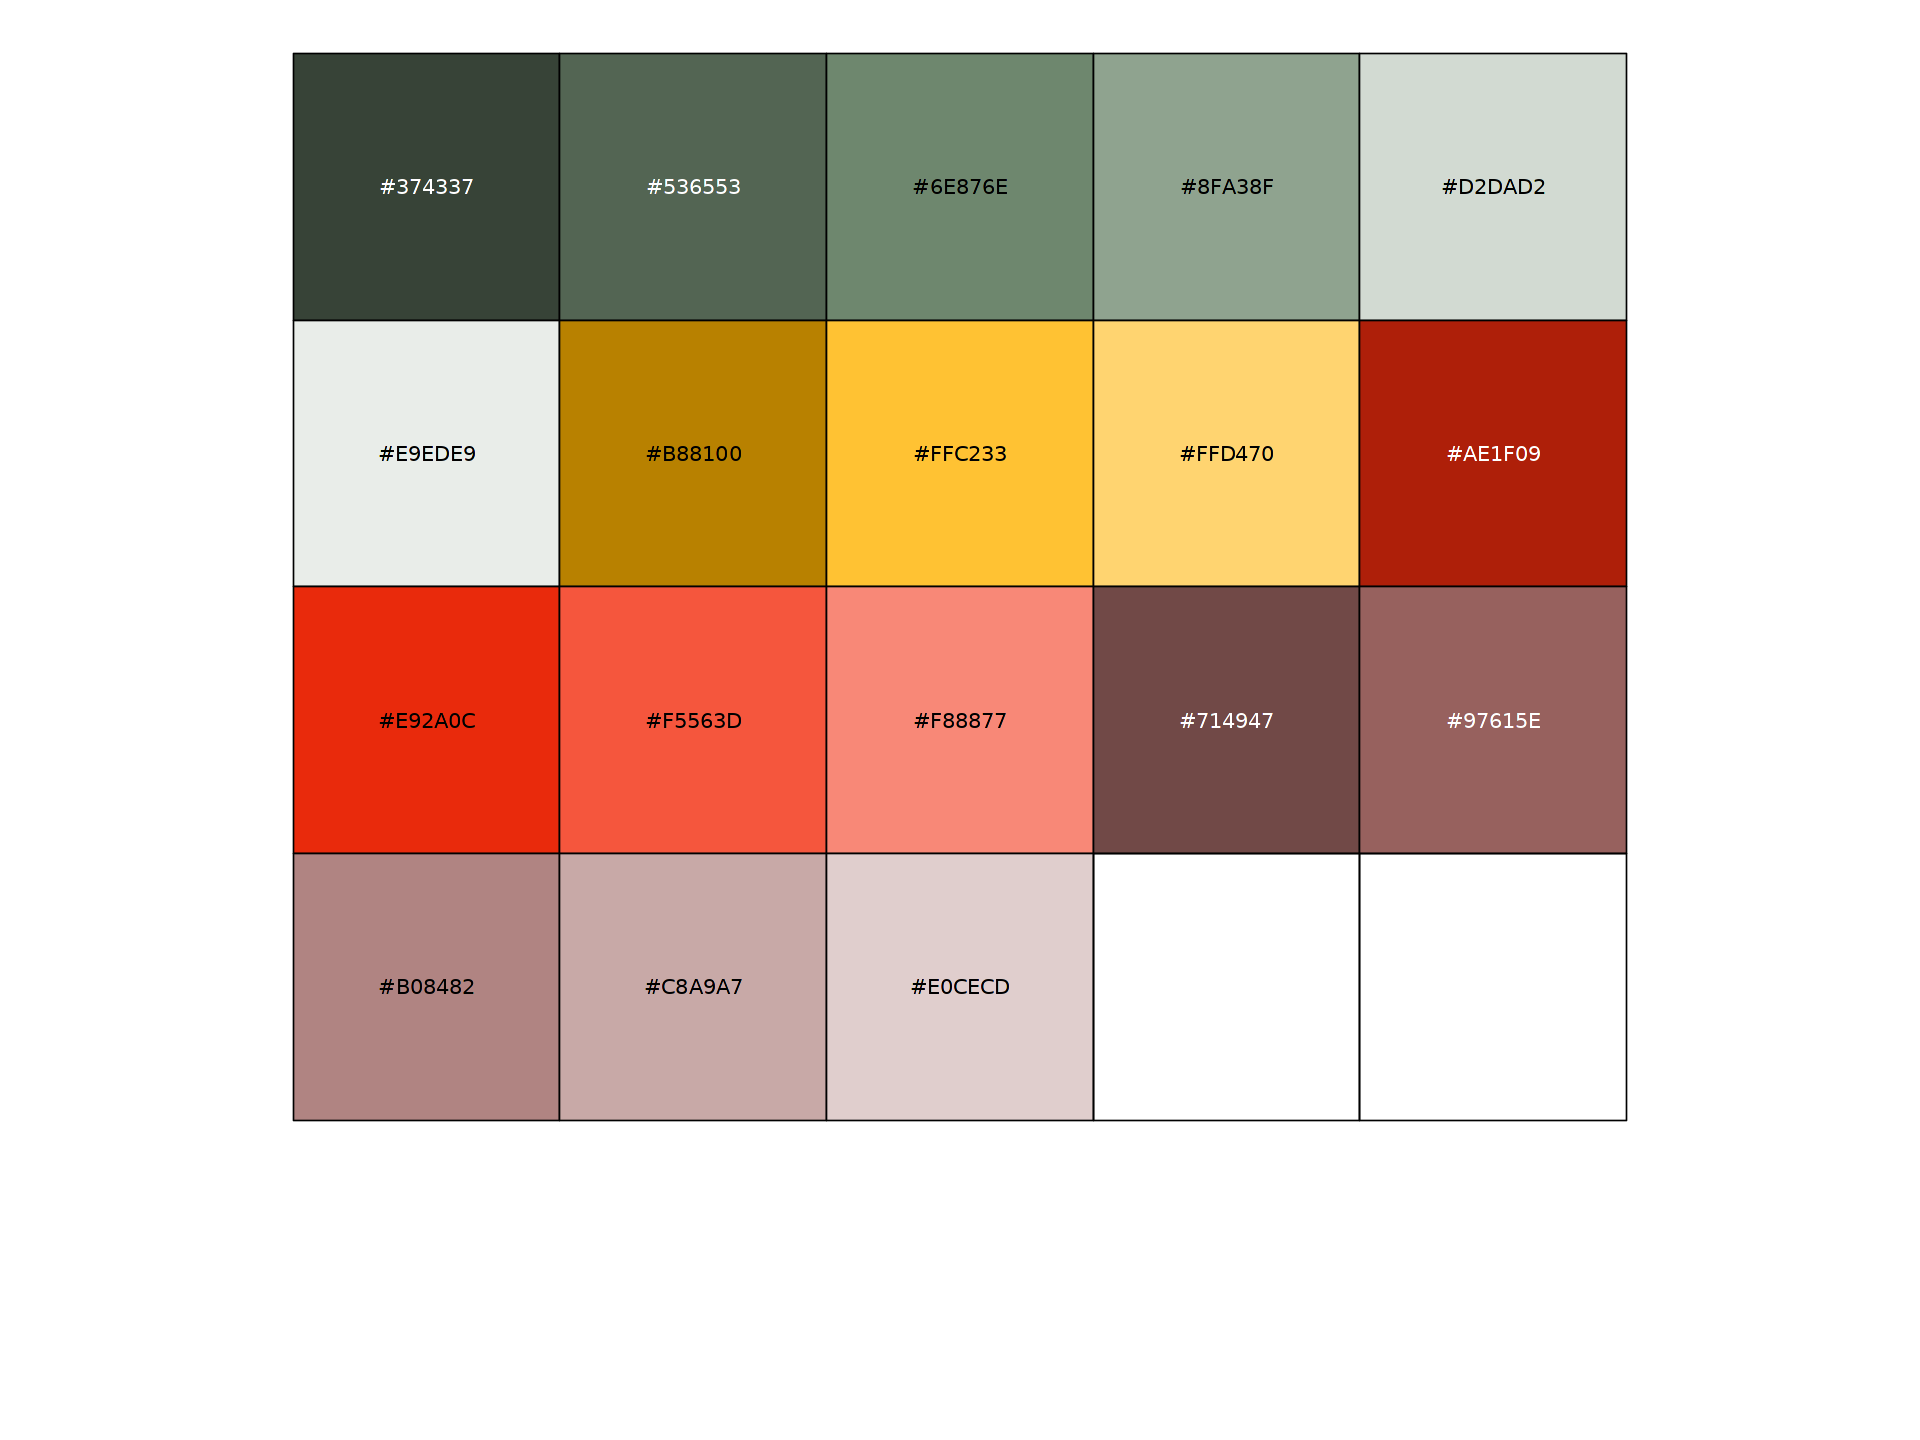

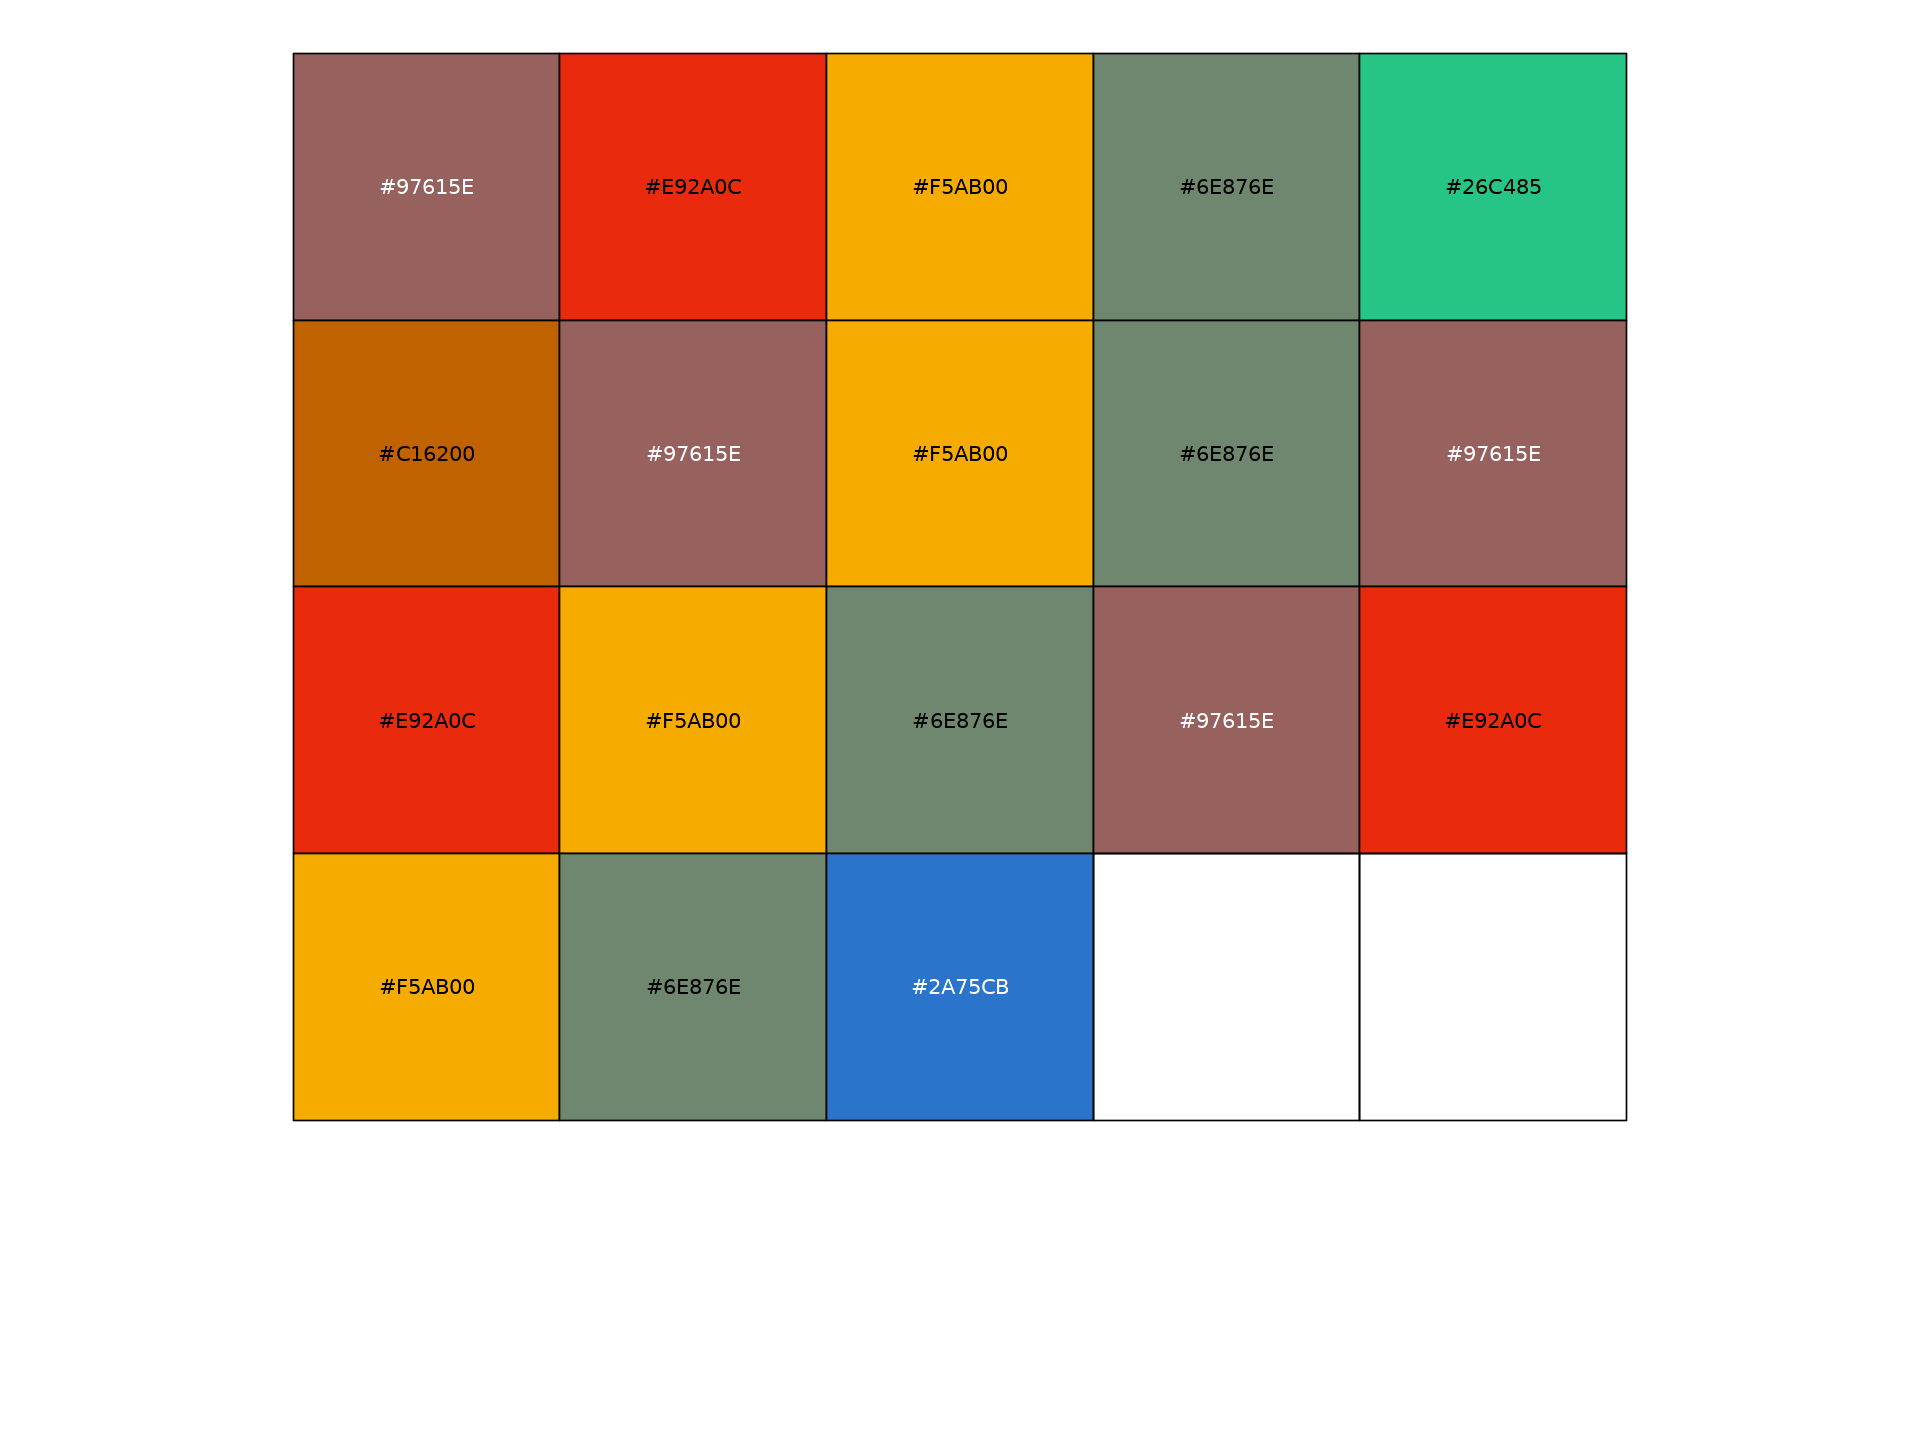

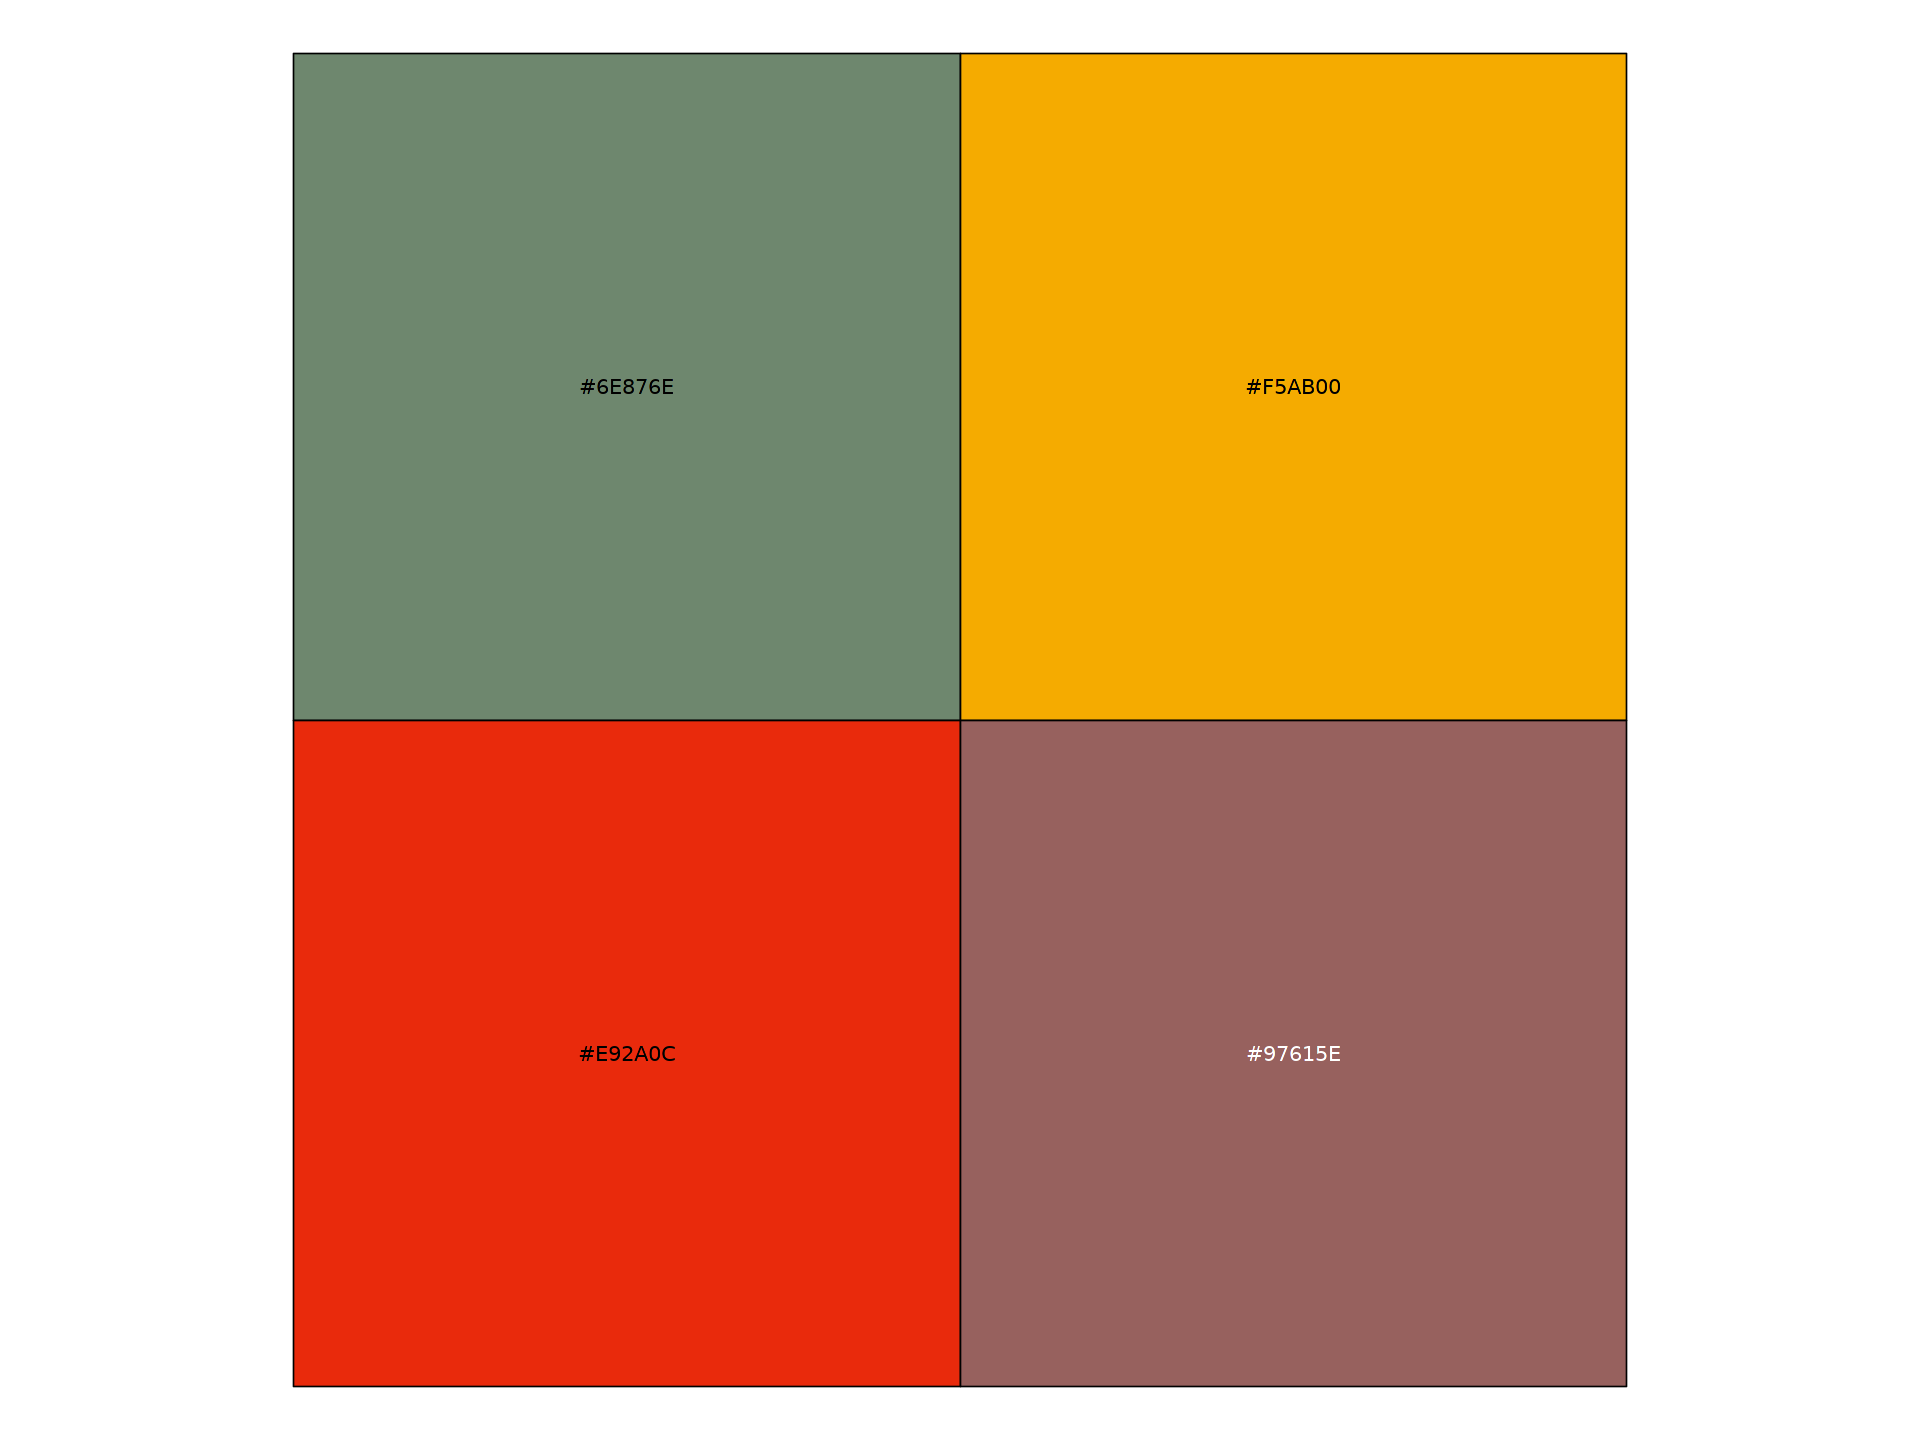

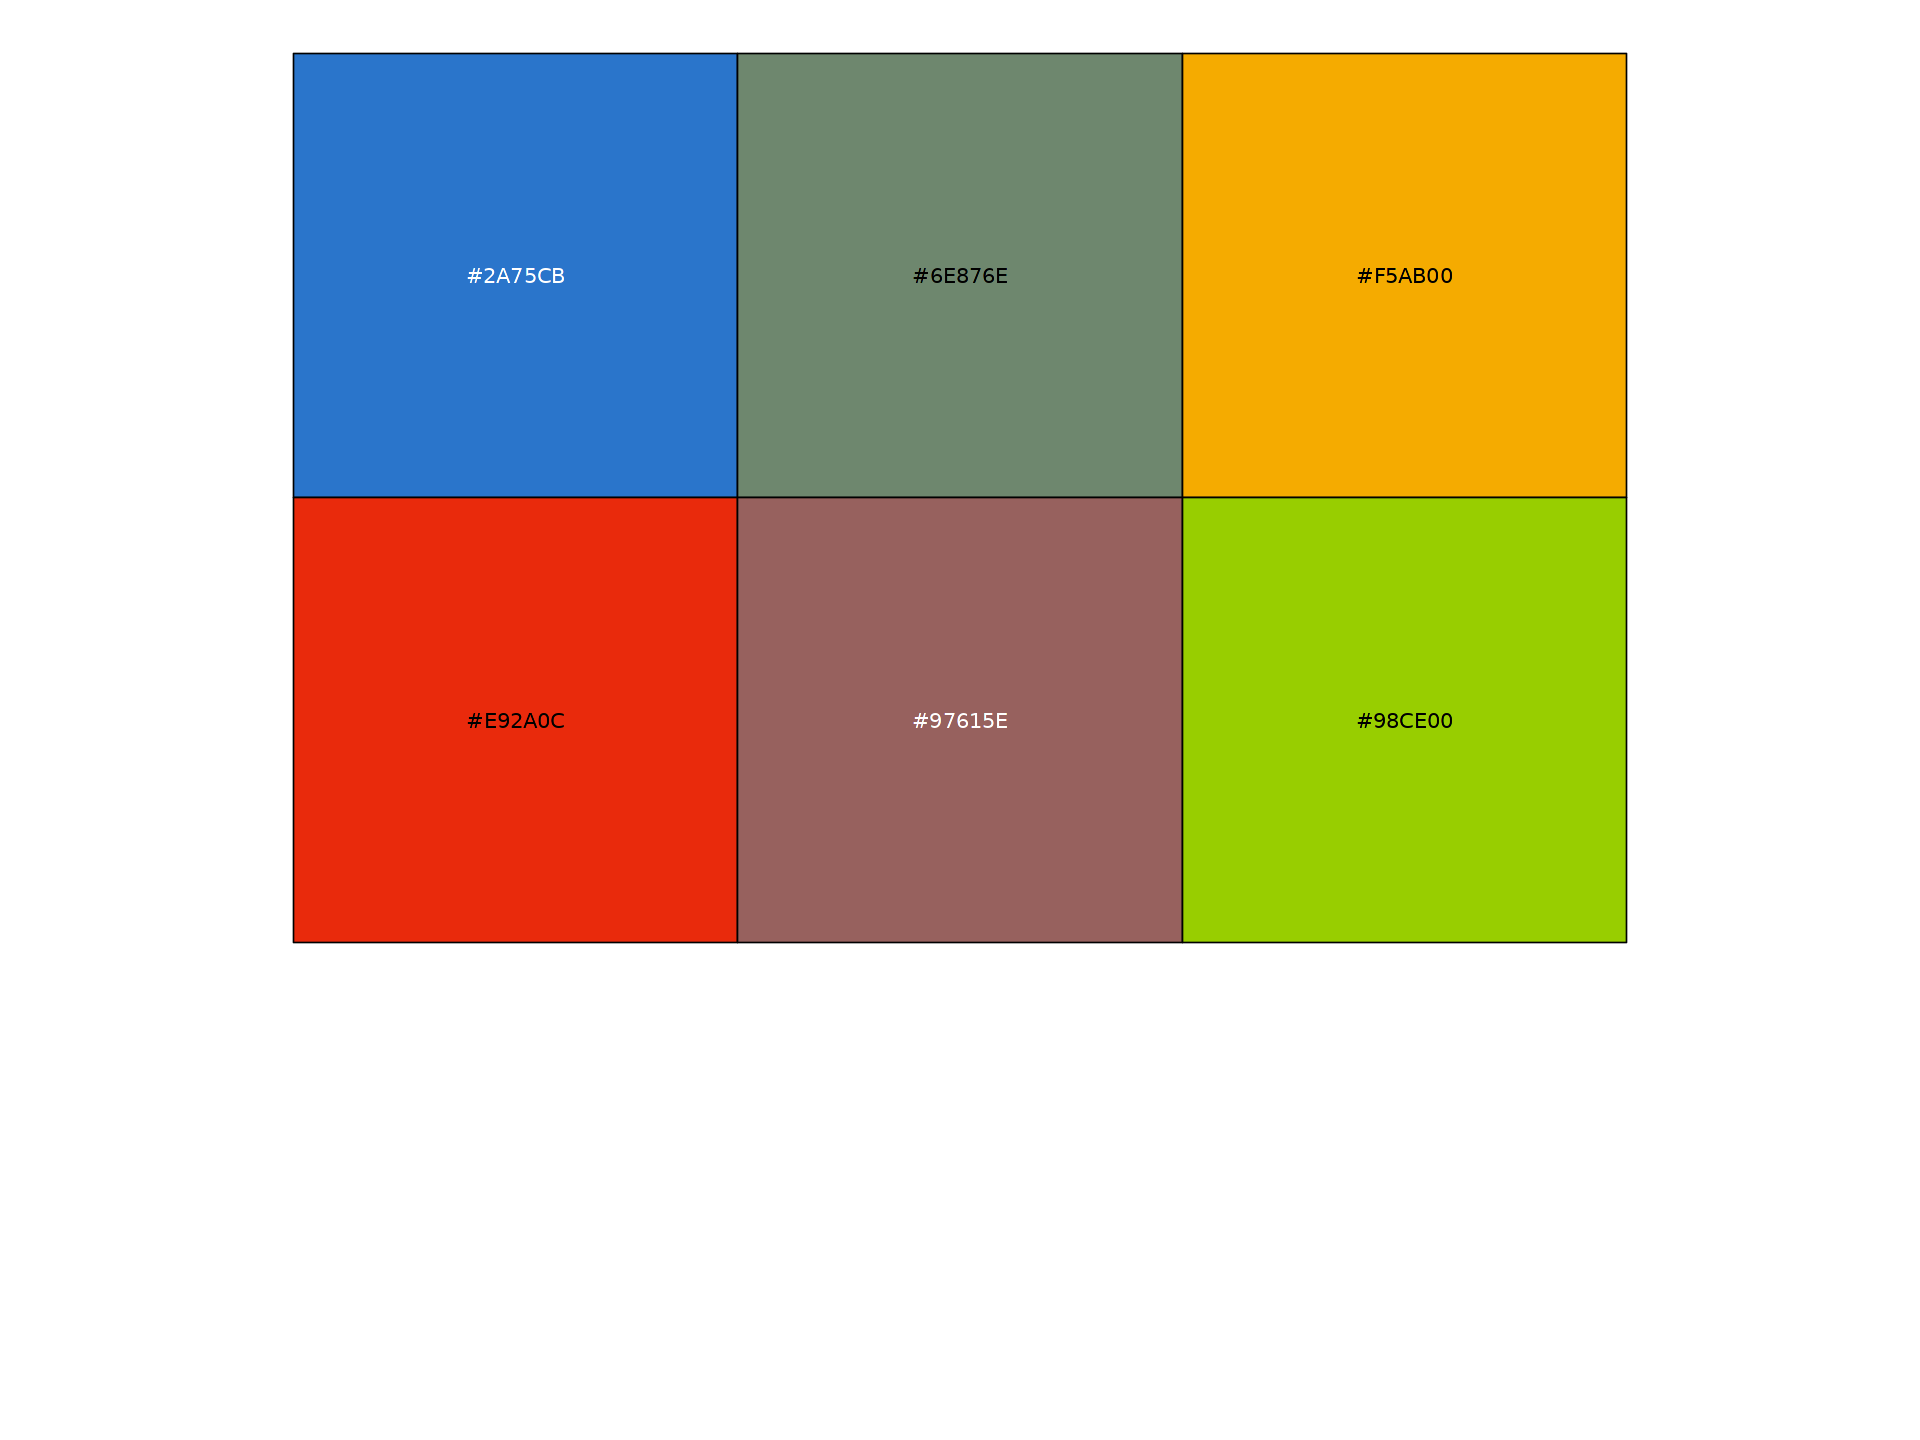

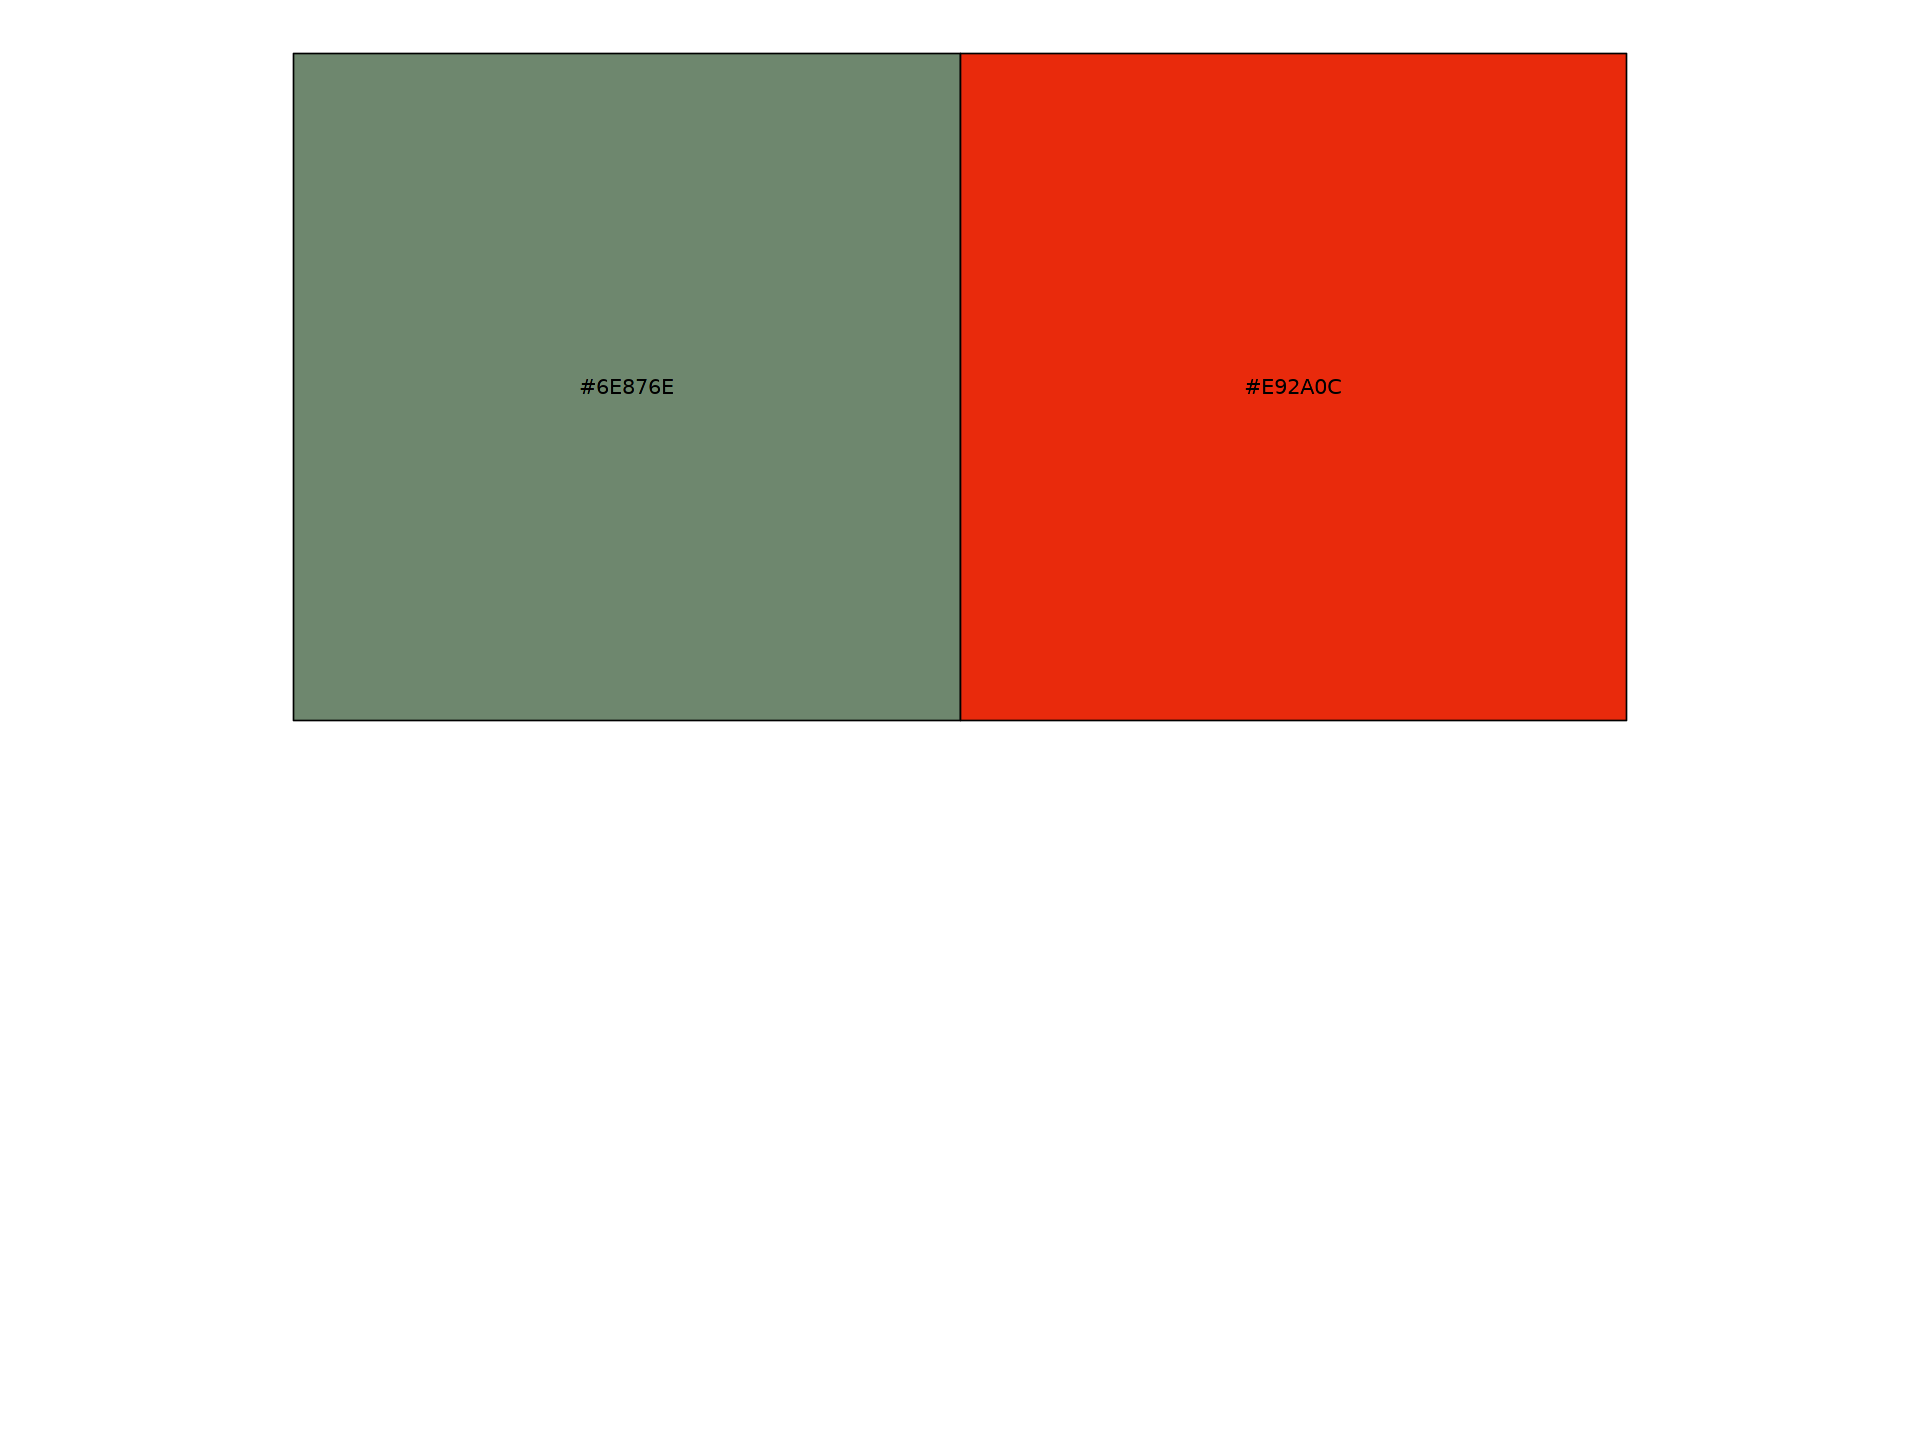

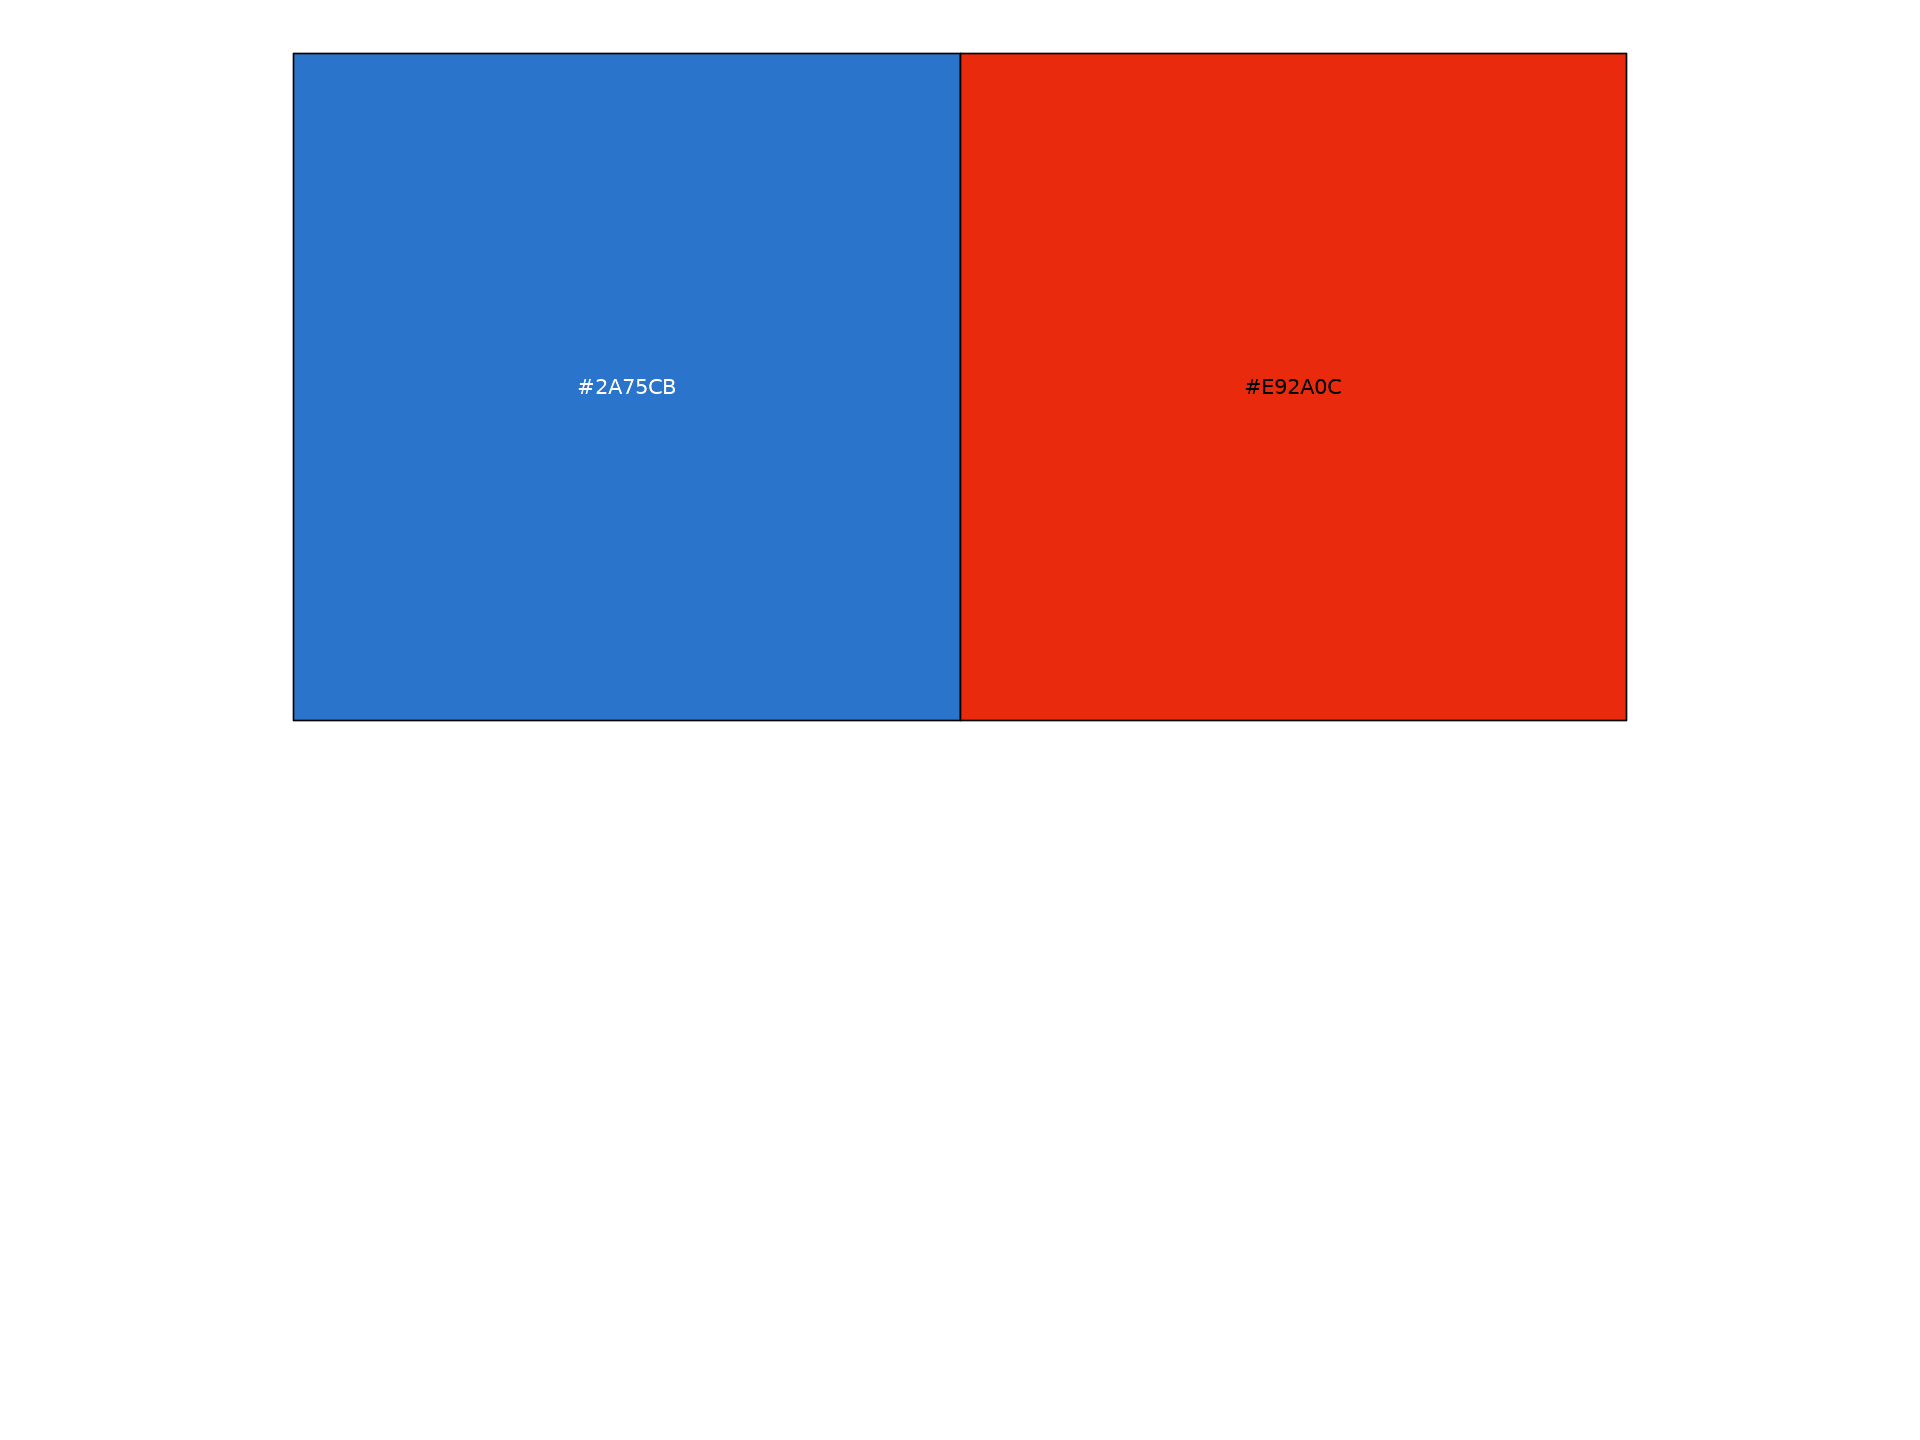

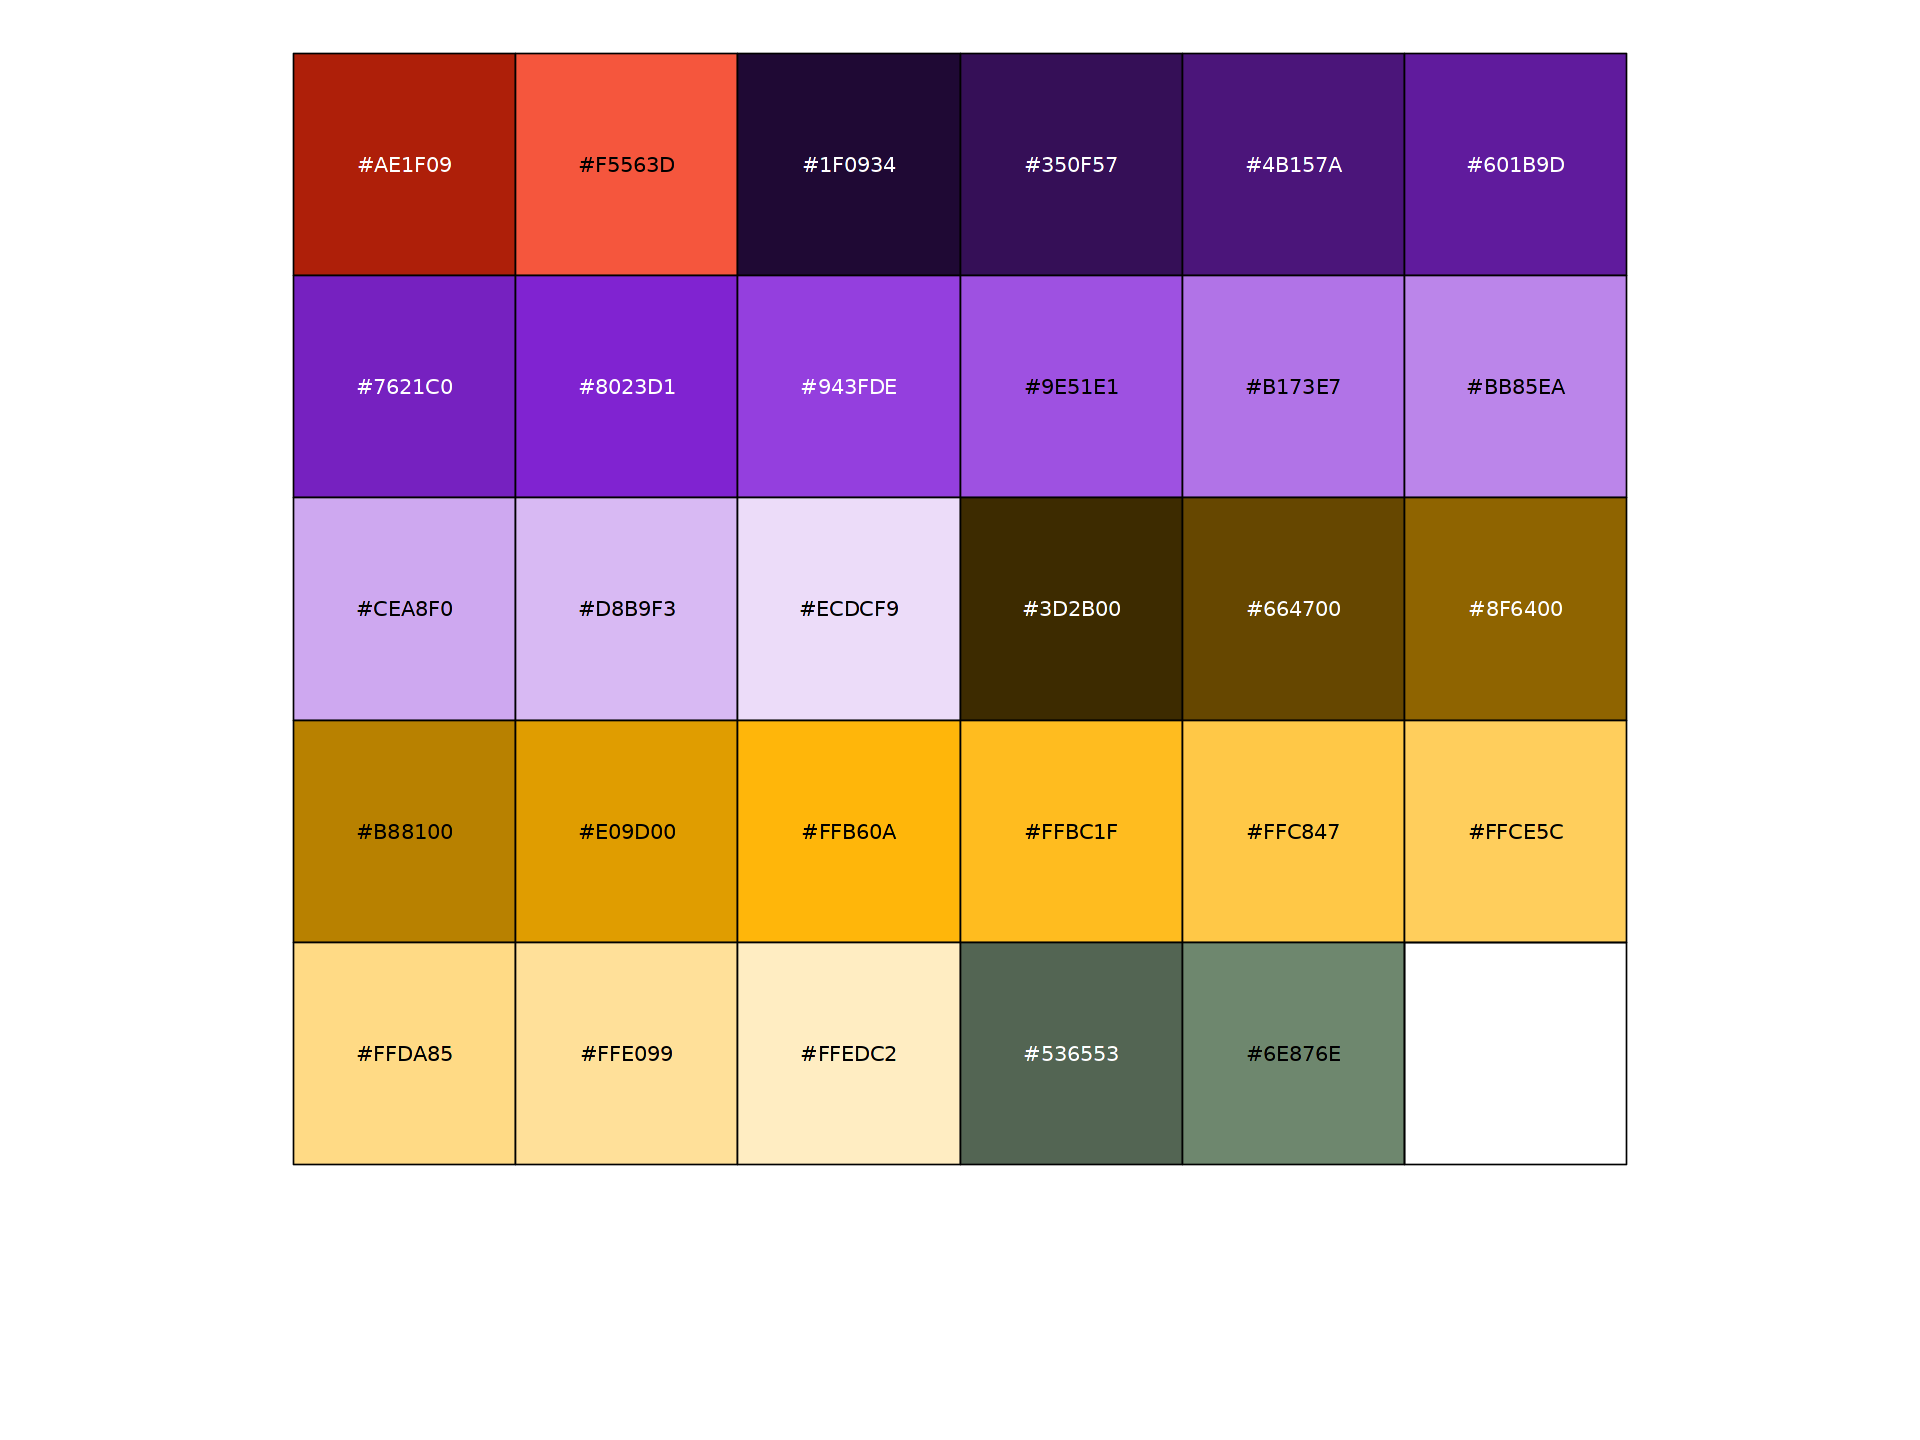

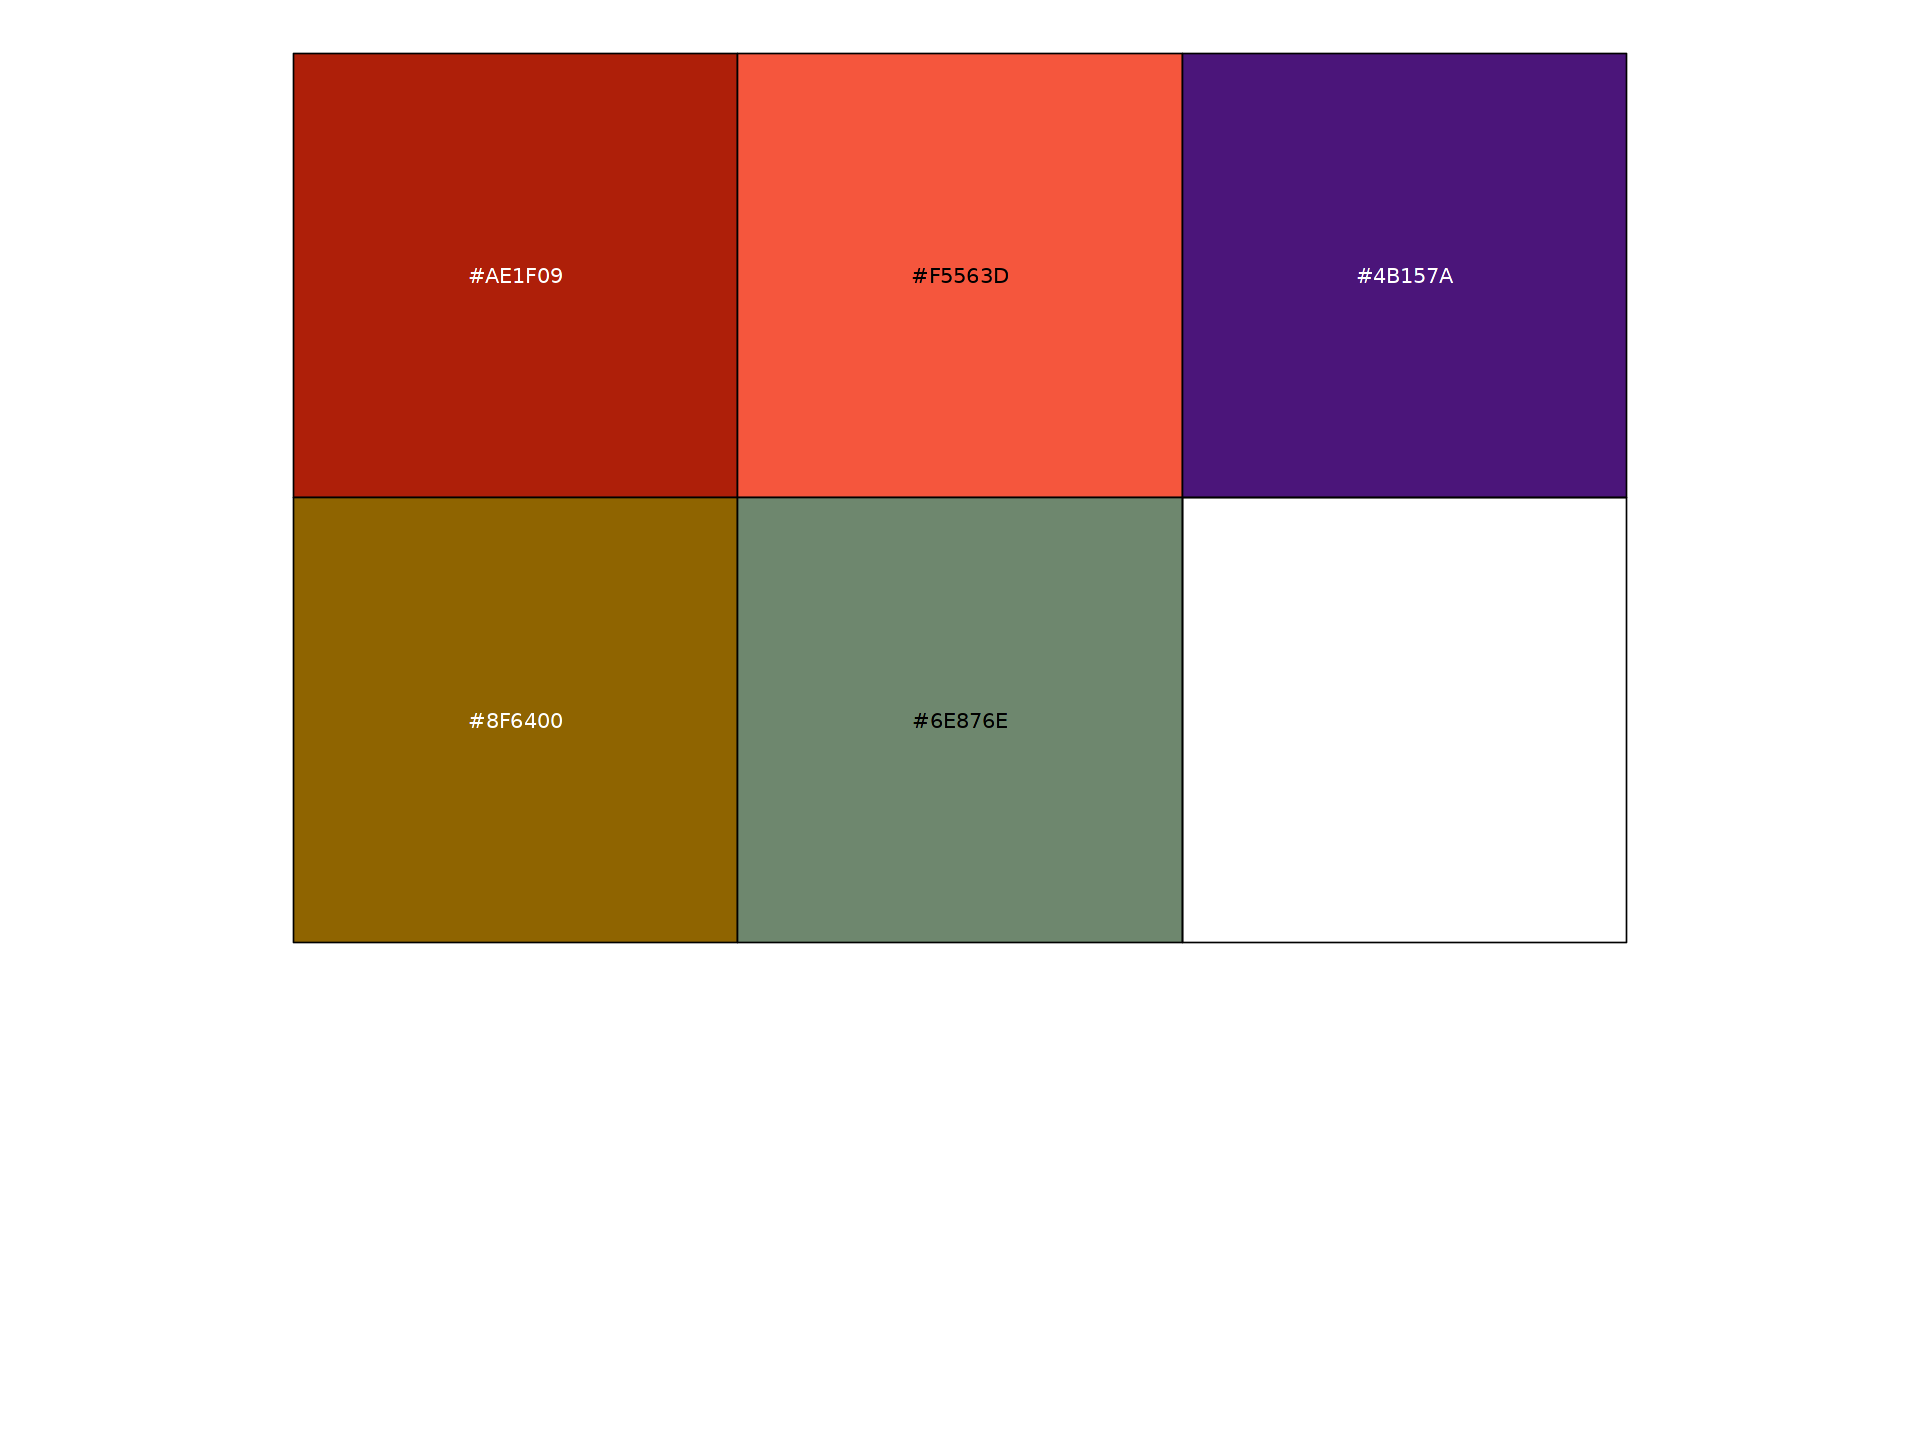

In [9]:
orig.ident_colors <- c("#374337", "#536553", "#6E876E", "#8FA38F", "#D2DAD2", "#E9EDE9", "#B88100", "#FFC233", "#FFD470", "#AE1F09", "#E92A0C", "#F5563D", "#F88877", "#714947", "#97615E", "#B08482", "#C8A9A7", "#E0CECD")
names(orig.ident_colors) <- c("EarlyCtrl2", "EarlyCtrl3", "PeakCtrl2", "PeakCtrl3", "LateCtrl2", "LateCtrl3", "Early1", "EarlyMale3", "EarlyFemale3", "Peak2", "Peak3", "PeakMale4", "PeakFemale4", "Late1", "Late2","Late3", "LateMale4", "LateFemale4")
show_col(orig.ident_colors)
orig.ident_colors_contrast <- c("#97615E", "#E92A0C", "#F5AB00", "#6E876E", "#26C485", "#C16200", "#97615E", "#F5AB00", "#6E876E", "#97615E", "#E92A0C", "#F5AB00", "#6E876E", "#97615E", "#E92A0C", "#F5AB00", "#6E876E", "#2A75CB")
names(orig.ident_colors_contrast) <- c("EarlyCtrl2", "EarlyCtrl3", "PeakCtrl2", "PeakCtrl3", "LateCtrl2", "LateCtrl3", "Early1", "EarlyMale3", "EarlyFemale3", "Peak2", "Peak3", "PeakMale4", "PeakFemale4", "Late1", "Late2","Late3", "LateMale4", "LateFemale4")
show_col(orig.ident_colors_contrast)

orig.ident_merge_colors <- c("#6E876E", "#F5AB00", "#E92A0C", "#97615E")
names(orig.ident_merge_colors) <- c("Ctrl", "Early", "Peak", "Late")
show_col(orig.ident_merge_colors)

batch_colors <- c("#2A75CB", "#6E876E", "#F5AB00", "#E92A0C", "#97615E", "#98CE00")
names(batch_colors) <- c("B1", "B2", "B3", "B4", "B5", "B6")
show_col(batch_colors)

model_colors <- c("#6E876E", "#E92A0C")
names(model_colors) <- c("Ctrl", "EAE")
show_col(model_colors)

duo_colors <- c("#2A75CB", "#E92A0C")
show_col(duo_colors)

sex_colors <- duo_colors
names(sex_colors) <- c("M", "F")

immune_colors <- c("#A9DFBF", "#FF000080")
names(immune_colors) <- c("NonImmune", "Immune")
#show_col(immune_colors)

doublets_colors <- c("#A9DFBF", "#FF000080")
names(doublets_colors) <- c("Singlet", "Doublet")
#show_col(doublets_colors)

cellType_OL_colors <- c("#AE1F09","#F5563D", "#1F0934", "#350F57", "#4B157A", "#601B9D", "#7621C0", "#8023D1", "#943FDE", "#9E51E1", "#B173E7", "#BB85EA", "#CEA8F0", "#D8B9F3", "#ECDCF9","#3D2B00", "#664700", "#8F6400", "#B88100", "#E09D00", "#FFB60A", "#FFBC1F", "#FFC847", "#FFCE5C", "#FFDA85", "#FFE099", "#FFEDC2"
,"#536553", "#6E876E")
names(cellType_OL_colors) <- c("OPC", "COP", "MOL56-α","MOL56-β","MOL56-γ","MOL56-δ","MOL56-ε","MOL56-ζ","MOL56-η","MOL56-θ","MOL56-ι","MOL56-κ","MOL56-λ","MOL56-μ","MOL56-ν","MOL2-α","MOL2-β","MOL2-γ","MOL2-δ","MOL2-ε","MOL2-ζ","MOL2-η","MOL2-θ","MOL2-ι","MOL2-κ","MOL2-λ","MOL2-μ",
 "MOL1-α", "MOL1-β")
show_col(cellType_OL_colors)

cellType_OL_merge_colors <- c("#AE1F09","#F5563D","#4B157A","#8F6400", "#6E876E")
names(cellType_OL_merge_colors) <- c("OPC", "COP", "MOL56", "MOL2", "MOL1")
show_col(cellType_OL_merge_colors)

In [10]:
%put OS_path_datasets OS_path_outputs OS_path_inputs

In [11]:
#Set up ATAC annotation
annotations <- GetGRangesFromEnsDb(ensdb = EnsDb.Mmusculus.v79, verbose =FALSE)
ucsc.levels <- str_replace(string=paste("chr",seqlevels(annotations),sep=""), pattern="chrMT", replacement="chrM")
seqlevels(annotations) <- ucsc.levels
genome(annotations) <- "mm10"

Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warning message in .merge_two_Seqinfo_objects(x, y):
"The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)"
Warn

## 2. Loading datasets

In [12]:
MORNAATACCOL <- readRDS(paste0(OS_path_outputs, "MORNAATACCOL.rds"))

## 3. OL dynamics

### 3.1 Temporal time course (DORCs)

#### 3.1.1 MOL56

##### 3.1.1.1 Heatmaps

In [521]:
cluster_choice = "MOL56"

In [522]:
tmp <- subset(MORNAATACCOL, subset = cellType_OL_merge == cluster_choice)

Warning message:
"Keys should be one or more alphanumeric characters followed by an underscore, setting key from umap_peaks_ol_ to umappeaksol_"
Warning message:
"Keys should be one or more alphanumeric characters followed by an underscore, setting key from umap_bimod_ol_ to umapbimodol_"
Warning message:
"Keys should be one or more alphanumeric characters followed by an underscore, setting key from pca_generegchrom_ol_ to pcageneregchromol_"
Warning message:
"Keys should be one or more alphanumeric characters followed by an underscore, setting key from umap_generegchrom_ol_ to umapgeneregchromol_"
Warning message:
"Keys should be one or more alphanumeric characters followed by an underscore, setting key from pca_dorcs_ol_ to pcadorcsol_"
Warning message:
"Keys should be one or more alphanumeric characters followed by an underscore, setting key from umap_dorcs_ol_ to umapdorcsol_"


In [523]:
table_sample_low <- table(MORNAATACCOL$cellType_OL_merge, MORNAATACCOL$orig.ident)[cluster_choice,][table(MORNAATACCOL$cellType_OL_merge, MORNAATACCOL$orig.ident)[cluster_choice,] <= 5]
table_sample_low

sample_keep <- names(orig.ident_colors)[!names(orig.ident_colors) %in% names(table_sample_low)]

named integer(0)

In [524]:
#Remove sample with low number of cells
keepcells <- rownames(tmp@meta.data[!tmp$orig.ident %in% (names(table_sample_low)),])
tmp <- subset(tmp, cells=keepcells)

In [525]:
table_group_low <-table(MORNAATACCOL$cellType_OL_merge, MORNAATACCOL$orig.ident_merge)[cluster_choice,][table(MORNAATACCOL$cellType_OL_merge, MORNAATACCOL$orig.ident_merge)[cluster_choice,] <= 30]
table_group_low

group_keep <- names(orig.ident_merge_colors)[!names(orig.ident_merge_colors) %in% names(table_group_low)]

named integer(0)

In [526]:
#Remove timepoint with low number of cells
keepcells <- rownames(tmp@meta.data[!tmp$orig.ident_merge %in% (names(table_group_low)),])
tmp <- subset(tmp, cells=keepcells)

In [527]:
tmp$orig.ident <- factor(x = tmp$orig.ident, levels = names(orig.ident_colors)[!names(orig.ident_colors) %in% names(table_sample_low)])
tmp$orig.ident_merge <- factor(x = tmp$orig.ident_merge, levels = names(orig.ident_merge_colors)[!names(orig.ident_merge_colors) %in% names(table_group_low)])

In [528]:
DefaultAssay(tmp) <- "GenePromAcc"

In [529]:
tmp <- NormalizeData(tmp, normalization.method = "LogNormalize", scale.factor = 10000, margin = 1, verbose = TRUE)

In [530]:
DefaultAssay(tmp) <- "RNA"

In [531]:
tmp <- NormalizeData(tmp, normalization.method = "LogNormalize", scale.factor = 10000, margin = 1, verbose = TRUE)

In [532]:
dynamics_genes <- c("Pdlim4","Tmem28","Slc35f5","Gbp3","Gbp4","H2-M3","Gbp5","Gbp7","Ly6e","Gbp2","Amotl1","Iigp1","Arhgdib","Tnxb","Fam13a","Arhgap24","Ccny","Sgtb","Ifi47","9930111J21Rik2","Irgm1","Tgtp2","Serpina3n","Plcl2","Serpina3f","Trim5","Ddx60","Trim34a","Trim12a","Dmrta1","Serpina3i","Serpina3c","Fzd10","Kcna4","Fgl2","Igfbpl1","Arhgap28","Panx1","Vav3","Tram2","Irf4","Pfkfb4","Tnfrsf1b","Sox11","Nebl","Lamb1","Piezo2","Hoxb5","Hoxb7","Hoxb2","Hoxb3","Hoxb4","Hoxb6","Hpgd")

In [533]:
gene_list <- dynamics_genes

In [534]:
Idents(object = tmp) <- "orig.ident"

In [535]:
sample_names <- levels(tmp$orig.ident)

In [536]:
tmp_sample_markers_DORCs <- data.frame(matrix(0L, ncol=length(sample_names), nrow=length(gene_list), dimnames=list(gene_list, paste0("avg_DORCs_", sample_names))))

In [29]:
for (i in 1:length(colnames(tmp_sample_markers_DORCs))){
    tmp_sample_markers_DORCs[,i] <- as.vector(AverageExpression(subset(x = tmp, subset = orig.ident == sample_names[i]), assays = "DORCs", features = gene_list, slot = "counts")[['DORCs']])
}

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing acro

In [30]:
tmp_sample_markers_RNA <- data.frame(matrix(0L, ncol=length(sample_names), nrow=length(gene_list), dimnames=list(gene_list, paste0("avg_log2Exp_", sample_names))))

In [31]:
gene_list_RNA <- gene_list[gene_list %in% rownames(tmp[['RNA']])]

In [32]:
genes0 <- names(rowSums(tmp[['RNA']]@counts[gene_list_RNA,])[rowSums(tmp[['RNA']]@counts[gene_list_RNA,]) == 0])

In [33]:
gene_list_RNA <- gene_list_RNA[!gene_list_RNA %in% genes0]

In [34]:
tmp_sample_markers_RNA_sub <- data.frame(matrix(0L, ncol=length(sample_names), nrow=length(gene_list_RNA), dimnames=list(gene_list_RNA, paste0("avg_log2Exp_", sample_names))))

In [35]:
for (i in 1:length(colnames(tmp_sample_markers_RNA_sub))){
    tmp_sample_markers_RNA_sub[,i] <- log2(as.vector(AverageExpression(subset(x = tmp, subset = orig.ident == sample_names[i]), assays = "RNA", features = gene_list_RNA, slot = "data")[['RNA']])+1)
}

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing acro

In [36]:
tmp_sample_markers_GenePromAcc <- data.frame(matrix(0L, ncol=length(sample_names), nrow=length(gene_list), dimnames=list(gene_list, paste0("avg_log2Acc_", sample_names))))

In [37]:
gene_list_GenePromAcc <- gene_list[gene_list %in% rownames(tmp[['GenePromAcc']])]

In [38]:
genes0 <- names(rowSums(tmp[['GenePromAcc']]@counts[gene_list_GenePromAcc,])[rowSums(tmp[['GenePromAcc']]@counts[gene_list_GenePromAcc,]) == 0])

In [39]:
gene_list_GenePromAcc <- gene_list_GenePromAcc[!gene_list_GenePromAcc %in% genes0]

In [40]:
tmp_sample_markers_GenePromAcc_sub <- data.frame(matrix(0L, ncol=length(sample_names), nrow=length(gene_list_GenePromAcc), dimnames=list(gene_list_GenePromAcc, paste0("avg_log2Acc_", sample_names))))

In [41]:
for (i in 1:length(colnames(tmp_sample_markers_GenePromAcc_sub))){
    tmp_sample_markers_GenePromAcc_sub[,i] <- log2(as.vector(AverageExpression(subset(x = tmp, subset = orig.ident == sample_names[i]), assays = "GenePromAcc", features = gene_list_GenePromAcc, slot = "data")[['GenePromAcc']])+1)
}

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing acro

In [42]:
matrix <- tmp_sample_markers_DORCs/do.call(pmax, tmp_sample_markers_DORCs)

In [43]:
paletteLength <- 50
myColor <- colorRampPalette(c("#C7D2CA", "#024F2A"))(paletteLength/2)
myBreaks <- c(seq(0, max(matrix), length.out=floor(paletteLength/2)))

In [44]:
plot_height <- ifelse(as.integer(nrow(matrix)/20)<=5, 5, as.integer(nrow(matrix)/20))

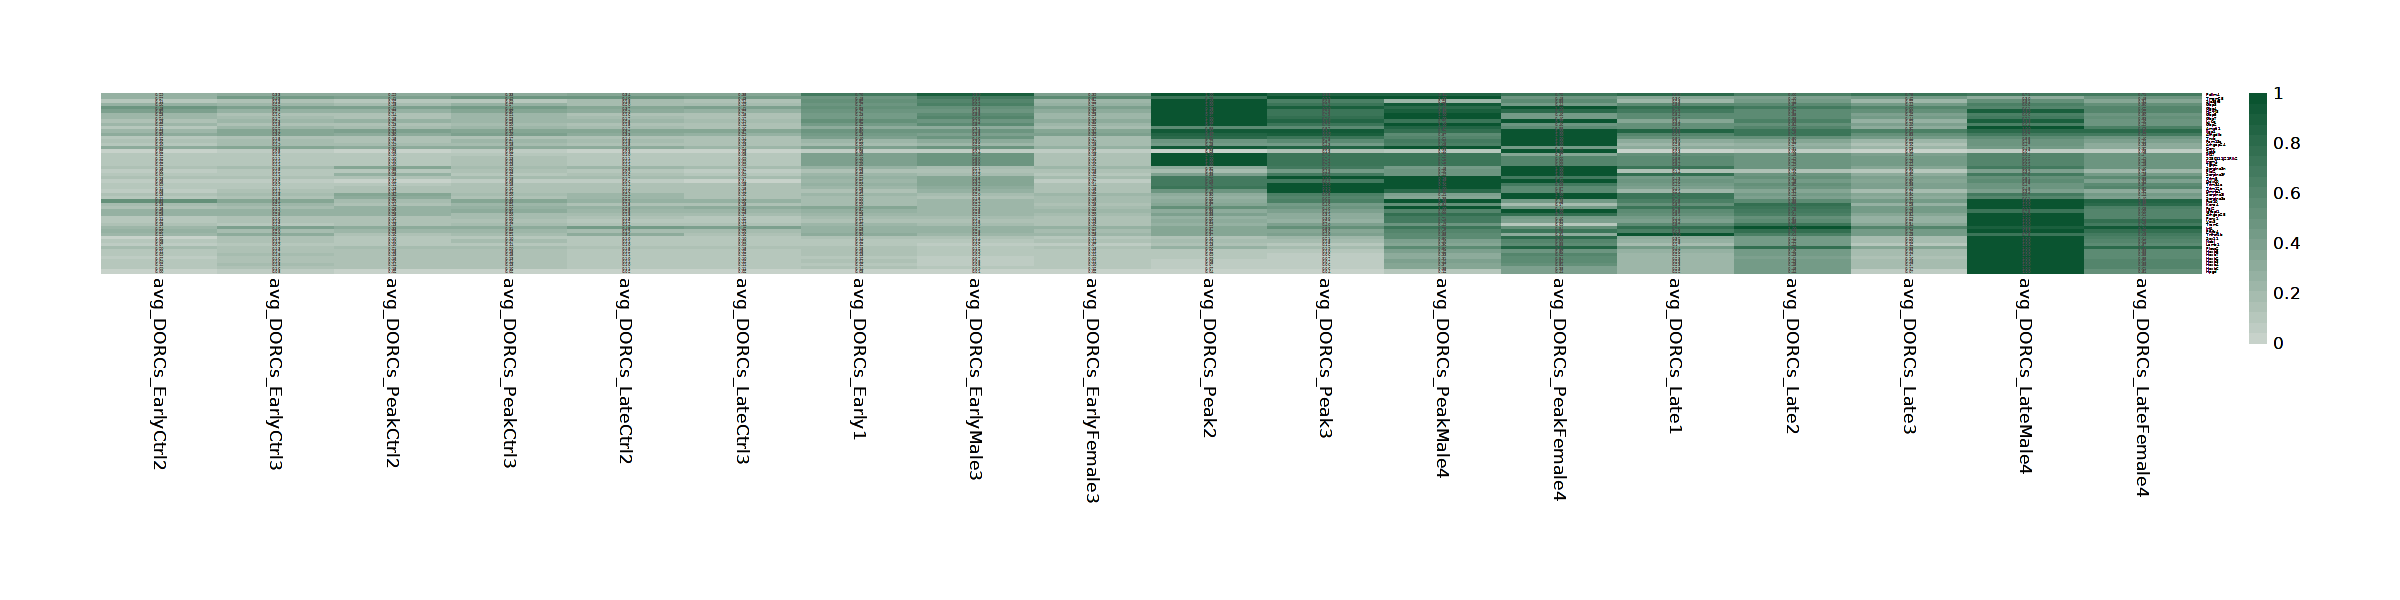

In [45]:
options(repr.plot.width=20, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [46]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_Enhancers_",cluster_choice,"_sep.pdf"), width=20, height=plot_height)

png 
  2

In [47]:
tmp_sample_markers_DORCs_mean <- data.frame(matrix(0L, ncol=1, nrow=length(gene_list), dimnames=list(gene_list, "Mean_DORCs")))

In [48]:
tmp_sample_markers_DORCs_mean[rownames(tmp_sample_markers_DORCs),"Mean_DORCs"] <- rowMeans(tmp_sample_markers_DORCs)

In [49]:
matrix <- tmp_sample_markers_DORCs_mean

In [50]:
paletteLength <- 50
myColor <- colorRampPalette(c("white", "black"))(paletteLength/2)
myBreaks <- c(seq(0, max(matrix), length.out=floor(paletteLength/2)))

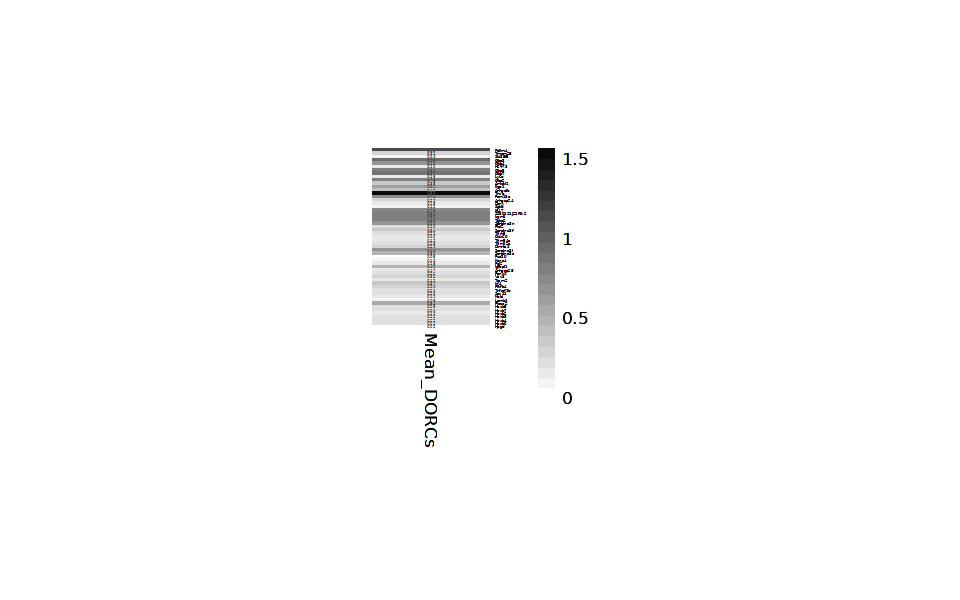

In [51]:
options(repr.plot.width=8, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, 
cluster_rows=FALSE)
ph

In [52]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_Enhancers_",cluster_choice,"_sep_mean.pdf"), width=7, height=plot_height)

png 
  2

In [53]:
tmp_sample_markers_zscore <- t(apply(tmp_sample_markers_DORCs[gene_list,], 1, scale))
colnames(tmp_sample_markers_zscore) <- paste0("zscore_", sample_names)
matrix <- tmp_sample_markers_zscore

In [54]:
paletteLength <- 100
myColor <- colorRampPalette(c("blue", "white", "red"))(paletteLength/2)
myBreaks <- c(seq(-max(abs(matrix)), max(abs(matrix)), length.out=floor(paletteLength/2)))
myColor[(paletteLength/4):((paletteLength/4)+1)] <- c("#FFFFFF", "#FFFFFF")

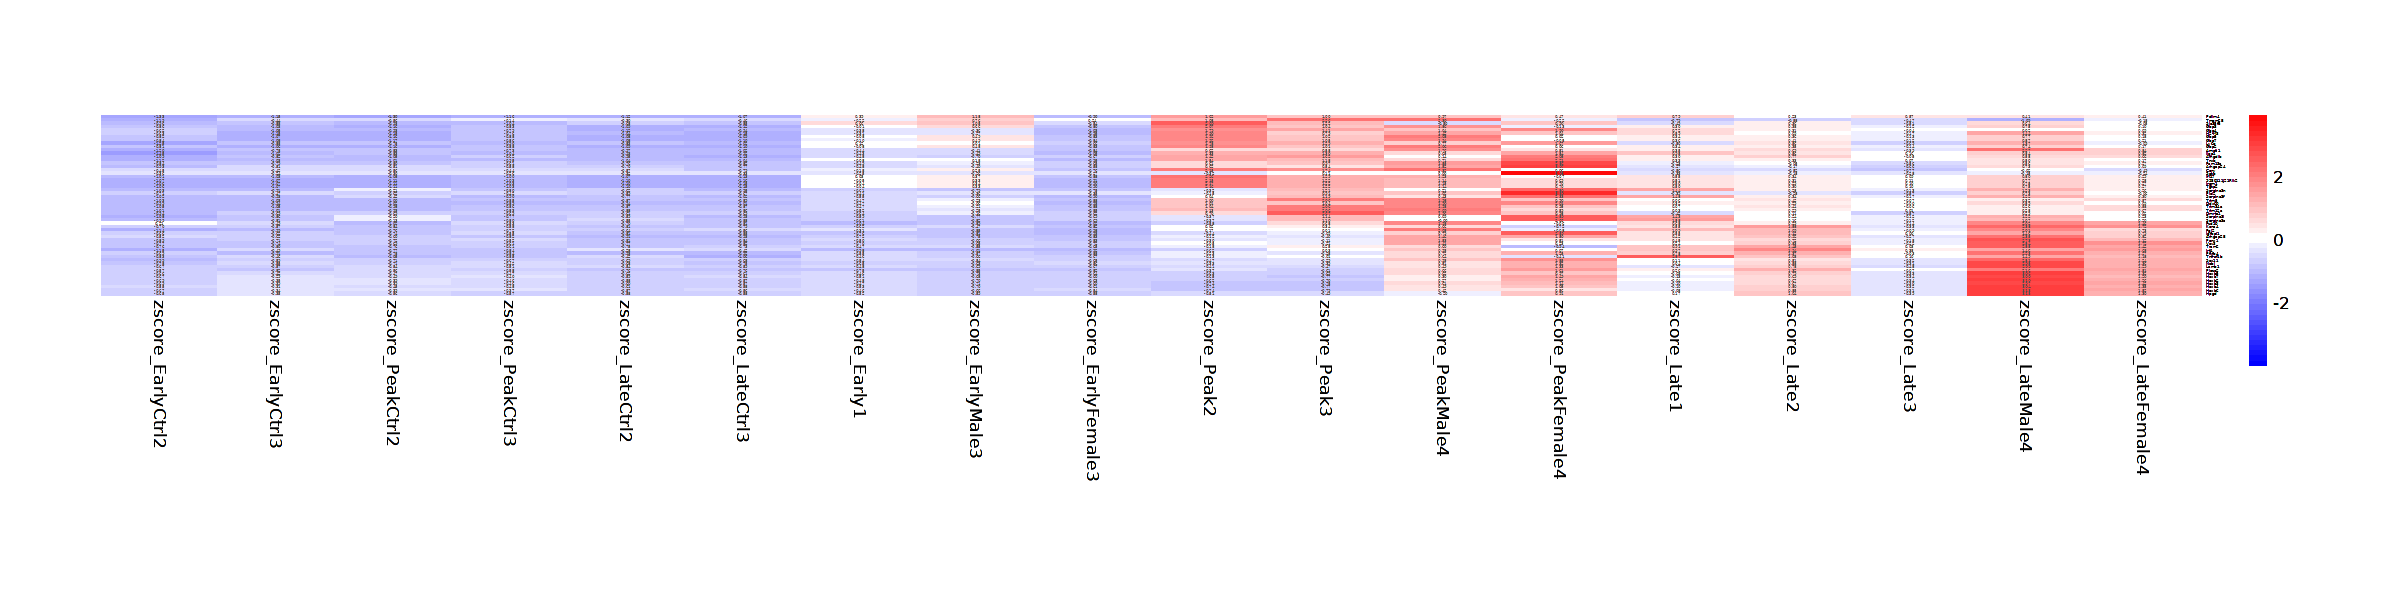

In [55]:
options(repr.plot.width=20, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [56]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_Enhancers_",cluster_choice,"_sep_zscore.pdf"), width=20, height=plot_height)

png 
  2

In [57]:
matrix <- tmp_sample_markers_RNA
matrix_sub <- tmp_sample_markers_RNA_sub

In [58]:
matrix_sub <- matrix_sub/do.call(pmax, matrix_sub)

In [59]:
is.nan.data.frame <- function(x)
do.call(cbind, lapply(x, is.nan))

matrix_sub[is.nan.data.frame(matrix_sub)] <- 0

In [60]:
matrix[rownames(matrix_sub),] <- matrix_sub
matrix <- matrix[gene_list,]

In [61]:
paletteLength <- 50
myColor <- colorRampPalette(c("#FFFFB3", "#5E3719"))(paletteLength/2)
myBreaks <- c(seq(0, max(matrix), length.out=floor(paletteLength/2)))

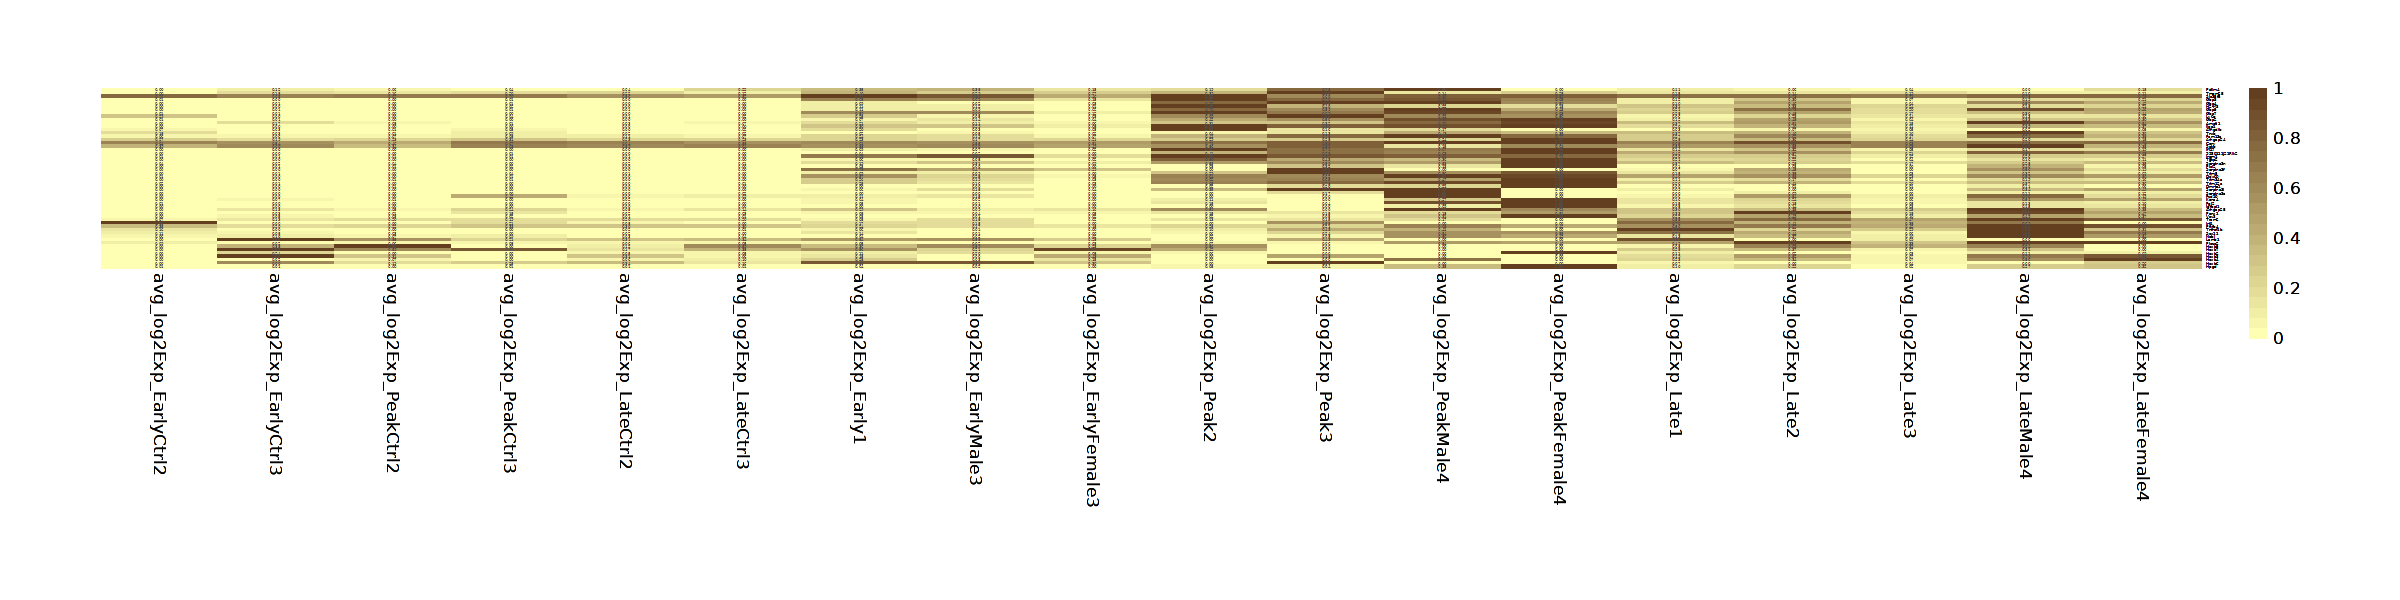

In [62]:
options(repr.plot.width=20, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [63]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_RNA_",cluster_choice,"_sep.pdf"), width=20, height=plot_height)

png 
  2

In [64]:
tmp_sample_markers_RNA_mean <- data.frame(matrix(0L, ncol=1, nrow=length(gene_list), dimnames=list(gene_list, "Mean_Exp")))

In [65]:
tmp_sample_markers_RNA_mean[rownames(tmp_sample_markers_RNA_sub),"Mean_Exp"] <- rowMeans(tmp_sample_markers_RNA_sub)

In [66]:
matrix <- tmp_sample_markers_RNA_mean

In [67]:
is.nan.data.frame <- function(x)
do.call(cbind, lapply(x, is.na))

matrix[is.na.data.frame(matrix)] <- 0

In [68]:
paletteLength <- 50
myColor <- colorRampPalette(c("white", "black"))(paletteLength/2)
myBreaks <- c(seq(0, max(matrix), length.out=floor(paletteLength/2)))

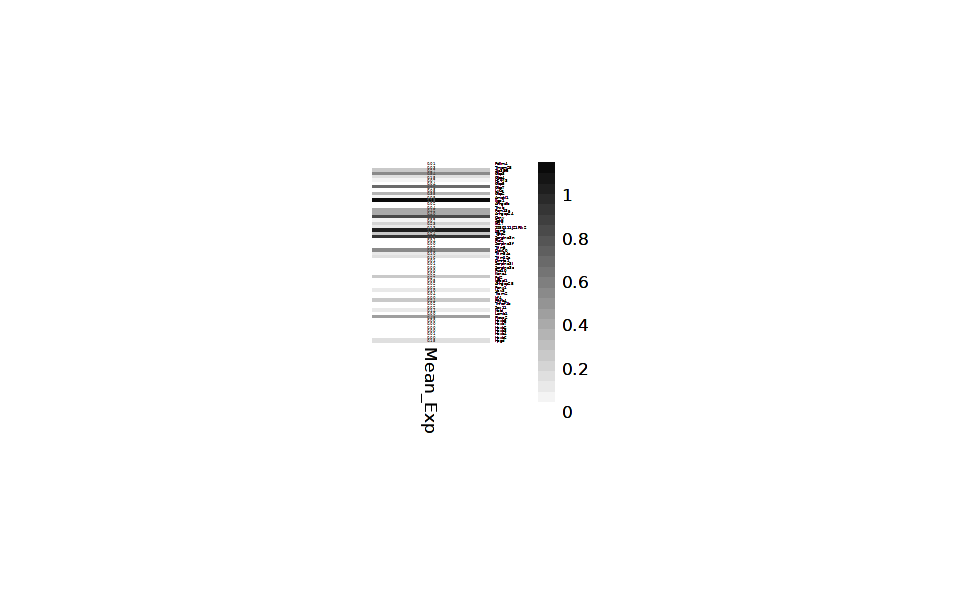

In [69]:
options(repr.plot.width=8, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [70]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_RNA_",cluster_choice,"_sep_mean.pdf"), width=7, height=plot_height)

png 
  2

In [71]:
tmp_sample_markers_RNA[rownames(tmp_sample_markers_RNA_sub),] <- tmp_sample_markers_RNA_sub

In [72]:
tmp_sample_markers_RNA_zscore <- t(apply(tmp_sample_markers_RNA[gene_list,], 1, scale))
colnames(tmp_sample_markers_RNA_zscore) <- paste0("zscore_", sample_names)
matrix <- tmp_sample_markers_RNA_zscore

In [73]:
is.nan.data.frame <- function(x)
do.call(cbind, lapply(x, is.na))

matrix[is.na.data.frame(matrix)] <- 0

In [74]:
paletteLength <- 100
myColor <- colorRampPalette(c("blue", "white", "red"))(paletteLength/2)
myBreaks <- c(seq(-max(abs(matrix)), max(abs(matrix)), length.out=floor(paletteLength/2)))
myColor[(paletteLength/4):((paletteLength/4)+1)] <- c("#FFFFFF", "#FFFFFF")

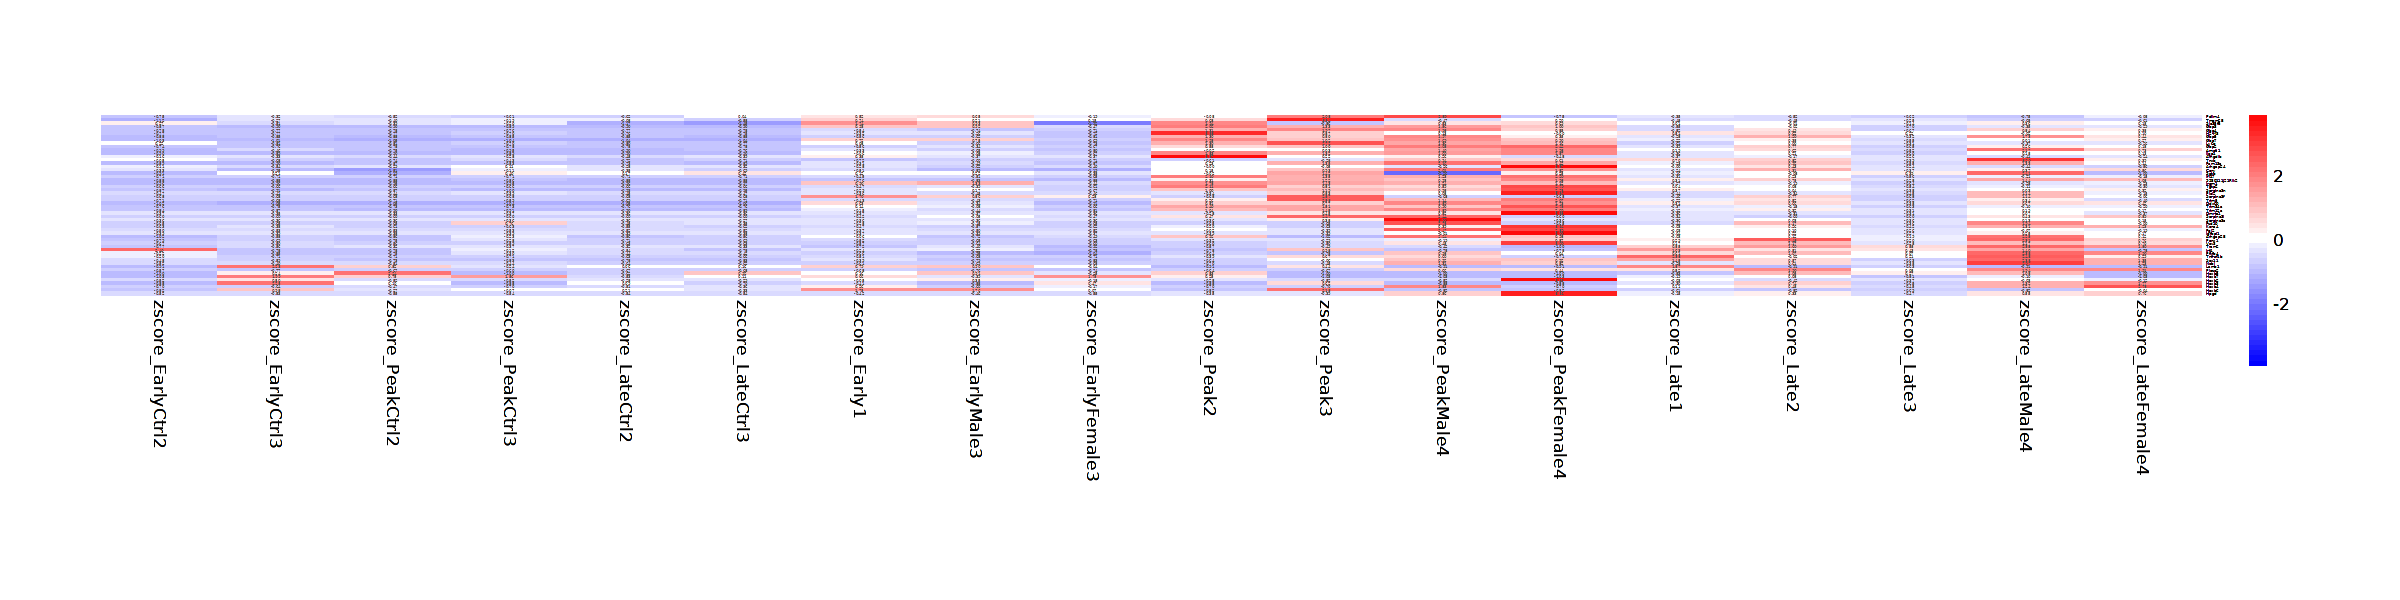

In [75]:
options(repr.plot.width=20, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [76]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_RNA_",cluster_choice,"_sep_zscore.pdf"), width=20, height=plot_height)

png 
  2

In [77]:
matrix <- tmp_sample_markers_GenePromAcc
matrix_sub <- tmp_sample_markers_GenePromAcc_sub

In [78]:
matrix_sub <- matrix_sub/do.call(pmax, matrix_sub)

In [79]:
is.nan.data.frame <- function(x)
do.call(cbind, lapply(x, is.nan))

matrix_sub[is.nan.data.frame(matrix_sub)] <- 0

In [80]:
matrix[rownames(matrix_sub),] <- matrix_sub
matrix <- matrix[gene_list,]

In [81]:
paletteLength <- 50
myColor <- colorRampPalette(c("#FFBCB5", "#432371"))(paletteLength/2)
myBreaks <- c(seq(0, max(matrix), length.out=floor(paletteLength/2)))

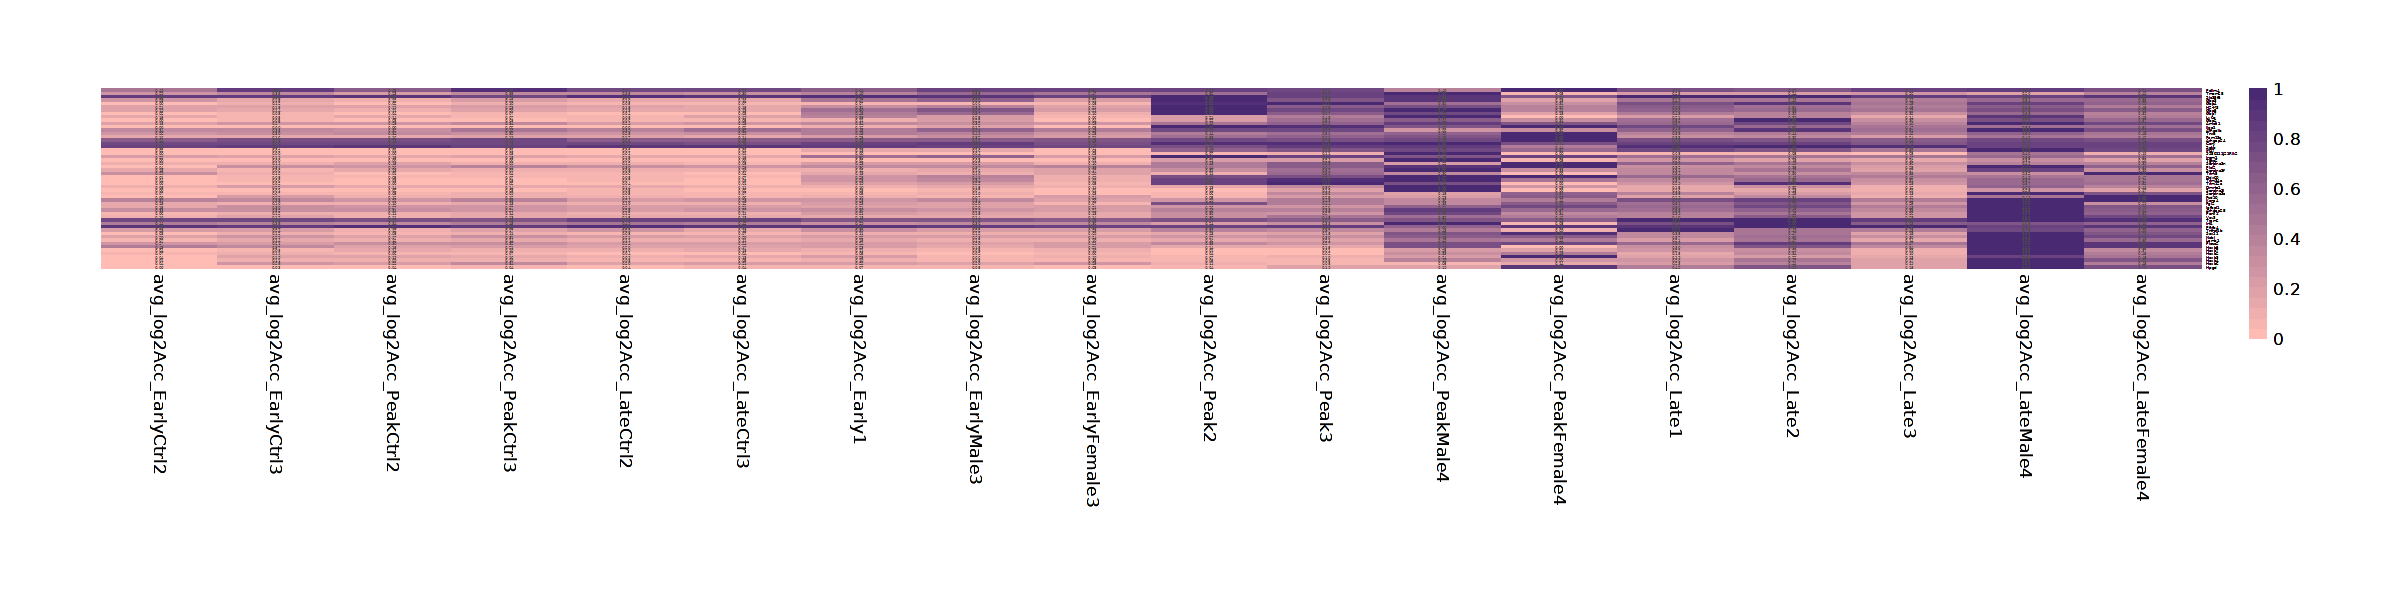

In [82]:
options(repr.plot.width=20, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [83]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_Acc_",cluster_choice,"_sep.pdf"), width=20, height=plot_height)

png 
  2

In [84]:
tmp_sample_markers_GenePromAcc_mean <- data.frame(matrix(0L, ncol=1, nrow=length(gene_list), dimnames=list(gene_list, "Mean_Acc")))

In [85]:
tmp_sample_markers_GenePromAcc_mean[rownames(tmp_sample_markers_GenePromAcc_sub),"Mean_Acc"] <- rowMeans(tmp_sample_markers_GenePromAcc_sub)

In [86]:
matrix <- tmp_sample_markers_GenePromAcc_mean

In [87]:
is.nan.data.frame <- function(x)
do.call(cbind, lapply(x, is.na))

matrix[is.na.data.frame(matrix)] <- 0

In [88]:
paletteLength <- 50
myColor <- colorRampPalette(c("white", "black"))(paletteLength/2)
myBreaks <- c(seq(0, max(matrix), length.out=floor(paletteLength/2)))

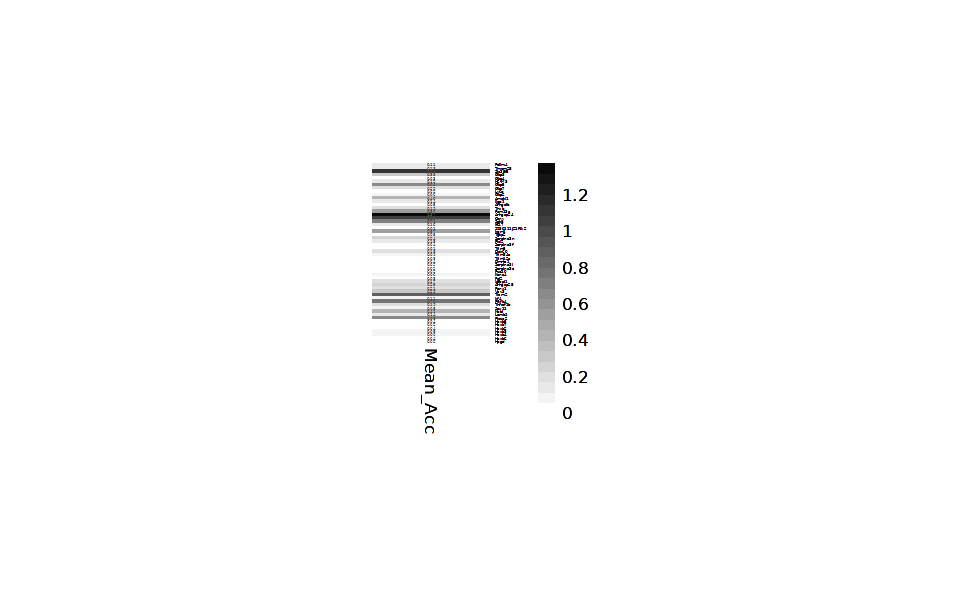

In [89]:
options(repr.plot.width=8, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [90]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_Acc",cluster_choice,"_sep_mean.pdf"), width=7, height=plot_height)

png 
  2

In [91]:
tmp_sample_markers_GenePromAcc[rownames(tmp_sample_markers_GenePromAcc_sub),] <- tmp_sample_markers_GenePromAcc_sub

In [92]:
tmp_sample_markers_GenePromAcc_zscore <- t(apply(tmp_sample_markers_GenePromAcc[gene_list,], 1, scale))
colnames(tmp_sample_markers_GenePromAcc_zscore) <- paste0("zscore_", sample_names)
matrix <- tmp_sample_markers_GenePromAcc_zscore

In [93]:
is.nan.data.frame <- function(x)
do.call(cbind, lapply(x, is.na))

matrix[is.na.data.frame(matrix)] <- 0

In [94]:
paletteLength <- 100
myColor <- colorRampPalette(c("blue", "white", "red"))(paletteLength/2)
myBreaks <- c(seq(-max(abs(matrix)), max(abs(matrix)), length.out=floor(paletteLength/2)))
myColor[(paletteLength/4):((paletteLength/4)+1)] <- c("#FFFFFF", "#FFFFFF")

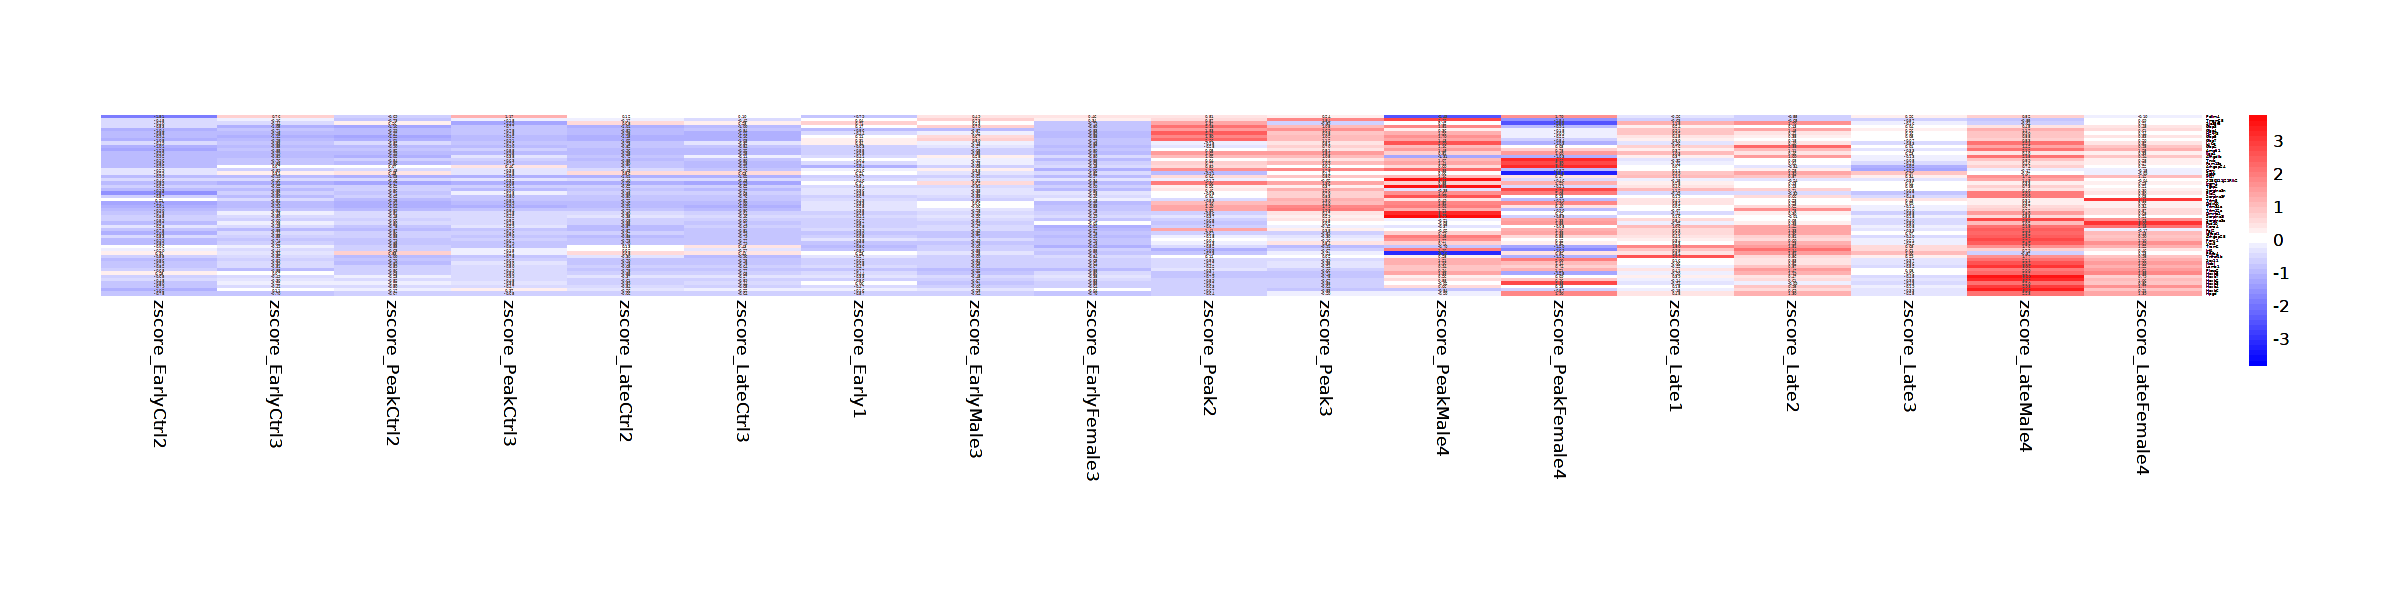

In [95]:
options(repr.plot.width=20, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [96]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_Acc_",cluster_choice,"_sep_zscore.pdf"), width=20, height=plot_height)

png 
  2

In [537]:
Idents(object = tmp) <- "orig.ident_merge"

In [538]:
sample_names <- levels(tmp$orig.ident_merge)

In [539]:
tmp_sample_markers_DORCs <- data.frame(matrix(0L, ncol=length(sample_names), nrow=length(gene_list), dimnames=list(gene_list, paste0("avg_DORCs_", sample_names))))

In [540]:
for (i in 1:length(colnames(tmp_sample_markers_DORCs))){
    tmp_sample_markers_DORCs[,i] <- as.vector(AverageExpression(subset(x = tmp, subset = orig.ident_merge == sample_names[i]), assays = "DORCs", features = gene_list, slot = "counts")[['DORCs']])
}

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.



In [541]:
tmp_sample_markers_RNA <- data.frame(matrix(0L, ncol=length(sample_names), nrow=length(gene_list), dimnames=list(gene_list, paste0("avg_log2Exp_", sample_names))))

In [542]:
gene_list_RNA <- gene_list[gene_list %in% rownames(tmp[['RNA']])]

In [543]:
genes0 <- names(rowSums(tmp[['RNA']]@counts[gene_list_RNA,])[rowSums(tmp[['RNA']]@counts[gene_list_RNA,]) == 0])

In [544]:
gene_list_RNA <- gene_list_RNA[!gene_list_RNA %in% genes0]

In [545]:
tmp_sample_markers_RNA_sub <- data.frame(matrix(0L, ncol=length(sample_names), nrow=length(gene_list_RNA), dimnames=list(gene_list_RNA, paste0("avg_log2Exp_", sample_names))))

In [546]:
for (i in 1:length(colnames(tmp_sample_markers_RNA_sub))){
    tmp_sample_markers_RNA_sub[,i] <- log2(as.vector(AverageExpression(subset(x = tmp, subset = orig.ident_merge == sample_names[i]), assays = "RNA", features = gene_list_RNA, slot = "data")[['RNA']])+1)
}

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.



In [547]:
tmp_sample_markers_GenePromAcc <- data.frame(matrix(0L, ncol=length(sample_names), nrow=length(gene_list), dimnames=list(gene_list, paste0("avg_log2Acc_", sample_names))))

In [548]:
gene_list_GenePromAcc <- gene_list[gene_list %in% rownames(tmp[['GenePromAcc']])]

In [549]:
genes0 <- names(rowSums(tmp[['GenePromAcc']]@counts[gene_list_GenePromAcc,])[rowSums(tmp[['GenePromAcc']]@counts[gene_list_GenePromAcc,]) == 0])

In [550]:
gene_list_GenePromAcc <- gene_list_GenePromAcc[!gene_list_GenePromAcc %in% genes0]

In [551]:
tmp_sample_markers_GenePromAcc_sub <- data.frame(matrix(0L, ncol=length(sample_names), nrow=length(gene_list_GenePromAcc), dimnames=list(gene_list_GenePromAcc, paste0("avg_log2Acc_", sample_names))))

In [552]:
for (i in 1:length(colnames(tmp_sample_markers_GenePromAcc_sub))){
    tmp_sample_markers_GenePromAcc_sub[,i] <- log2(as.vector(AverageExpression(subset(x = tmp, subset = orig.ident_merge == sample_names[i]), assays = "GenePromAcc", features = gene_list_GenePromAcc, slot = "data")[['GenePromAcc']])+1)
}

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.



In [553]:
saveRDS(tmp_sample_markers_DORCs, paste0(OS_path_outputs, "Dynamics_DORCs_Enhancers_",cluster_choice,".rds"))
saveRDS(tmp_sample_markers_RNA_sub, paste0(OS_path_outputs, "Dynamics_DORCs_RNA_",cluster_choice,".rds"))
saveRDS(tmp_sample_markers_GenePromAcc_sub, paste0(OS_path_outputs, "Dynamics_DORCs_Acc_",cluster_choice,".rds"))

In [554]:
write.csv(tmp_sample_markers_DORCs, paste0(OS_path_outputs, "Dynamics_DORCs_Enhancers_",cluster_choice,".csv"))
write.csv(tmp_sample_markers_RNA_sub, paste0(OS_path_outputs, "Dynamics_DORCs_RNA_",cluster_choice,".csv"))
write.csv(tmp_sample_markers_GenePromAcc_sub, paste0(OS_path_outputs, "Dynamics_DORCs_Acc_",cluster_choice,".csv"))

In [114]:
matrix <- tmp_sample_markers_DORCs/do.call(pmax, tmp_sample_markers_DORCs)

In [115]:
paletteLength <- 50
myColor <- colorRampPalette(c("#C7D2CA", "#024F2A"))(paletteLength/2)
myBreaks <- c(seq(0, max(matrix), length.out=floor(paletteLength/2)))

In [116]:
plot_height <- ifelse(as.integer(nrow(matrix)/20)<=5, 5, as.integer(nrow(matrix)/20))

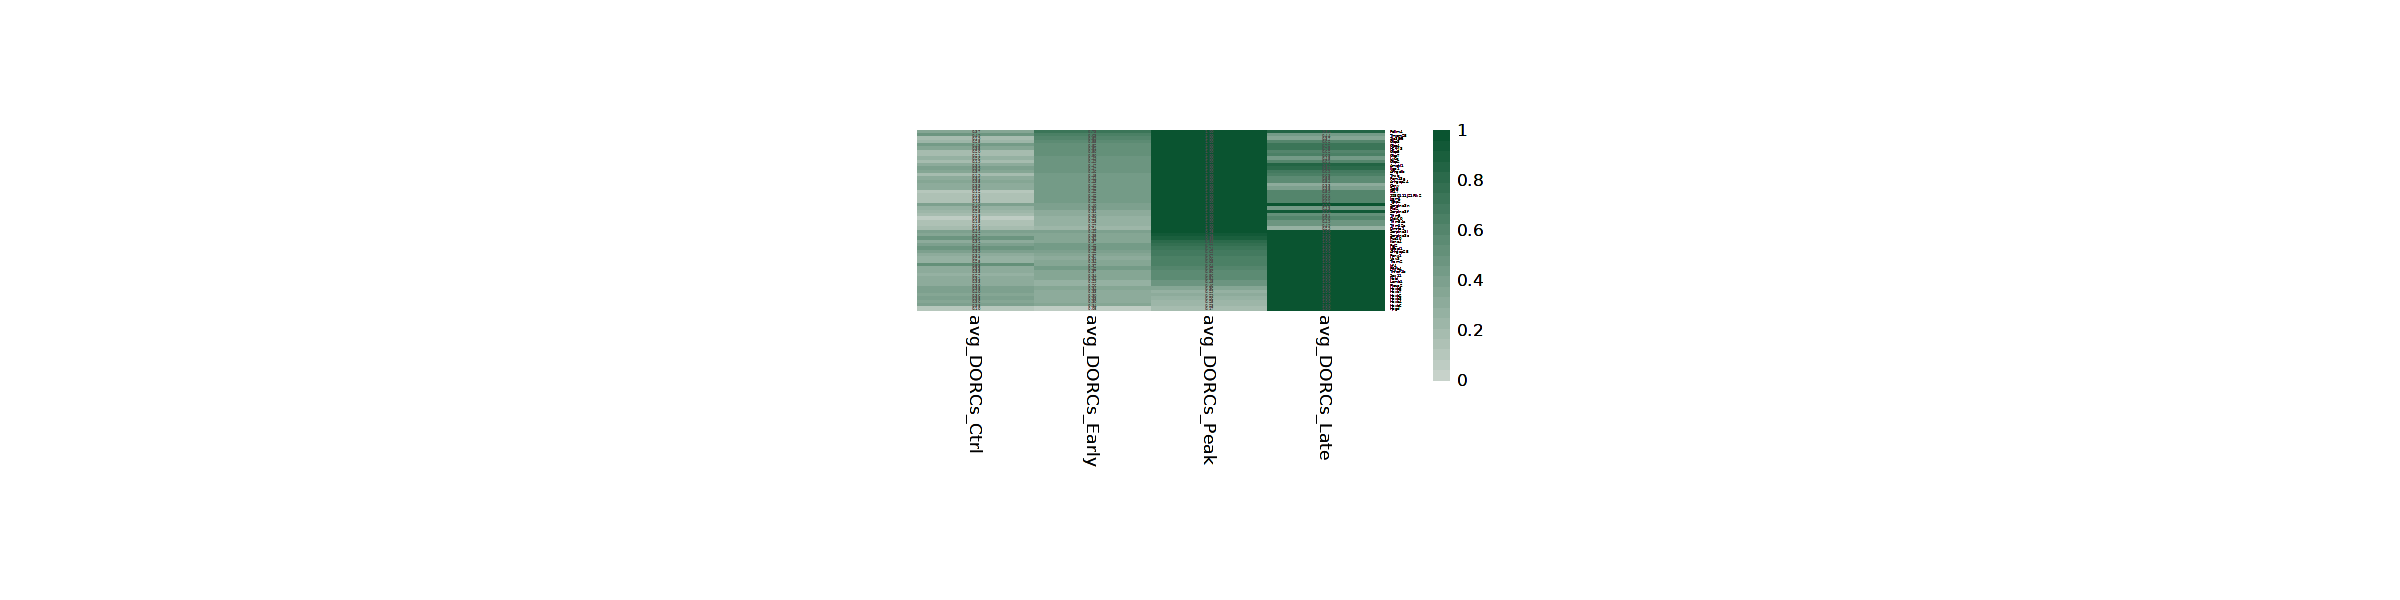

In [117]:
options(repr.plot.width=20, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [118]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_Enhancers_",cluster_choice,".pdf"), width=20, height=plot_height)

png 
  2

In [119]:
tmp_sample_markers_DORCs_mean <- data.frame(matrix(0L, ncol=1, nrow=length(gene_list), dimnames=list(gene_list, "Mean_DORCs")))

In [120]:
tmp_sample_markers_DORCs_mean[rownames(tmp_sample_markers_DORCs),"Mean_DORCs"] <- rowMeans(tmp_sample_markers_DORCs)

In [121]:
matrix <- tmp_sample_markers_DORCs_mean

In [122]:
paletteLength <- 50
myColor <- colorRampPalette(c("white", "black"))(paletteLength/2)
myBreaks <- c(seq(0, max(matrix), length.out=floor(paletteLength/2)))

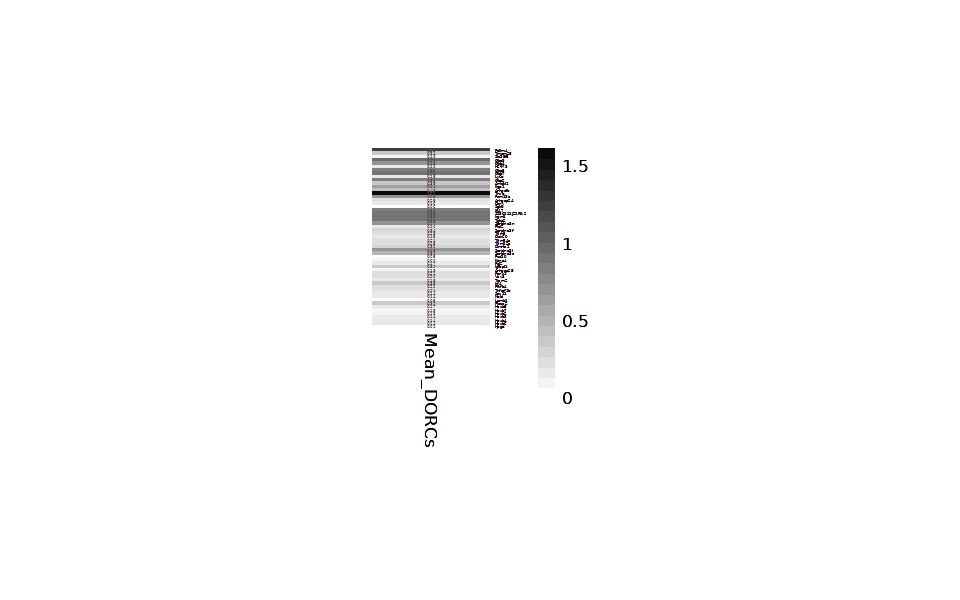

In [123]:
options(repr.plot.width=8, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [124]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_Enhancers_",cluster_choice,"_mean.pdf"), width=7, height=plot_height)

png 
  2

In [125]:
tmp_sample_markers_zscore <- t(apply(tmp_sample_markers_DORCs[gene_list,], 1, scale))
colnames(tmp_sample_markers_zscore) <- paste0("zscore_", sample_names)
matrix <- tmp_sample_markers_zscore

In [126]:
paletteLength <- 100
myColor <- colorRampPalette(c("blue", "white", "red"))(paletteLength/2)
myBreaks <- c(seq(-max(abs(matrix)), max(abs(matrix)), length.out=floor(paletteLength/2)))
myColor[(paletteLength/4):((paletteLength/4)+1)] <- c("#FFFFFF", "#FFFFFF")

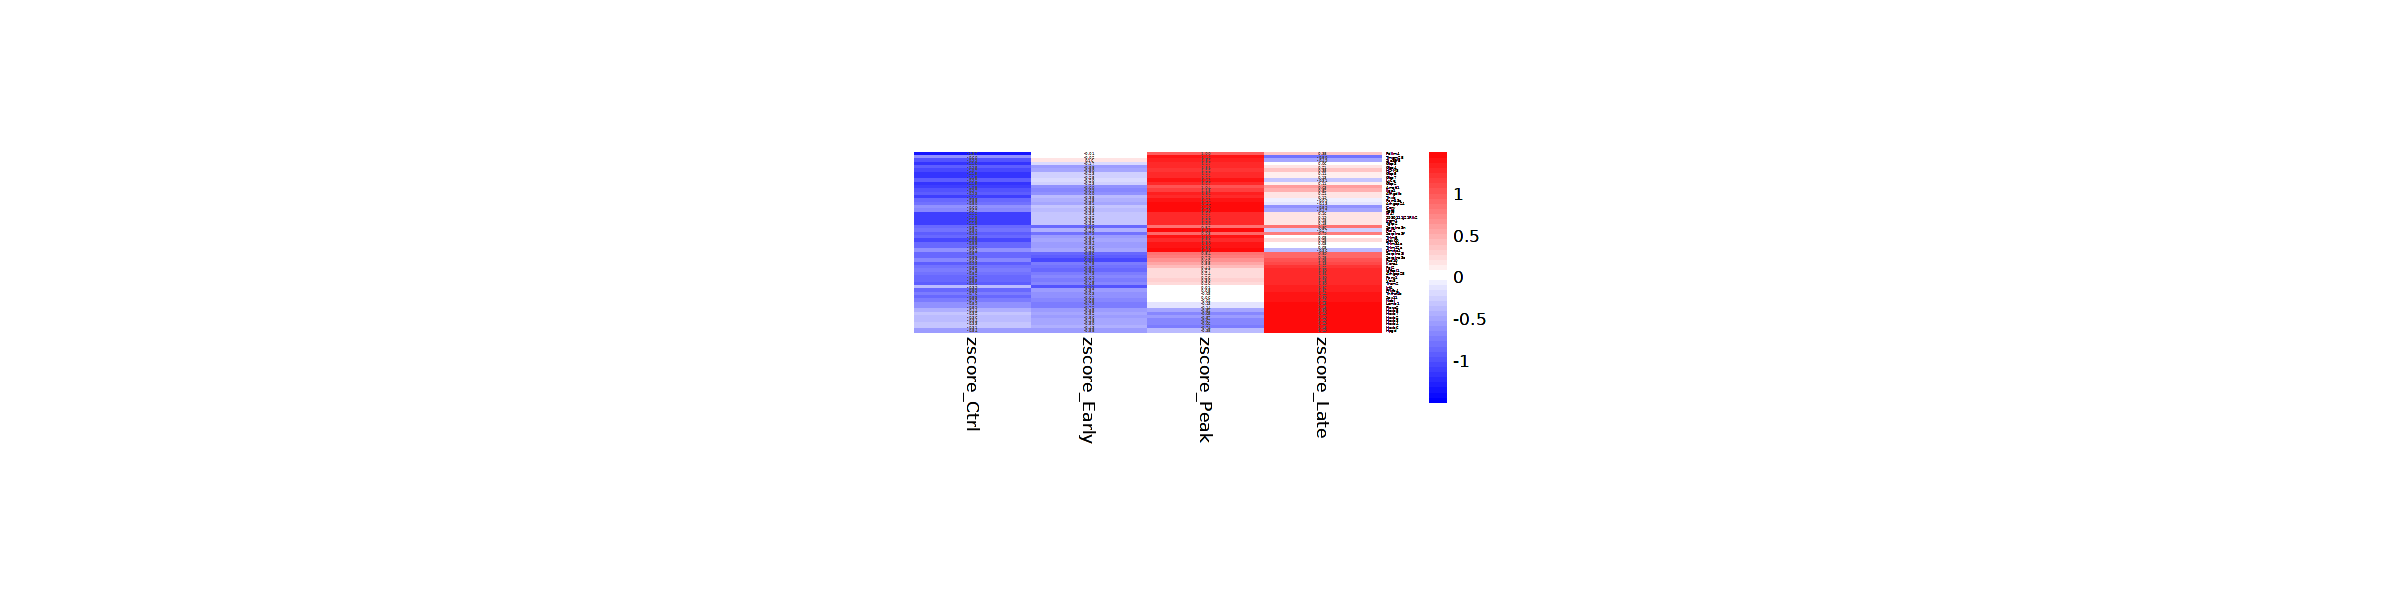

In [127]:
options(repr.plot.width=20, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [128]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_Enhancers_",cluster_choice,"_zscore.pdf"), width=20, height=plot_height)

png 
  2

In [129]:
matrix <- tmp_sample_markers_RNA
matrix_sub <- tmp_sample_markers_RNA_sub

In [130]:
matrix_sub <- matrix_sub/do.call(pmax, matrix_sub)

In [131]:
is.nan.data.frame <- function(x)
do.call(cbind, lapply(x, is.nan))

matrix_sub[is.nan.data.frame(matrix_sub)] <- 0

In [132]:
matrix[rownames(matrix_sub),] <- matrix_sub
matrix <- matrix[gene_list,]

In [133]:
paletteLength <- 50
myColor <- colorRampPalette(c("#FFFFB3", "#5E3719"))(paletteLength/2)
myBreaks <- c(seq(0, max(matrix), length.out=floor(paletteLength/2)))

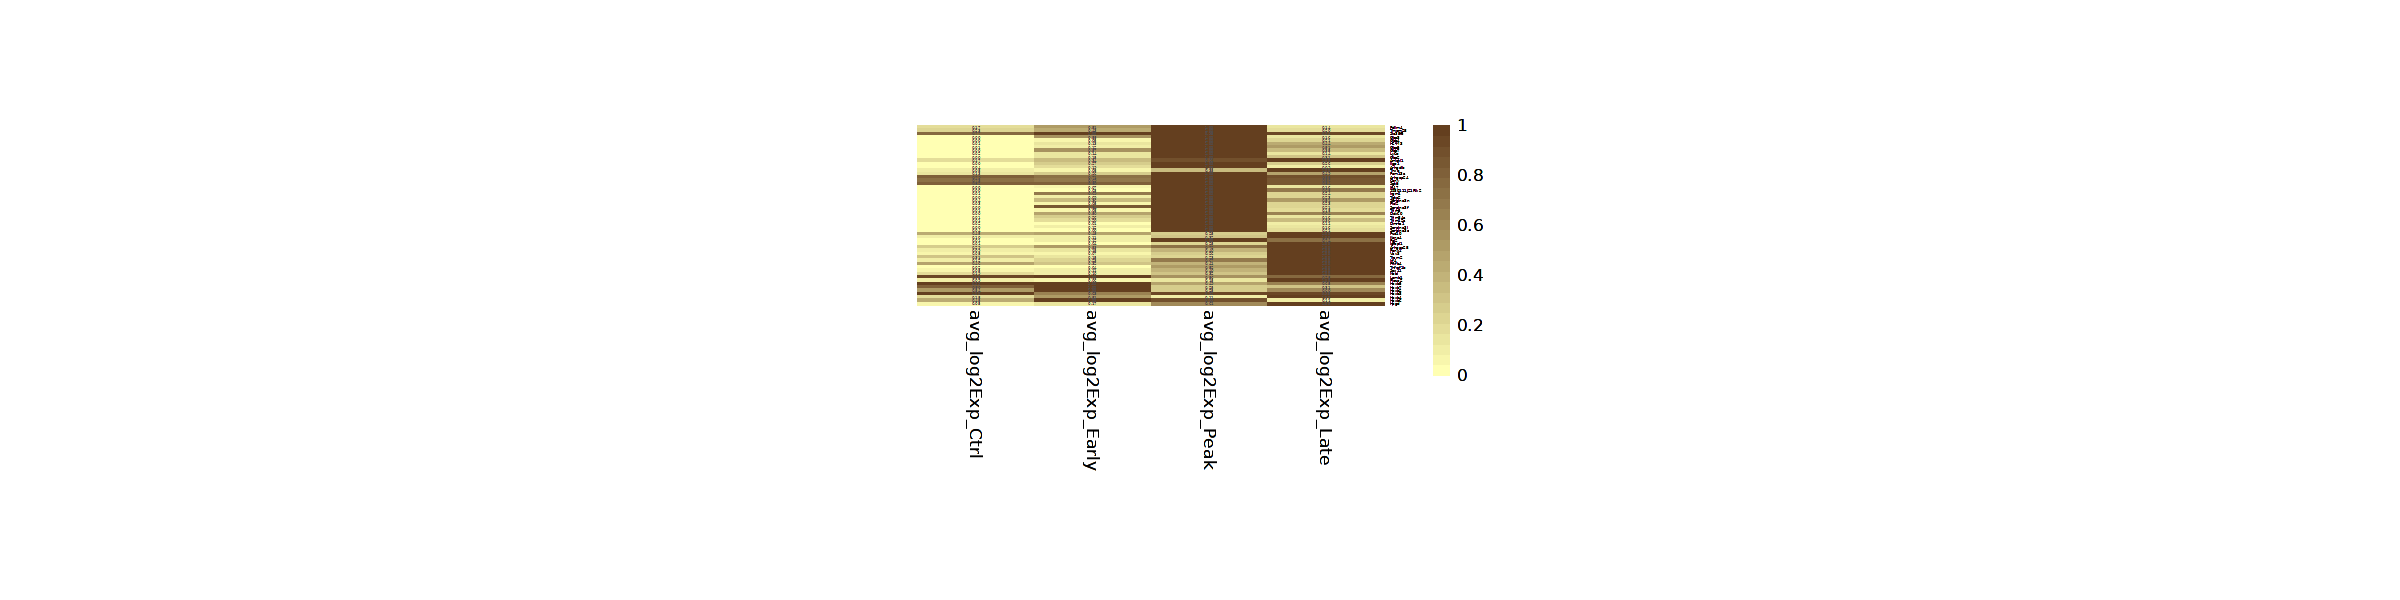

In [134]:
options(repr.plot.width=20, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [135]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_RNA_",cluster_choice,".pdf"), width=20, height=plot_height)

png 
  2

In [136]:
tmp_sample_markers_RNA_mean <- data.frame(matrix(0L, ncol=1, nrow=length(gene_list), dimnames=list(gene_list, "Mean_Exp")))

In [137]:
tmp_sample_markers_RNA_mean[rownames(tmp_sample_markers_RNA_sub),"Mean_Exp"] <- rowMeans(tmp_sample_markers_RNA_sub)

In [138]:
matrix <- tmp_sample_markers_RNA_mean

In [139]:
is.nan.data.frame <- function(x)
do.call(cbind, lapply(x, is.na))

matrix[is.na.data.frame(matrix)] <- 0

In [140]:
paletteLength <- 50
myColor <- colorRampPalette(c("white", "black"))(paletteLength/2)
myBreaks <- c(seq(0, max(matrix), length.out=floor(paletteLength/2)))

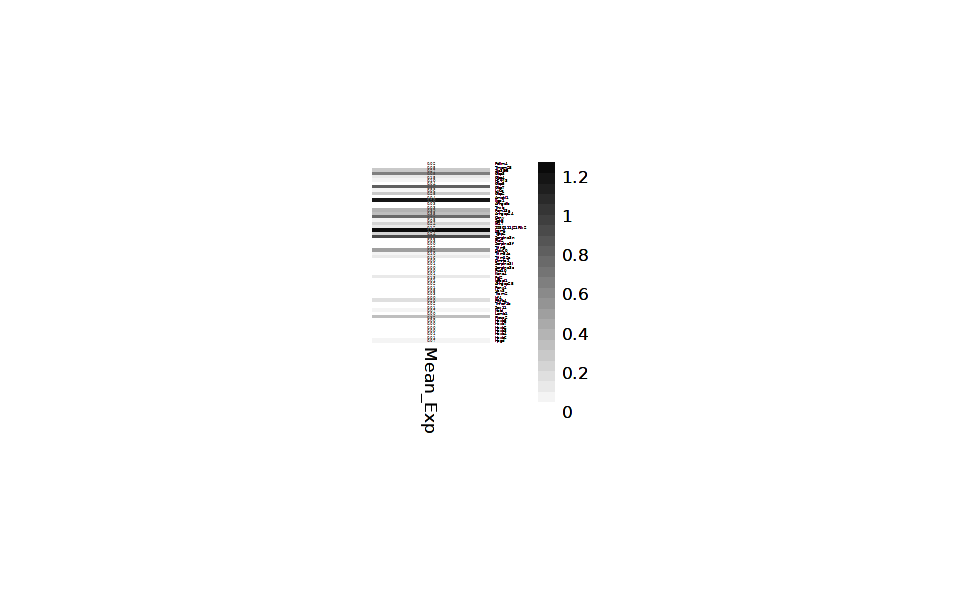

In [141]:
options(repr.plot.width=8, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [142]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_RNA_",cluster_choice,"_mean.pdf"), width=7, height=plot_height)

png 
  2

In [143]:
tmp_sample_markers_RNA[rownames(tmp_sample_markers_RNA_sub),] <- tmp_sample_markers_RNA_sub

In [144]:
tmp_sample_markers_RNA_zscore <- t(apply(tmp_sample_markers_RNA[gene_list,], 1, scale))
colnames(tmp_sample_markers_RNA_zscore) <- paste0("zscore_", sample_names)
matrix <- tmp_sample_markers_RNA_zscore

In [145]:
is.nan.data.frame <- function(x)
do.call(cbind, lapply(x, is.na))

matrix[is.na.data.frame(matrix)] <- 0

In [146]:
paletteLength <- 100
myColor <- colorRampPalette(c("blue", "white", "red"))(paletteLength/2)
myBreaks <- c(seq(-max(abs(matrix)), max(abs(matrix)), length.out=floor(paletteLength/2)))
myColor[(paletteLength/4):((paletteLength/4)+1)] <- c("#FFFFFF", "#FFFFFF")

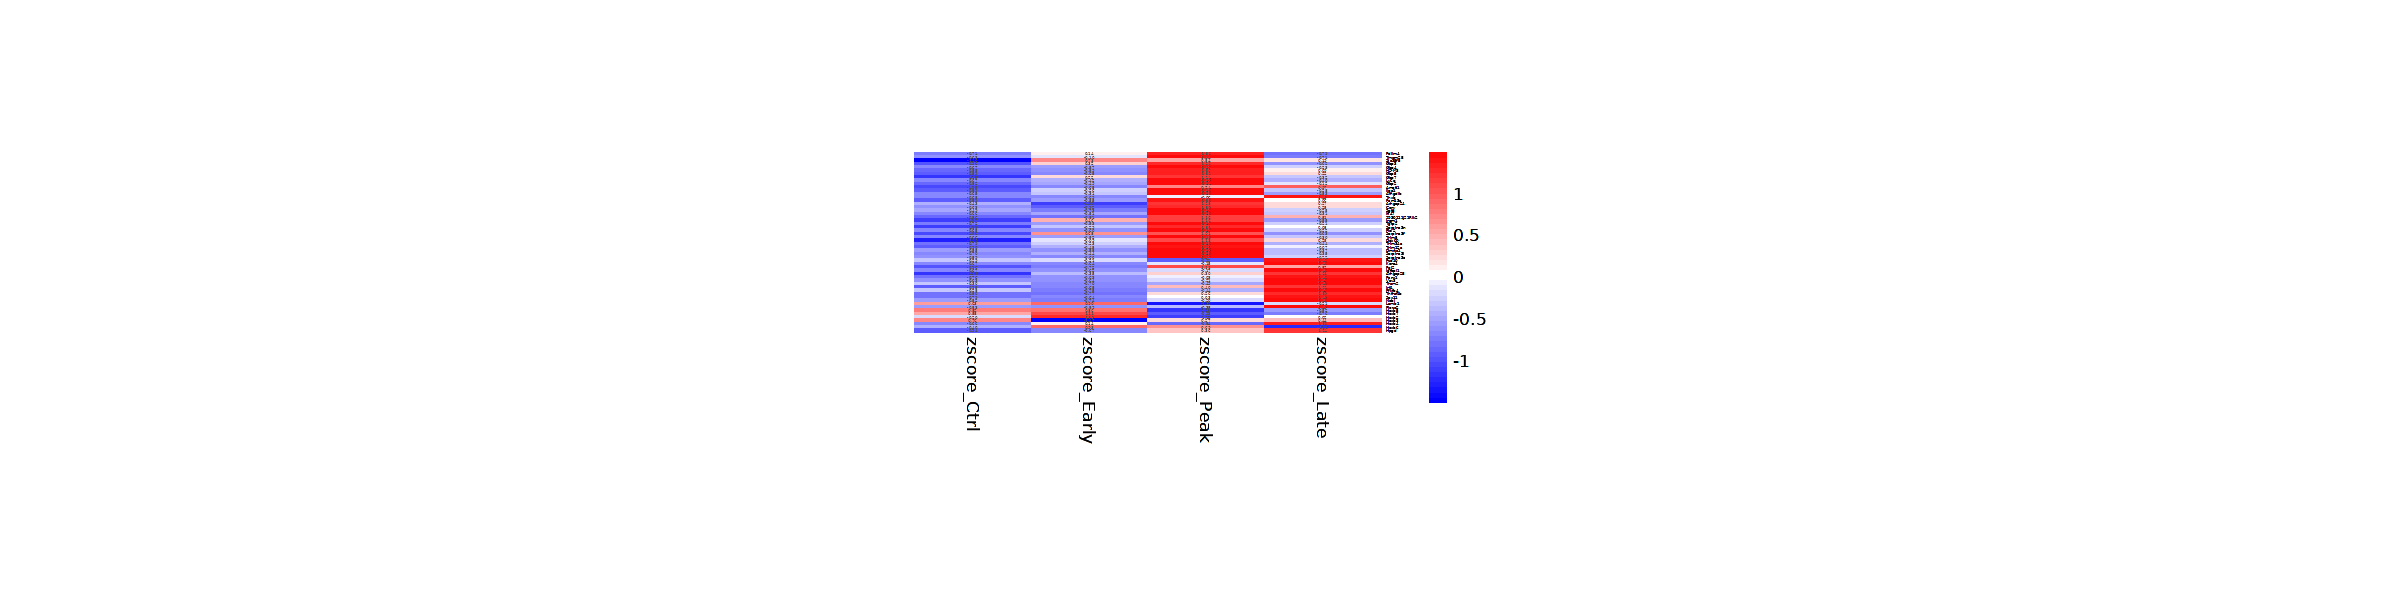

In [147]:
options(repr.plot.width=20, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [148]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_RNA_",cluster_choice,"_zscore.pdf"), width=20, height=plot_height)

png 
  2

In [149]:
matrix <- tmp_sample_markers_GenePromAcc
matrix_sub <- tmp_sample_markers_GenePromAcc_sub

In [150]:
matrix_sub <- matrix_sub/do.call(pmax, matrix_sub)

In [151]:
is.nan.data.frame <- function(x)
do.call(cbind, lapply(x, is.nan))

matrix_sub[is.nan.data.frame(matrix_sub)] <- 0

In [152]:
matrix[rownames(matrix_sub),] <- matrix_sub
matrix <- matrix[gene_list,]

In [153]:
paletteLength <- 50
myColor <- colorRampPalette(c("#FFBCB5", "#432371"))(paletteLength/2)
myBreaks <- c(seq(0, max(matrix), length.out=floor(paletteLength/2)))

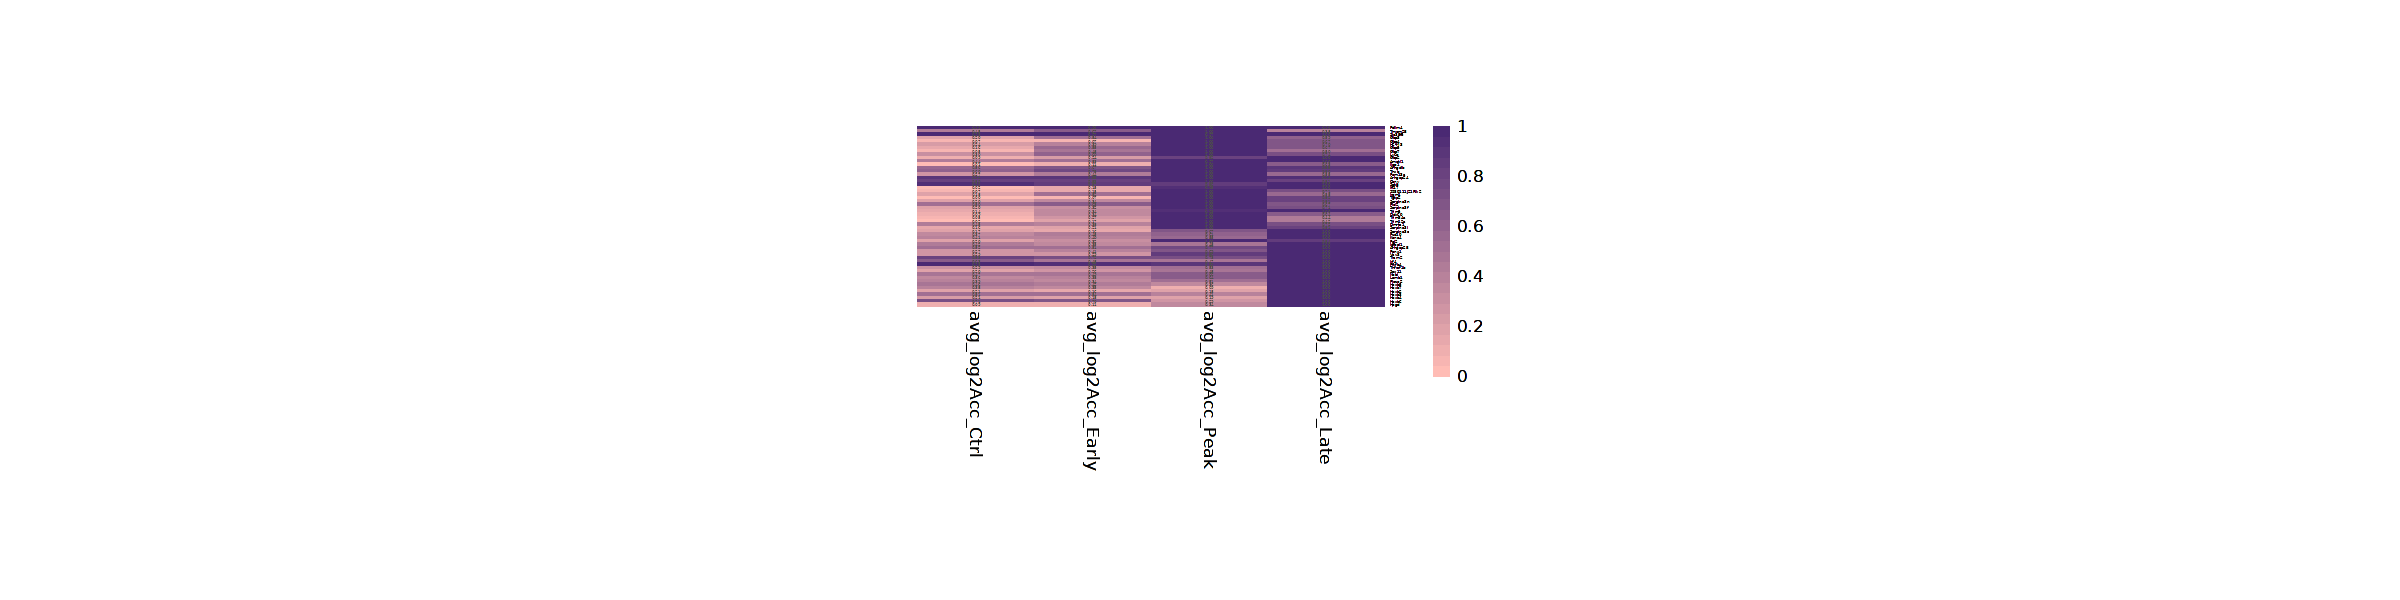

In [154]:
options(repr.plot.width=20, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [155]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_Acc_",cluster_choice,".pdf"), width=20, height=plot_height)

png 
  2

In [156]:
tmp_sample_markers_GenePromAcc_mean <- data.frame(matrix(0L, ncol=1, nrow=length(gene_list), dimnames=list(gene_list, "Mean_GenePromAcc")))

In [157]:
tmp_sample_markers_GenePromAcc_mean[rownames(tmp_sample_markers_GenePromAcc_sub),"Mean_GenePromAcc"] <- rowMeans(tmp_sample_markers_GenePromAcc_sub)

In [158]:
matrix <- tmp_sample_markers_GenePromAcc_mean

In [159]:
is.nan.data.frame <- function(x)
do.call(cbind, lapply(x, is.na))

matrix[is.na.data.frame(matrix)] <- 0

In [160]:
paletteLength <- 50
myColor <- colorRampPalette(c("white", "black"))(paletteLength/2)
myBreaks <- c(seq(0, max(matrix), length.out=floor(paletteLength/2)))

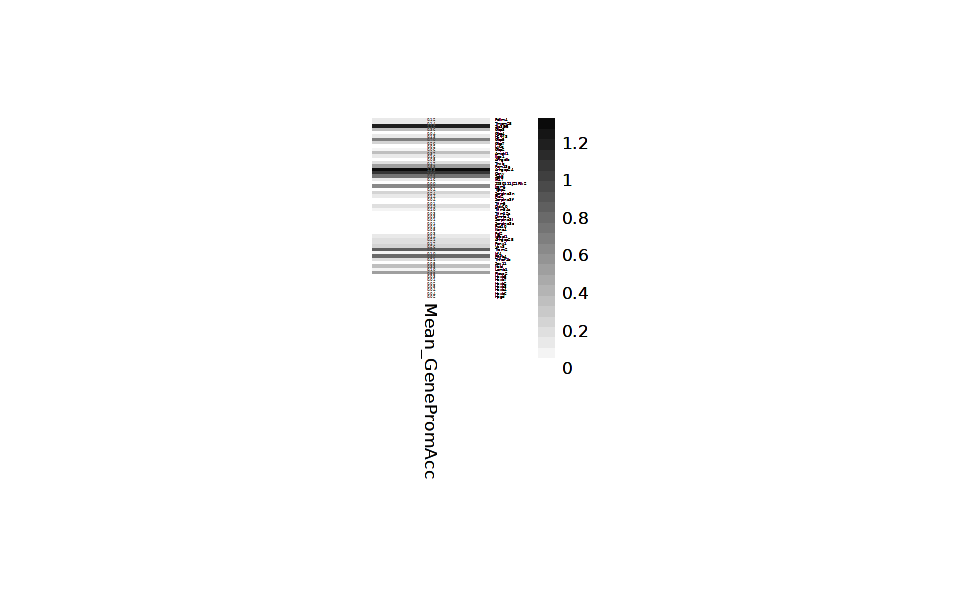

In [161]:
options(repr.plot.width=8, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [162]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_Acc_",cluster_choice,"_mean.pdf"), width=7, height=plot_height)

png 
  2

In [163]:
tmp_sample_markers_GenePromAcc[rownames(tmp_sample_markers_GenePromAcc_sub),] <- tmp_sample_markers_GenePromAcc_sub

In [164]:
tmp_sample_markers_GenePromAcc_zscore <- t(apply(tmp_sample_markers_GenePromAcc[gene_list,], 1, scale))
colnames(tmp_sample_markers_GenePromAcc_zscore) <- paste0("zscore_", sample_names)
matrix <- tmp_sample_markers_GenePromAcc_zscore

In [165]:
is.nan.data.frame <- function(x)
do.call(cbind, lapply(x, is.na))

matrix[is.na.data.frame(matrix)] <- 0

In [166]:
paletteLength <- 100
myColor <- colorRampPalette(c("blue", "white", "red"))(paletteLength/2)
myBreaks <- c(seq(-max(abs(matrix)), max(abs(matrix)), length.out=floor(paletteLength/2)))
myColor[(paletteLength/4):((paletteLength/4)+1)] <- c("#FFFFFF", "#FFFFFF")

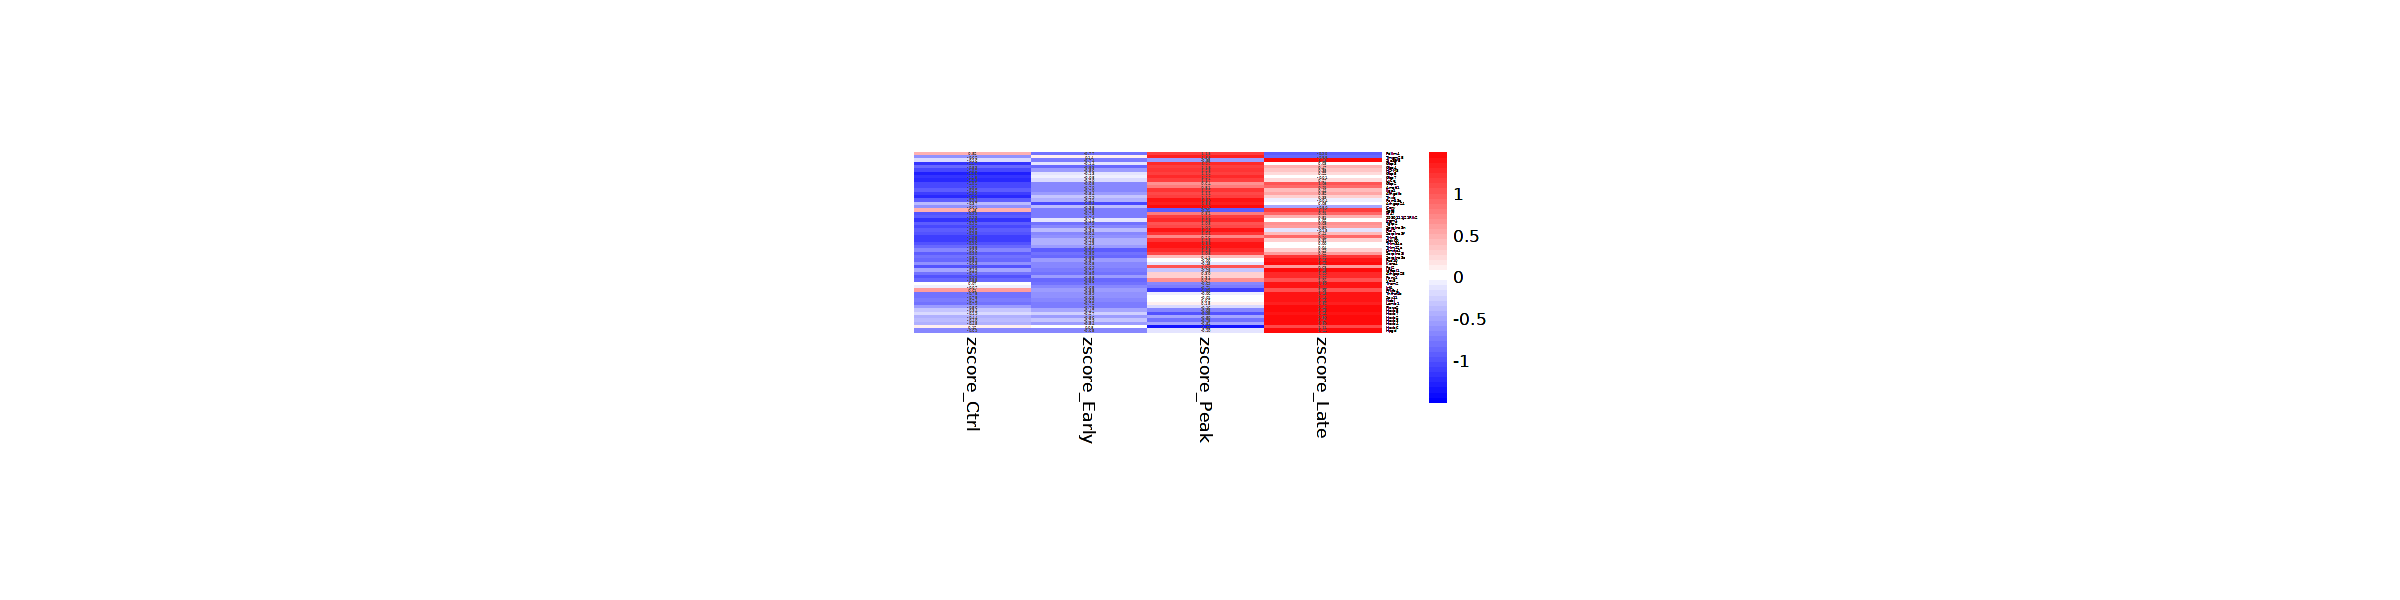

In [167]:
options(repr.plot.width=20, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [168]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_Acc_",cluster_choice,"_zscore.pdf"), width=20, height=plot_height)

png 
  2

##### 3.1.1.2 Module dynamics

In [169]:
dynamics_genes <- c("Pdlim4","Tmem28","Slc35f5","Gbp3","Gbp4","H2-M3","Gbp5","Gbp7","Ly6e","Gbp2","Amotl1","Iigp1","Arhgdib","Tnxb","Fam13a","Arhgap24","Ccny","Sgtb","Ifi47","9930111J21Rik2","Irgm1","Tgtp2","Serpina3n","Plcl2","Serpina3f","Trim5","Ddx60","Trim34a","Trim12a","Dmrta1","Serpina3i","Serpina3c","Fzd10","Kcna4","Fgl2","Igfbpl1","Arhgap28","Panx1","Vav3","Tram2","Irf4","Pfkfb4","Tnfrsf1b","Sox11","Nebl","Lamb1","Piezo2","Hoxb5","Hoxb7","Hoxb2","Hoxb3","Hoxb4","Hoxb6","Hpgd")

In [170]:
gene_list <- dynamics_genes

In [171]:
Idents(object = tmp) <- "orig.ident_merge"

In [172]:
sample_names <- levels(tmp$orig.ident_merge)

In [173]:
tmp_sample_markers_DORCs <- data.frame(matrix(0L, ncol=length(sample_names), nrow=length(gene_list), dimnames=list(gene_list, paste0("avg_DORCs_", sample_names))))

In [174]:
for (i in 1:length(colnames(tmp_sample_markers_DORCs))){
    tmp_sample_markers_DORCs[,i] <- as.vector(AverageExpression(subset(x = tmp, subset = orig.ident_merge == sample_names[i]), assays = "DORCs", features = gene_list, slot = "counts")[['DORCs']])
}

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.



In [175]:
tmp_sample_markers_RNA <- data.frame(matrix(0L, ncol=length(sample_names), nrow=length(gene_list), dimnames=list(gene_list, paste0("avg_log2Exp_", sample_names))))

In [176]:
gene_list_RNA <- gene_list[gene_list %in% rownames(tmp[['RNA']])]

In [177]:
genes0 <- names(rowSums(tmp[['RNA']]@counts[gene_list_RNA,])[rowSums(tmp[['RNA']]@counts[gene_list_RNA,]) == 0])

In [178]:
gene_list_RNA <- gene_list_RNA[!gene_list_RNA %in% genes0]

In [179]:
tmp_sample_markers_RNA_sub <- data.frame(matrix(0L, ncol=length(sample_names), nrow=length(gene_list_RNA), dimnames=list(gene_list_RNA, paste0("avg_log2Exp_", sample_names))))

In [180]:
for (i in 1:length(colnames(tmp_sample_markers_RNA_sub))){
    tmp_sample_markers_RNA_sub[,i] <- log2(as.vector(AverageExpression(subset(x = tmp, subset = orig.ident_merge == sample_names[i]), assays = "RNA", features = gene_list_RNA, slot = "data")[['RNA']])+1)
}

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.



In [181]:
tmp_sample_markers_GenePromAcc <- data.frame(matrix(0L, ncol=length(sample_names), nrow=length(gene_list), dimnames=list(gene_list, paste0("avg_log2Acc_", sample_names))))

In [182]:
gene_list_GenePromAcc <- gene_list[gene_list %in% rownames(tmp[['GenePromAcc']])]

In [183]:
genes0 <- names(rowSums(tmp[['GenePromAcc']]@counts[gene_list_GenePromAcc,])[rowSums(tmp[['GenePromAcc']]@counts[gene_list_GenePromAcc,]) == 0])

In [184]:
gene_list_GenePromAcc <- gene_list_GenePromAcc[!gene_list_GenePromAcc %in% genes0]

In [185]:
tmp_sample_markers_GenePromAcc_sub <- data.frame(matrix(0L, ncol=length(sample_names), nrow=length(gene_list_GenePromAcc), dimnames=list(gene_list_GenePromAcc, paste0("avg_GenePromAcc_", sample_names))))

In [186]:
for (i in 1:length(colnames(tmp_sample_markers_GenePromAcc_sub))){
    tmp_sample_markers_GenePromAcc_sub[,i] <- log2(as.vector(AverageExpression(subset(x = tmp, subset = orig.ident_merge == sample_names[i]), assays = "GenePromAcc", features = gene_list_GenePromAcc, slot = "data")[['GenePromAcc']])+1)
}

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.



In [187]:
tmp_sample_markers_DORCs_scaled <- tmp_sample_markers_DORCs/do.call(pmax, tmp_sample_markers_DORCs)

In [188]:
tmp_sample_markers_RNA_sub_scaled <- tmp_sample_markers_RNA_sub/do.call(pmax, tmp_sample_markers_RNA_sub)

In [189]:
tmp_sample_markers_GenePromAcc_sub_scaled <- tmp_sample_markers_GenePromAcc_sub/do.call(pmax, tmp_sample_markers_GenePromAcc_sub)

###### 3.1.1.2.1 Category 1

In [192]:
gene_list <- c("Pdlim4","Tmem28","Slc35f5","Gbp3","Gbp4","H2-M3","Gbp5","Gbp7","Ly6e","Gbp2","Amotl1","Iigp1","Arhgdib","Tnxb","Fam13a","Arhgap24","Ccny","Sgtb","Ifi47","9930111J21Rik2","Irgm1","Tgtp2","Serpina3n","Plcl2","Serpina3f","Trim5","Ddx60","Trim34a","Trim12a","Dmrta1")

In [193]:
df_DORCs <- tmp_sample_markers_DORCs_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_DORCs_scaled)],]
df_RNA <- tmp_sample_markers_RNA_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_RNA_sub_scaled)],]
df_GenePromAcc <- tmp_sample_markers_GenePromAcc_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_GenePromAcc_sub_scaled)],]

In [194]:
mean_RNA <- sapply(df_RNA, mean)
mean_GenePromAcc <- sapply(df_GenePromAcc, mean)
mean_DORCs <- sapply(df_DORCs, mean)

In [195]:
sd_RNA <- sapply(df_RNA, sd)
sd_GenePromAcc <- sapply(df_GenePromAcc, sd)
sd_DORCs <- sapply(df_DORCs, sd)

In [196]:
df <- data.frame(
  Mean=c(mean_RNA,mean_GenePromAcc,mean_DORCs),
  SD=c(sd_RNA,sd_GenePromAcc,sd_DORCs),
  Timepoint=rep(c("Ctrl","Early","Peak","Late"),3),
  Group=c(rep("Expression",4), rep("CA",4), rep("DORCs",4))
)

In [197]:
df$Timepoint <- factor(df$Timepoint, levels = c("Ctrl","Early","Peak","Late"))
df$Group <- factor(df$Group, levels = c("Expression","CA","DORCs"))

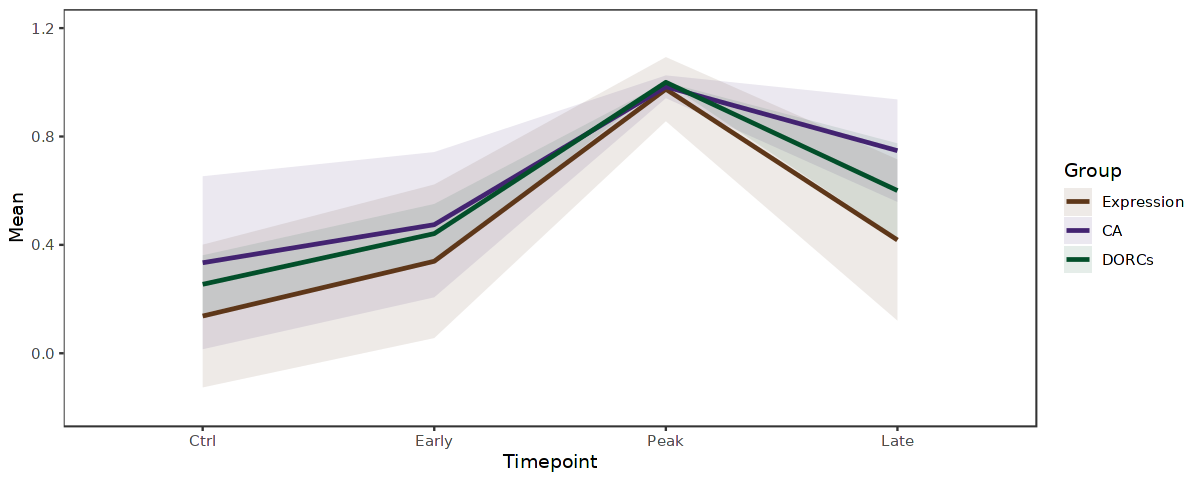

In [199]:
options(repr.plot.width=10, repr.plot.height=4)
ggplot(data = df, aes(x = Timepoint, group = Group)) + 
  geom_ribbon(aes(y = Mean, ymin = Mean - SD, ymax = Mean + SD, fill = Group), alpha = .1) +
  geom_line(aes(y = Mean, color = Group), size = 1) + 
  scale_color_manual(values=c("#5E3719", "#432371","#024F2A")) +
  scale_fill_manual(values=c("#5E3719", "#432371","#024F2A")) +
  ylim(-0.2, 1.2) +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())

###### 3.1.1.2.2 Category 2

In [200]:
gene_list <- c("Serpina3i","Serpina3c","Fzd10","Kcna4","Fgl2","Igfbpl1","Arhgap28","Panx1","Vav3","Tram2","Irf4","Pfkfb4","Tnfrsf1b","Sox11","Nebl","Lamb1","Piezo2","Hoxb5","Hoxb7","Hoxb2","Hoxb3","Hoxb4","Hoxb6","Hpgd")

In [201]:
df_DORCs <- tmp_sample_markers_DORCs_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_DORCs_scaled)],]
df_RNA <- tmp_sample_markers_RNA_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_RNA_sub_scaled)],]
df_GenePromAcc <- tmp_sample_markers_GenePromAcc_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_GenePromAcc_sub_scaled)],]

In [202]:
mean_RNA <- sapply(df_RNA, mean)
mean_GenePromAcc <- sapply(df_GenePromAcc, mean)
mean_DORCs <- sapply(df_DORCs, mean)

In [203]:
sd_RNA <- sapply(df_RNA, sd)
sd_GenePromAcc <- sapply(df_GenePromAcc, sd)
sd_DORCs <- sapply(df_DORCs, sd)

In [204]:
df <- data.frame(
  Mean=c(mean_RNA,mean_GenePromAcc,mean_DORCs),
  SD=c(sd_RNA,sd_GenePromAcc,sd_DORCs),
  Timepoint=rep(c("Ctrl","Early","Peak","Late"),3),
  Group=c(rep("Expression",4), rep("CA",4), rep("DORCs",4))
)

In [205]:
df$Timepoint <- factor(df$Timepoint, levels = c("Ctrl","Early","Peak","Late"))
df$Group <- factor(df$Group, levels = c("Expression","CA","DORCs"))

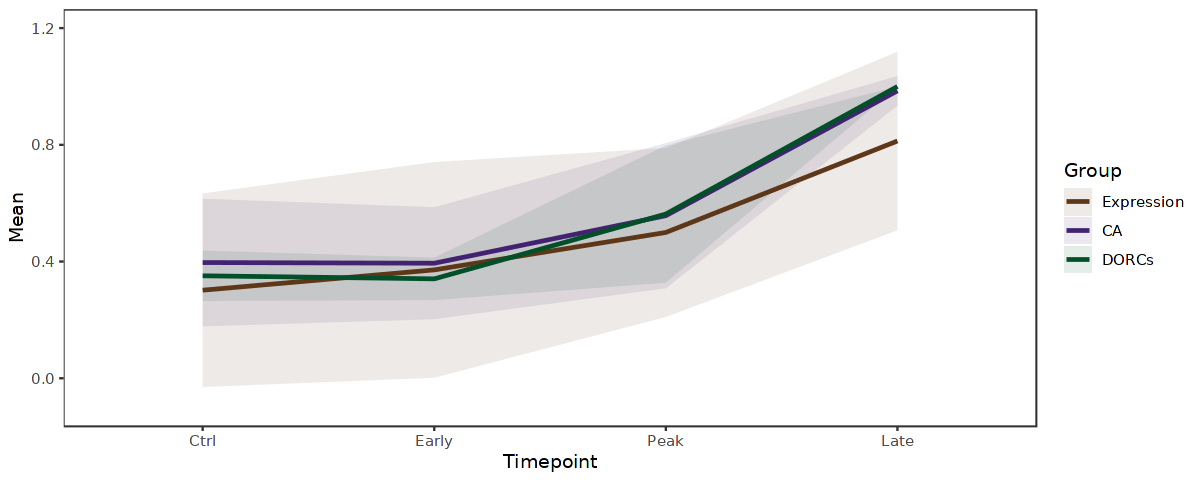

In [206]:
options(repr.plot.width=10, repr.plot.height=4)
ggplot(data = df, aes(x = Timepoint, group = Group)) + 
  geom_ribbon(aes(y = Mean, ymin = Mean - SD, ymax = Mean + SD, fill = Group), alpha = .1) +
  geom_line(aes(y = Mean, color = Group), size = 1) + 
  scale_color_manual(values=c("#5E3719", "#432371","#024F2A")) +
  scale_fill_manual(values=c("#5E3719", "#432371","#024F2A")) +
  ylim(-0.1, 1.2) +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())

#### 3.1.2 MOL2

##### 3.1.2.1 Heatmaps

In [418]:
cluster_choice = "MOL2"

In [419]:
tmp <- subset(MORNAATACCOL, subset = cellType_OL_merge == cluster_choice)

Warning message:
"Keys should be one or more alphanumeric characters followed by an underscore, setting key from umap_peaks_ol_ to umappeaksol_"
Warning message:
"Keys should be one or more alphanumeric characters followed by an underscore, setting key from umap_bimod_ol_ to umapbimodol_"
Warning message:
"Keys should be one or more alphanumeric characters followed by an underscore, setting key from pca_generegchrom_ol_ to pcageneregchromol_"
Warning message:
"Keys should be one or more alphanumeric characters followed by an underscore, setting key from umap_generegchrom_ol_ to umapgeneregchromol_"
Warning message:
"Keys should be one or more alphanumeric characters followed by an underscore, setting key from pca_dorcs_ol_ to pcadorcsol_"
Warning message:
"Keys should be one or more alphanumeric characters followed by an underscore, setting key from umap_dorcs_ol_ to umapdorcsol_"


In [420]:
table_sample_low <- table(MORNAATACCOL$cellType_OL_merge, MORNAATACCOL$orig.ident)[cluster_choice,][table(MORNAATACCOL$cellType_OL_merge, MORNAATACCOL$orig.ident)[cluster_choice,] <= 5]
table_sample_low

sample_keep <- names(orig.ident_colors)[!names(orig.ident_colors) %in% names(table_sample_low)]

EarlyCtrl3 
         4

In [421]:
#Remove sample with low number of cells
keepcells <- rownames(tmp@meta.data[!tmp$orig.ident %in% (names(table_sample_low)),])
tmp <- subset(tmp, cells=keepcells)

In [422]:
table_group_low <-table(MORNAATACCOL$cellType_OL_merge, MORNAATACCOL$orig.ident_merge)[cluster_choice,][table(MORNAATACCOL$cellType_OL_merge, MORNAATACCOL$orig.ident_merge)[cluster_choice,] <= 30]
table_group_low

group_keep <- names(orig.ident_merge_colors)[!names(orig.ident_merge_colors) %in% names(table_group_low)]

named integer(0)

In [423]:
#Remove timepoint with low number of cells
keepcells <- rownames(tmp@meta.data[!tmp$orig.ident_merge %in% (names(table_group_low)),])
tmp <- subset(tmp, cells=keepcells)

In [424]:
tmp$orig.ident <- factor(x = tmp$orig.ident, levels = names(orig.ident_colors)[!names(orig.ident_colors) %in% names(table_sample_low)])
tmp$orig.ident_merge <- factor(x = tmp$orig.ident_merge, levels = names(orig.ident_merge_colors)[!names(orig.ident_merge_colors) %in% names(table_group_low)])

In [425]:
DefaultAssay(tmp) <- "GenePromAcc"

In [426]:
tmp <- NormalizeData(tmp, normalization.method = "LogNormalize", scale.factor = 10000, margin = 1, verbose = TRUE)

In [427]:
DefaultAssay(tmp) <- "RNA"

In [428]:
tmp <- NormalizeData(tmp, normalization.method = "LogNormalize", scale.factor = 10000, margin = 1, verbose = TRUE)

In [429]:
dynamics_genes <- c("Apobec1","Vstm4","Mpped2","Gm16499","Speg","Rora","Megf6","Mcm2","Runx1t1","Nmnat2","Gfpt2","Chst10","Plekha6","Pdk1","D6Ertd474e","Gpr137b","Kif19a","Gjb2","Notch2","Tiam2","Pdzrn3","Nid1","Kank1","Nab2","Dennd3","AU020206","Pik3r5","Serpine1","Vim","Vgf","Trim56","Adam9","Socs1","Sorcs2","Cacng5","Shisa2","Tvp23a","Grik3","Spink10","Tgif2","Pdlim4","Gsap","Cacna1h","Hoxc10","Endod1","Vat1l","Ciita","Chl1","Syt4","Slc35f5","Casp7","Larp4b","Amotl1","Ido2","Ucn2","Lsp1","Fgl2","Pfkfb4","Fndc7","Piwil4","Ido1","Kirrel","Ptpn21","Elf4","Tmem196","Tubb6","Ric3","9530026P05Rik","Cd274","Arhgap28","Sdc3","Gm26658","Lrp1","Rgs20","Kcnk10","Hrh1","Ptpn5","Arhgap24","Syt6","Axl","Tnc","Gbp3","Iigp1","Gbp2","Gbp5","Usp18","Gbp7","Stat1","Parp9","Gbp8","Gbp9","Igtp","Gm6034","Irx2","Tnxb","Irgm2","Ifi47","Irgm1","Tgtp2","Cmpk2","9930111J21Rik2","Zc3hav1","Ly6e","Rsad2","S100a11","Fzd10","S100a10","Igsf21","Gbp4","Gm3764","D430041D05Rik","Irf4","Mkx","C230038L03Rik","Nebl","Tnfrsf1b","Fzd9","Zfp385b","Ebf3","Ptpn18","Lpar3","Rnase1","Elmod2","Frem2","Khdrbs3","Zfp423","Frs2","2010300C02Rik","Hes3","Gm2694","Trabd2b","Trim12a","Trim34a","Trim5","Syde2","Filip1","Mdfic","Sema6d","Dhrs3","Ccdc3","Rin3","Tgfb2","Nln","Fam135b","Gm9922","Plcl2","Rxrg","Lmo7","Hmcn1","Aass","Slc24a4","4930517E11Rik","Rapgef4","Bmp7","Gm27016","M5C1000I18Rik","Arl15","Rai14","Piezo2","Slc9b2","Gm17501","Ajap1")

In [430]:
gene_list <- dynamics_genes

In [431]:
Idents(object = tmp) <- "orig.ident"

In [432]:
sample_names <- levels(tmp$orig.ident)

In [433]:
tmp_sample_markers_DORCs <- data.frame(matrix(0L, ncol=length(sample_names), nrow=length(gene_list), dimnames=list(gene_list, paste0("avg_DORCs_", sample_names))))

In [434]:
for (i in 1:length(colnames(tmp_sample_markers_DORCs))){
    tmp_sample_markers_DORCs[,i] <- as.vector(AverageExpression(subset(x = tmp, subset = orig.ident == sample_names[i]), assays = "DORCs", features = gene_list, slot = "counts")[['DORCs']])
}

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing acro

In [435]:
tmp_sample_markers_RNA <- data.frame(matrix(0L, ncol=length(sample_names), nrow=length(gene_list), dimnames=list(gene_list, paste0("avg_log2Exp_", sample_names))))

In [436]:
gene_list_RNA <- gene_list[gene_list %in% rownames(tmp[['RNA']])]

In [437]:
genes0 <- names(rowSums(tmp[['RNA']]@counts[gene_list_RNA,])[rowSums(tmp[['RNA']]@counts[gene_list_RNA,]) == 0])

In [438]:
gene_list_RNA <- gene_list_RNA[!gene_list_RNA %in% genes0]

In [439]:
tmp_sample_markers_RNA_sub <- data.frame(matrix(0L, ncol=length(sample_names), nrow=length(gene_list_RNA), dimnames=list(gene_list_RNA, paste0("avg_log2Exp_", sample_names))))

In [440]:
for (i in 1:length(colnames(tmp_sample_markers_RNA_sub))){
    tmp_sample_markers_RNA_sub[,i] <- log2(as.vector(AverageExpression(subset(x = tmp, subset = orig.ident == sample_names[i]), assays = "RNA", features = gene_list_RNA, slot = "data")[['RNA']])+1)
}

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing acro

In [441]:
tmp_sample_markers_GenePromAcc <- data.frame(matrix(0L, ncol=length(sample_names), nrow=length(gene_list), dimnames=list(gene_list, paste0("avg_log2Acc_", sample_names))))

In [442]:
gene_list_GenePromAcc <- gene_list[gene_list %in% rownames(tmp[['GenePromAcc']])]

In [443]:
genes0 <- names(rowSums(tmp[['GenePromAcc']]@counts[gene_list_GenePromAcc,])[rowSums(tmp[['GenePromAcc']]@counts[gene_list_GenePromAcc,]) == 0])

In [444]:
gene_list_GenePromAcc <- gene_list_GenePromAcc[!gene_list_GenePromAcc %in% genes0]

In [445]:
tmp_sample_markers_GenePromAcc_sub <- data.frame(matrix(0L, ncol=length(sample_names), nrow=length(gene_list_GenePromAcc), dimnames=list(gene_list_GenePromAcc, paste0("avg_log2Acc_", sample_names))))

In [446]:
for (i in 1:length(colnames(tmp_sample_markers_GenePromAcc_sub))){
    tmp_sample_markers_GenePromAcc_sub[,i] <- log2(as.vector(AverageExpression(subset(x = tmp, subset = orig.ident == sample_names[i]), assays = "GenePromAcc", features = gene_list_GenePromAcc, slot = "data")[['GenePromAcc']])+1)
}

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing acro

In [447]:
matrix <- tmp_sample_markers_DORCs/do.call(pmax, tmp_sample_markers_DORCs)

In [448]:
paletteLength <- 50
myColor <- colorRampPalette(c("#C7D2CA", "#024F2A"))(paletteLength/2)
myBreaks <- c(seq(0, max(matrix), length.out=floor(paletteLength/2)))

In [449]:
plot_height <- ifelse(as.integer(nrow(matrix)/20)<=5, 5, as.integer(nrow(matrix)/20))

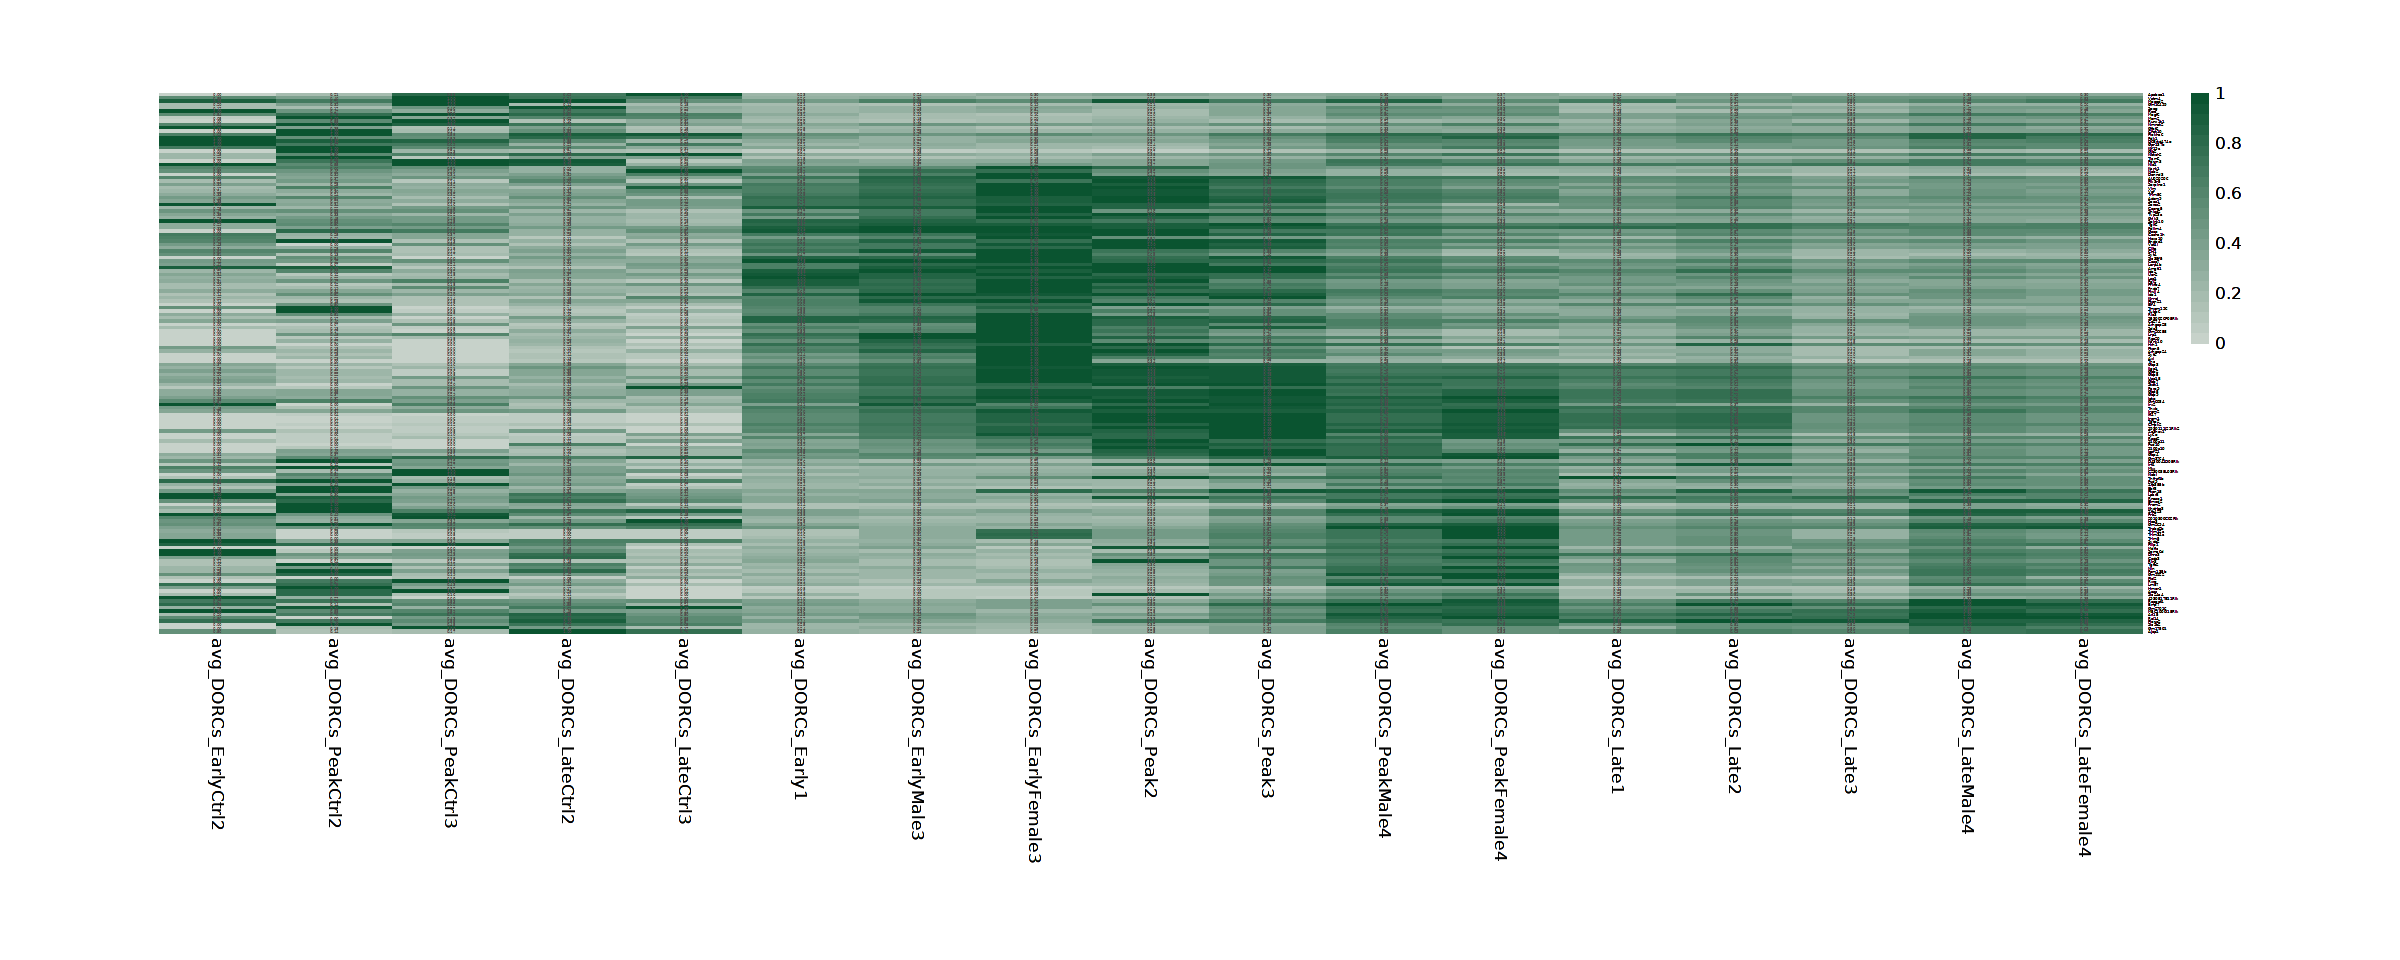

In [450]:
options(repr.plot.width=20, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [451]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_Enhancers_",cluster_choice,"_sep.pdf"), width=20, height=plot_height)

png 
  2

In [452]:
tmp_sample_markers_DORCs_mean <- data.frame(matrix(0L, ncol=1, nrow=length(gene_list), dimnames=list(gene_list, "Mean_DORCs")))

In [453]:
tmp_sample_markers_DORCs_mean[rownames(tmp_sample_markers_DORCs),"Mean_DORCs"] <- rowMeans(tmp_sample_markers_DORCs)

In [454]:
matrix <- tmp_sample_markers_DORCs_mean

In [455]:
paletteLength <- 50
myColor <- colorRampPalette(c("white", "black"))(paletteLength/2)
myBreaks <- c(seq(0, max(matrix), length.out=floor(paletteLength/2)))

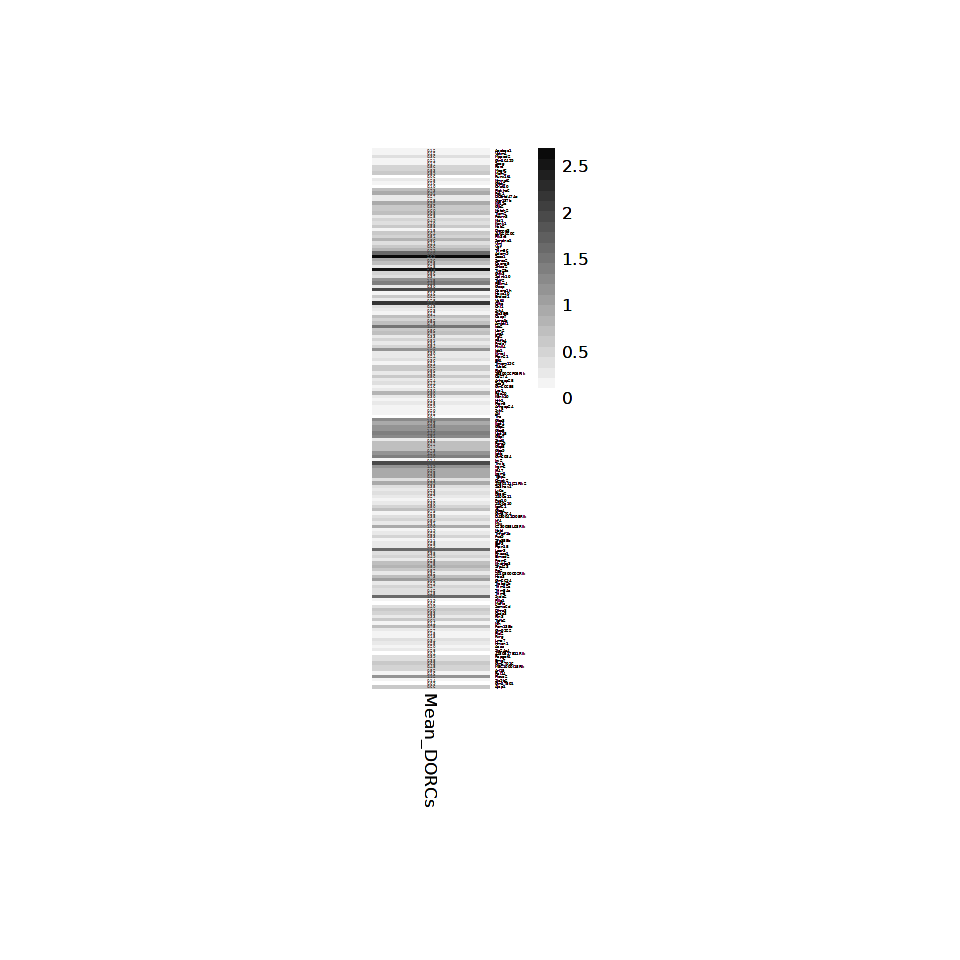

In [456]:
options(repr.plot.width=8, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, 
cluster_rows=FALSE)
ph

In [457]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_Enhancers_",cluster_choice,"_sep_mean.pdf"), width=7, height=plot_height)

png 
  2

In [458]:
tmp_sample_markers_zscore <- t(apply(tmp_sample_markers_DORCs[gene_list,], 1, scale))
colnames(tmp_sample_markers_zscore) <- paste0("zscore_", sample_names)
matrix <- tmp_sample_markers_zscore

In [459]:
paletteLength <- 100
myColor <- colorRampPalette(c("blue", "white", "red"))(paletteLength/2)
myBreaks <- c(seq(-max(abs(matrix)), max(abs(matrix)), length.out=floor(paletteLength/2)))
myColor[(paletteLength/4):((paletteLength/4)+1)] <- c("#FFFFFF", "#FFFFFF")

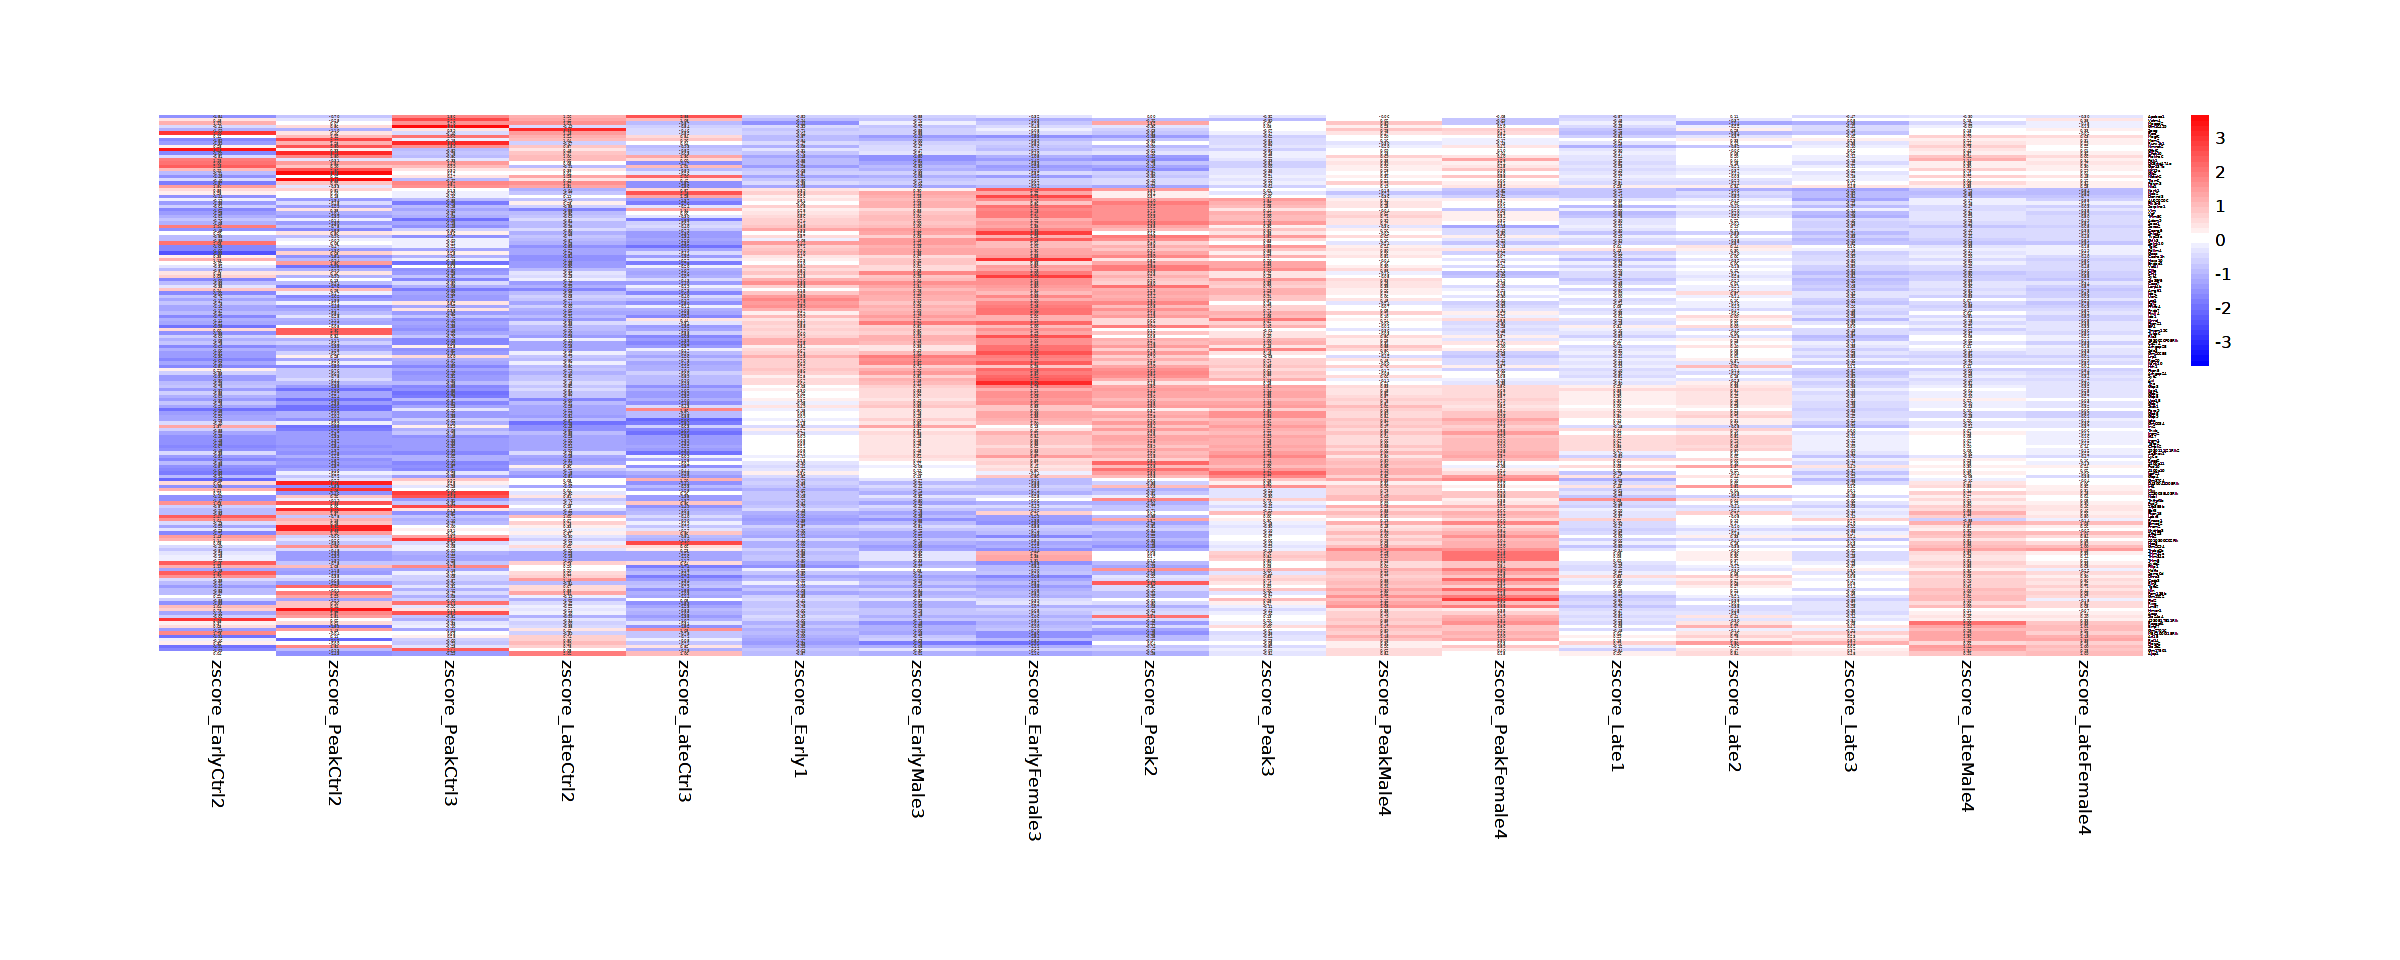

In [460]:
options(repr.plot.width=20, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [461]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_Enhancers_",cluster_choice,"_sep_zscore.pdf"), width=20, height=plot_height)

png 
  2

In [462]:
matrix <- tmp_sample_markers_RNA
matrix_sub <- tmp_sample_markers_RNA_sub

In [463]:
matrix_sub <- matrix_sub/do.call(pmax, matrix_sub)

In [464]:
is.nan.data.frame <- function(x)
do.call(cbind, lapply(x, is.nan))

matrix_sub[is.nan.data.frame(matrix_sub)] <- 0

In [465]:
matrix[rownames(matrix_sub),] <- matrix_sub
matrix <- matrix[gene_list,]

In [466]:
paletteLength <- 50
myColor <- colorRampPalette(c("#FFFFB3", "#5E3719"))(paletteLength/2)
myBreaks <- c(seq(0, max(matrix), length.out=floor(paletteLength/2)))

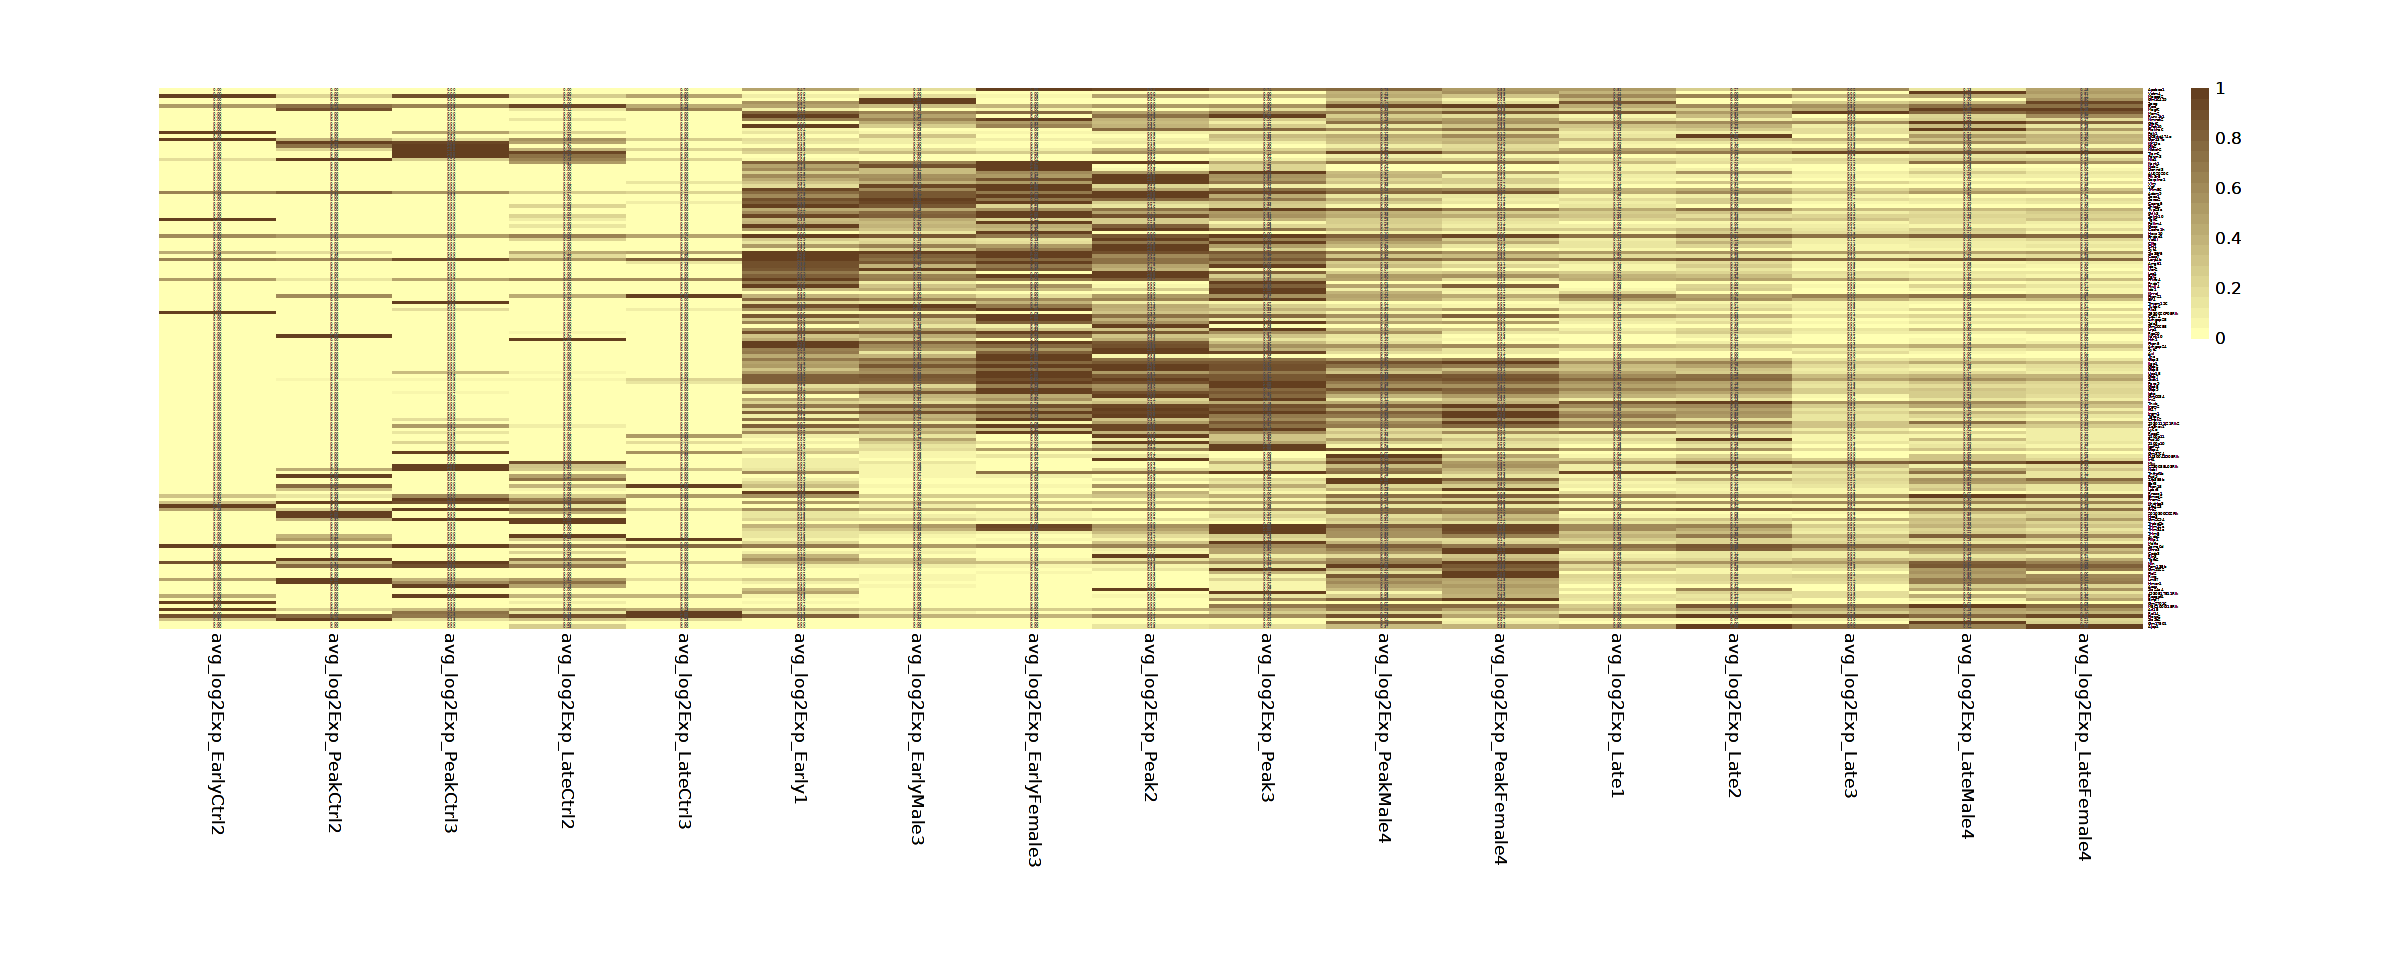

In [467]:
options(repr.plot.width=20, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [468]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_RNA_",cluster_choice,"_sep.pdf"), width=20, height=plot_height)

png 
  2

In [469]:
tmp_sample_markers_RNA_mean <- data.frame(matrix(0L, ncol=1, nrow=length(gene_list), dimnames=list(gene_list, "Mean_Exp")))

In [470]:
tmp_sample_markers_RNA_mean[rownames(tmp_sample_markers_RNA_sub),"Mean_Exp"] <- rowMeans(tmp_sample_markers_RNA_sub)

In [471]:
matrix <- tmp_sample_markers_RNA_mean

In [472]:
is.nan.data.frame <- function(x)
do.call(cbind, lapply(x, is.na))

matrix[is.na.data.frame(matrix)] <- 0

In [473]:
paletteLength <- 50
myColor <- colorRampPalette(c("white", "black"))(paletteLength/2)
myBreaks <- c(seq(0, max(matrix), length.out=floor(paletteLength/2)))

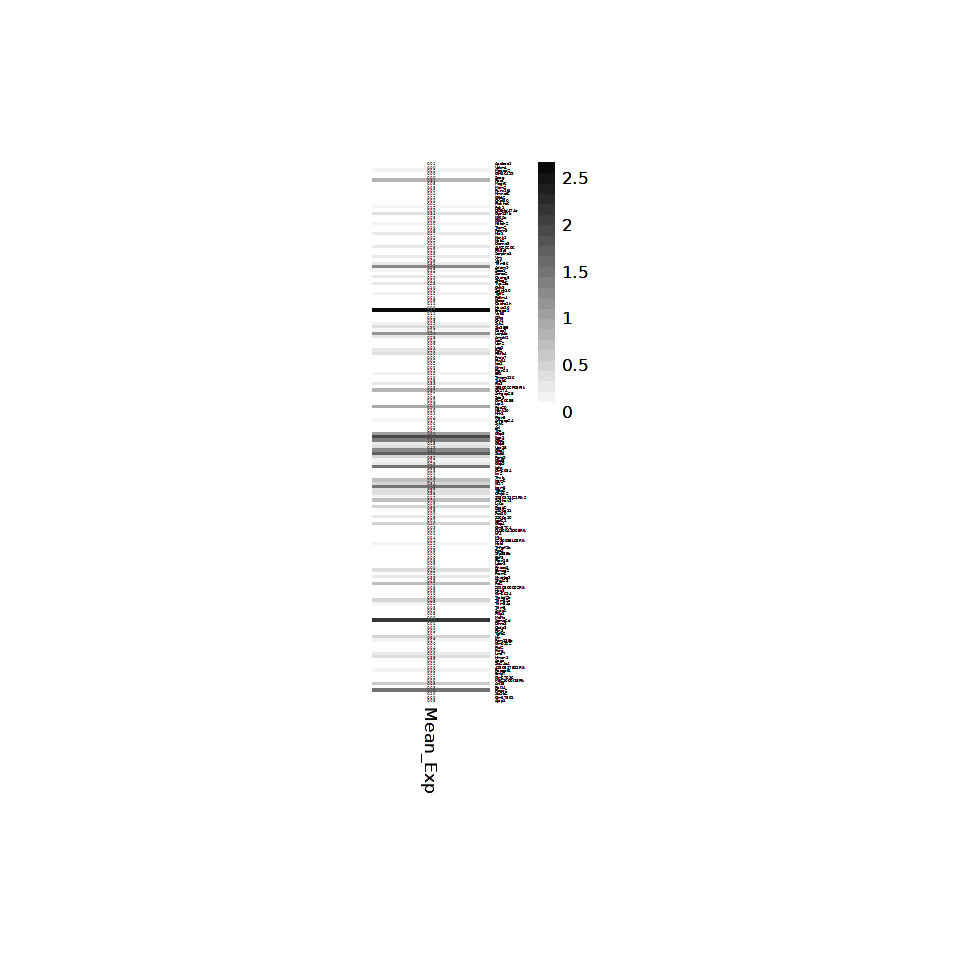

In [474]:
options(repr.plot.width=8, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [475]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_RNA_",cluster_choice,"_sep_mean.pdf"), width=7, height=plot_height)

png 
  2

In [476]:
tmp_sample_markers_RNA[rownames(tmp_sample_markers_RNA_sub),] <- tmp_sample_markers_RNA_sub

In [477]:
tmp_sample_markers_RNA_zscore <- t(apply(tmp_sample_markers_RNA[gene_list,], 1, scale))
colnames(tmp_sample_markers_RNA_zscore) <- paste0("zscore_", sample_names)
matrix <- tmp_sample_markers_RNA_zscore

In [478]:
is.nan.data.frame <- function(x)
do.call(cbind, lapply(x, is.na))

matrix[is.na.data.frame(matrix)] <- 0

In [479]:
paletteLength <- 100
myColor <- colorRampPalette(c("blue", "white", "red"))(paletteLength/2)
myBreaks <- c(seq(-max(abs(matrix)), max(abs(matrix)), length.out=floor(paletteLength/2)))
myColor[(paletteLength/4):((paletteLength/4)+1)] <- c("#FFFFFF", "#FFFFFF")

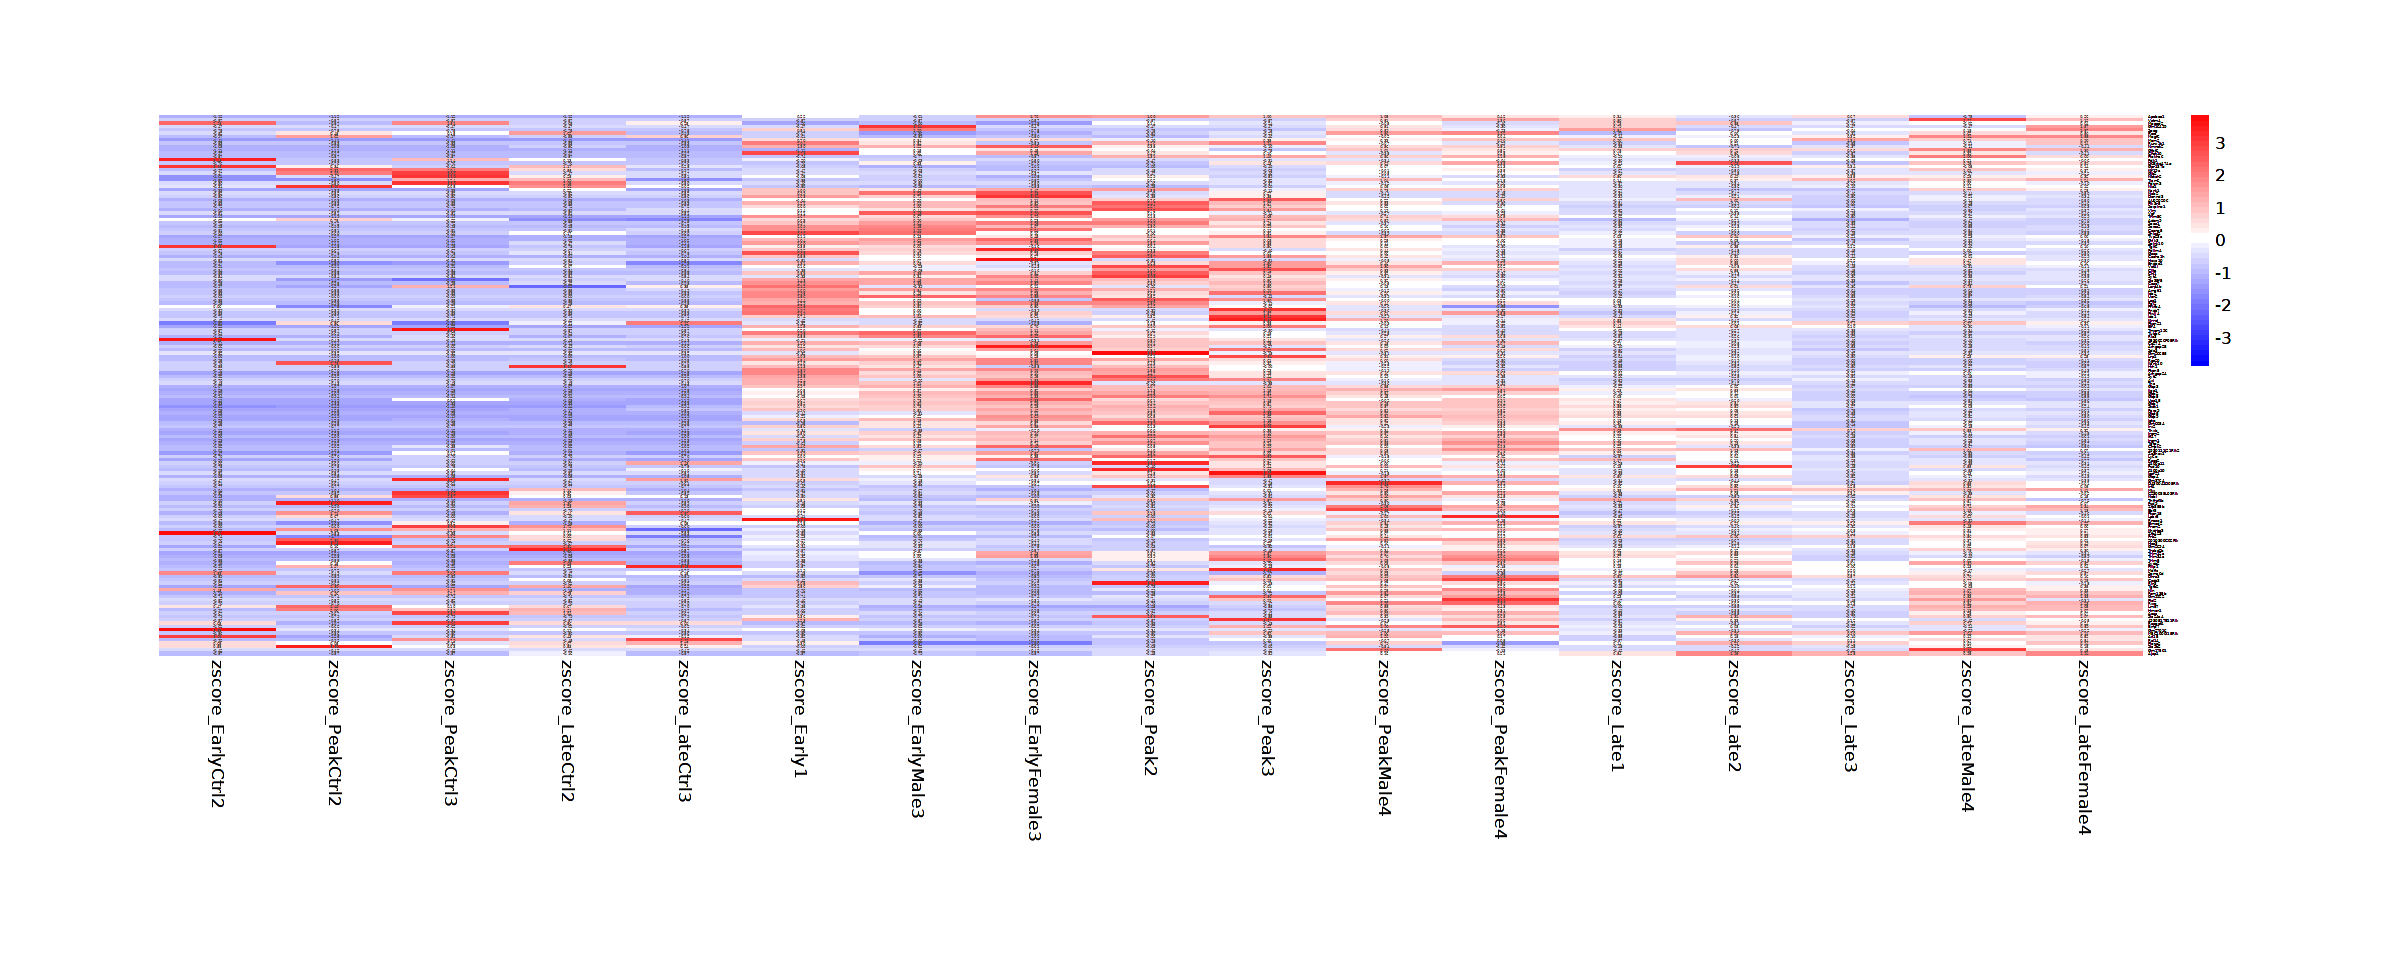

In [480]:
options(repr.plot.width=20, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [481]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_RNA_",cluster_choice,"_sep_zscore.pdf"), width=20, height=plot_height)

png 
  2

In [482]:
matrix <- tmp_sample_markers_GenePromAcc
matrix_sub <- tmp_sample_markers_GenePromAcc_sub

In [483]:
matrix_sub <- matrix_sub/do.call(pmax, matrix_sub)

In [484]:
is.nan.data.frame <- function(x)
do.call(cbind, lapply(x, is.nan))

matrix_sub[is.nan.data.frame(matrix_sub)] <- 0

In [485]:
matrix[rownames(matrix_sub),] <- matrix_sub
matrix <- matrix[gene_list,]

In [486]:
paletteLength <- 50
myColor <- colorRampPalette(c("#FFBCB5", "#432371"))(paletteLength/2)
myBreaks <- c(seq(0, max(matrix), length.out=floor(paletteLength/2)))

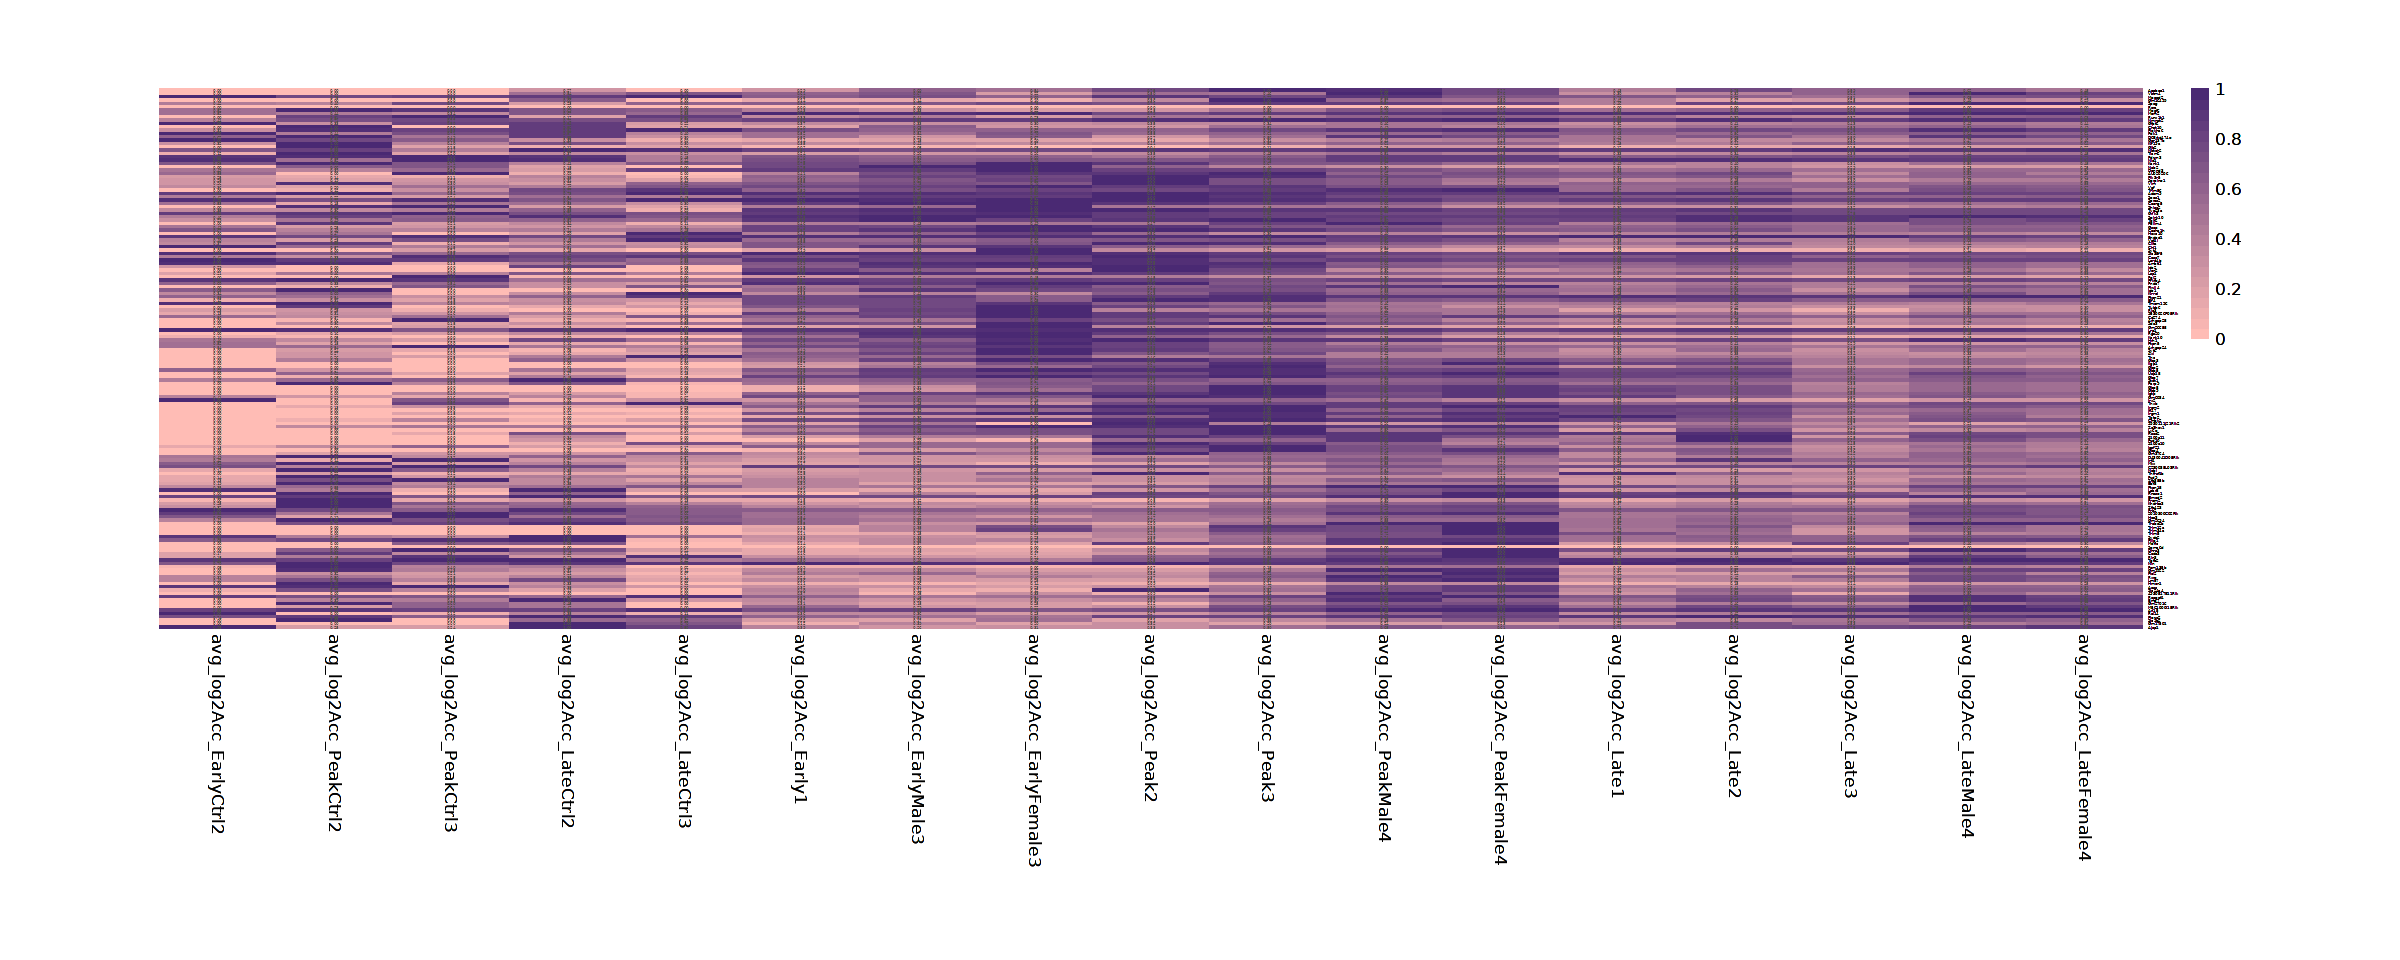

In [487]:
options(repr.plot.width=20, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [488]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_Acc_",cluster_choice,"_sep.pdf"), width=20, height=plot_height)

png 
  2

In [489]:
tmp_sample_markers_GenePromAcc_mean <- data.frame(matrix(0L, ncol=1, nrow=length(gene_list), dimnames=list(gene_list, "Mean_Acc")))

In [490]:
tmp_sample_markers_GenePromAcc_mean[rownames(tmp_sample_markers_GenePromAcc_sub),"Mean_Acc"] <- rowMeans(tmp_sample_markers_GenePromAcc_sub)

In [491]:
matrix <- tmp_sample_markers_GenePromAcc_mean

In [492]:
is.nan.data.frame <- function(x)
do.call(cbind, lapply(x, is.na))

matrix[is.na.data.frame(matrix)] <- 0

In [493]:
paletteLength <- 50
myColor <- colorRampPalette(c("white", "black"))(paletteLength/2)
myBreaks <- c(seq(0, max(matrix), length.out=floor(paletteLength/2)))

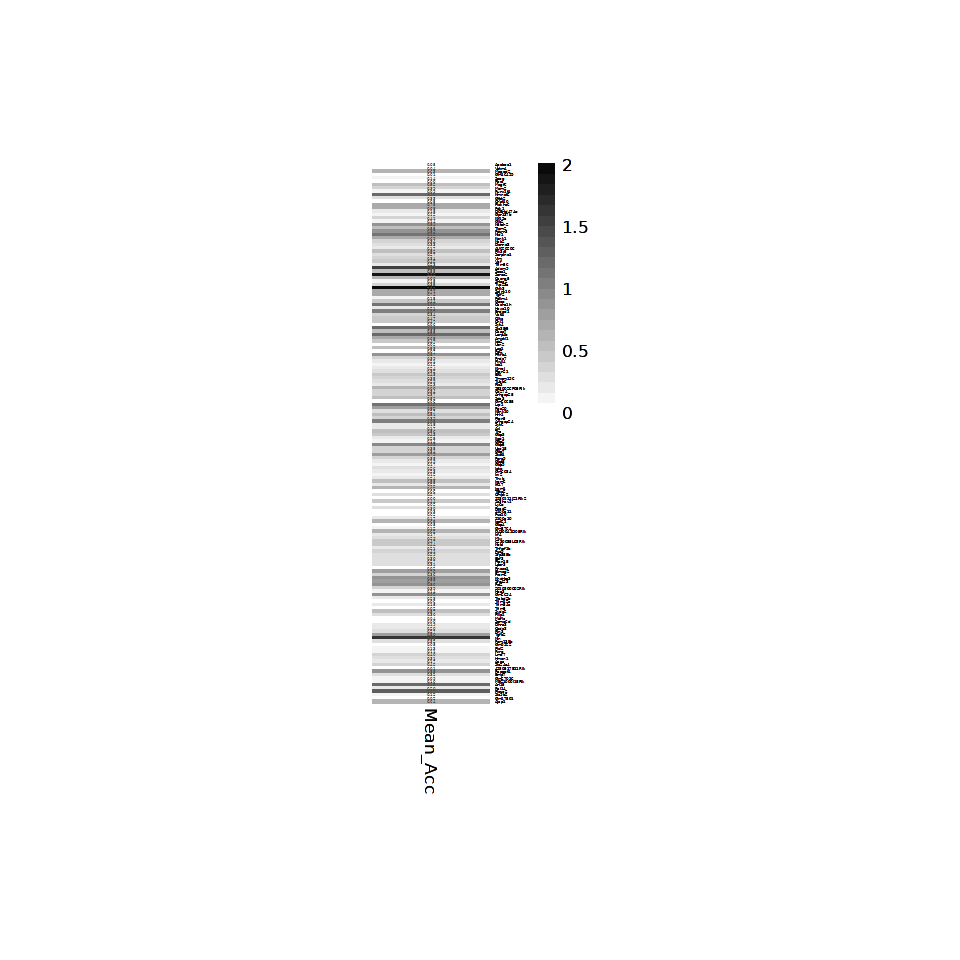

In [494]:
options(repr.plot.width=8, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [495]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_Acc",cluster_choice,"_sep_mean.pdf"), width=7, height=plot_height)

png 
  2

In [496]:
tmp_sample_markers_GenePromAcc[rownames(tmp_sample_markers_GenePromAcc_sub),] <- tmp_sample_markers_GenePromAcc_sub

In [497]:
tmp_sample_markers_GenePromAcc_zscore <- t(apply(tmp_sample_markers_GenePromAcc[gene_list,], 1, scale))
colnames(tmp_sample_markers_GenePromAcc_zscore) <- paste0("zscore_", sample_names)
matrix <- tmp_sample_markers_GenePromAcc_zscore

In [498]:
is.nan.data.frame <- function(x)
do.call(cbind, lapply(x, is.na))

matrix[is.na.data.frame(matrix)] <- 0

In [499]:
paletteLength <- 100
myColor <- colorRampPalette(c("blue", "white", "red"))(paletteLength/2)
myBreaks <- c(seq(-max(abs(matrix)), max(abs(matrix)), length.out=floor(paletteLength/2)))
myColor[(paletteLength/4):((paletteLength/4)+1)] <- c("#FFFFFF", "#FFFFFF")

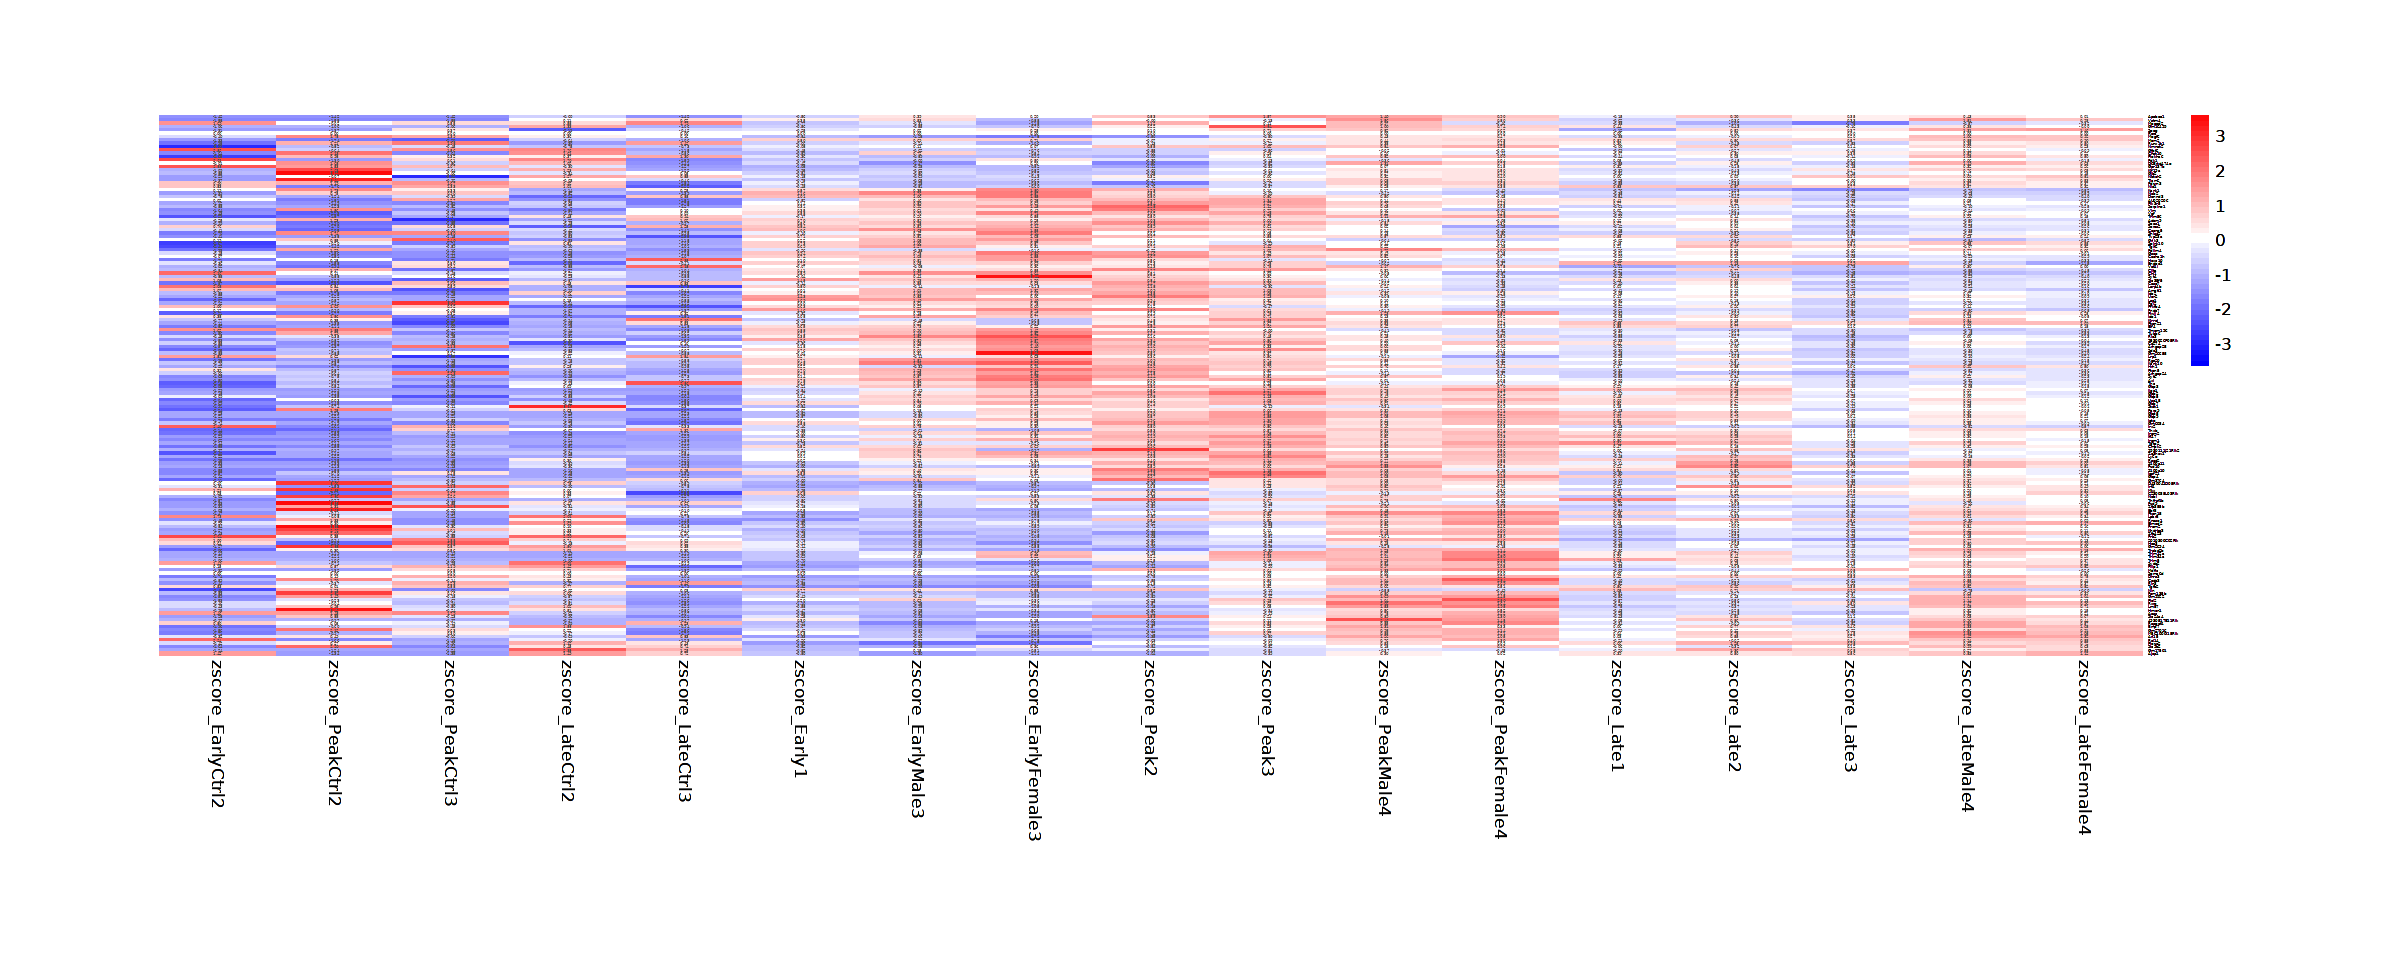

In [500]:
options(repr.plot.width=20, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [501]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_Acc_",cluster_choice,"_sep_zscore.pdf"), width=20, height=plot_height)

png 
  2

In [502]:
Idents(object = tmp) <- "orig.ident_merge"

In [503]:
sample_names <- levels(tmp$orig.ident_merge)

In [504]:
tmp_sample_markers_DORCs <- data.frame(matrix(0L, ncol=length(sample_names), nrow=length(gene_list), dimnames=list(gene_list, paste0("avg_DORCs_", sample_names))))

In [505]:
for (i in 1:length(colnames(tmp_sample_markers_DORCs))){
    tmp_sample_markers_DORCs[,i] <- as.vector(AverageExpression(subset(x = tmp, subset = orig.ident_merge == sample_names[i]), assays = "DORCs", features = gene_list, slot = "counts")[['DORCs']])
}

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.



In [506]:
tmp_sample_markers_RNA <- data.frame(matrix(0L, ncol=length(sample_names), nrow=length(gene_list), dimnames=list(gene_list, paste0("avg_log2Exp_", sample_names))))

In [507]:
gene_list_RNA <- gene_list[gene_list %in% rownames(tmp[['RNA']])]

In [508]:
genes0 <- names(rowSums(tmp[['RNA']]@counts[gene_list_RNA,])[rowSums(tmp[['RNA']]@counts[gene_list_RNA,]) == 0])

In [509]:
gene_list_RNA <- gene_list_RNA[!gene_list_RNA %in% genes0]

In [510]:
tmp_sample_markers_RNA_sub <- data.frame(matrix(0L, ncol=length(sample_names), nrow=length(gene_list_RNA), dimnames=list(gene_list_RNA, paste0("avg_log2Exp_", sample_names))))

In [511]:
for (i in 1:length(colnames(tmp_sample_markers_RNA_sub))){
    tmp_sample_markers_RNA_sub[,i] <- log2(as.vector(AverageExpression(subset(x = tmp, subset = orig.ident_merge == sample_names[i]), assays = "RNA", features = gene_list_RNA, slot = "data")[['RNA']])+1)
}

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.



In [512]:
tmp_sample_markers_GenePromAcc <- data.frame(matrix(0L, ncol=length(sample_names), nrow=length(gene_list), dimnames=list(gene_list, paste0("avg_log2Acc_", sample_names))))

In [513]:
gene_list_GenePromAcc <- gene_list[gene_list %in% rownames(tmp[['GenePromAcc']])]

In [514]:
genes0 <- names(rowSums(tmp[['GenePromAcc']]@counts[gene_list_GenePromAcc,])[rowSums(tmp[['GenePromAcc']]@counts[gene_list_GenePromAcc,]) == 0])

In [515]:
gene_list_GenePromAcc <- gene_list_GenePromAcc[!gene_list_GenePromAcc %in% genes0]

In [516]:
tmp_sample_markers_GenePromAcc_sub <- data.frame(matrix(0L, ncol=length(sample_names), nrow=length(gene_list_GenePromAcc), dimnames=list(gene_list_GenePromAcc, paste0("avg_log2Acc_", sample_names))))

In [517]:
for (i in 1:length(colnames(tmp_sample_markers_GenePromAcc_sub))){
    tmp_sample_markers_GenePromAcc_sub[,i] <- log2(as.vector(AverageExpression(subset(x = tmp, subset = orig.ident_merge == sample_names[i]), assays = "GenePromAcc", features = gene_list_GenePromAcc, slot = "data")[['GenePromAcc']])+1)
}

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.



In [518]:
saveRDS(tmp_sample_markers_DORCs, paste0(OS_path_outputs, "Dynamics_DORCs_Enhancers_",cluster_choice,".rds"))
saveRDS(tmp_sample_markers_RNA_sub, paste0(OS_path_outputs, "Dynamics_DORCs_RNA_",cluster_choice,".rds"))
saveRDS(tmp_sample_markers_GenePromAcc_sub, paste0(OS_path_outputs, "Dynamics_DORCs_Acc_",cluster_choice,".rds"))

In [519]:
write.csv(tmp_sample_markers_DORCs, paste0(OS_path_outputs, "Dynamics_DORCs_Enhancers_",cluster_choice,".csv"))
write.csv(tmp_sample_markers_RNA_sub, paste0(OS_path_outputs, "Dynamics_DORCs_RNA_",cluster_choice,".csv"))
write.csv(tmp_sample_markers_GenePromAcc_sub, paste0(OS_path_outputs, "Dynamics_DORCs_Acc_",cluster_choice,".csv"))

In [520]:
matrix <- tmp_sample_markers_DORCs/do.call(pmax, tmp_sample_markers_DORCs)

In [308]:
paletteLength <- 50
myColor <- colorRampPalette(c("#C7D2CA", "#024F2A"))(paletteLength/2)
myBreaks <- c(seq(0, max(matrix), length.out=floor(paletteLength/2)))

In [309]:
plot_height <- ifelse(as.integer(nrow(matrix)/20)<=5, 5, as.integer(nrow(matrix)/20))

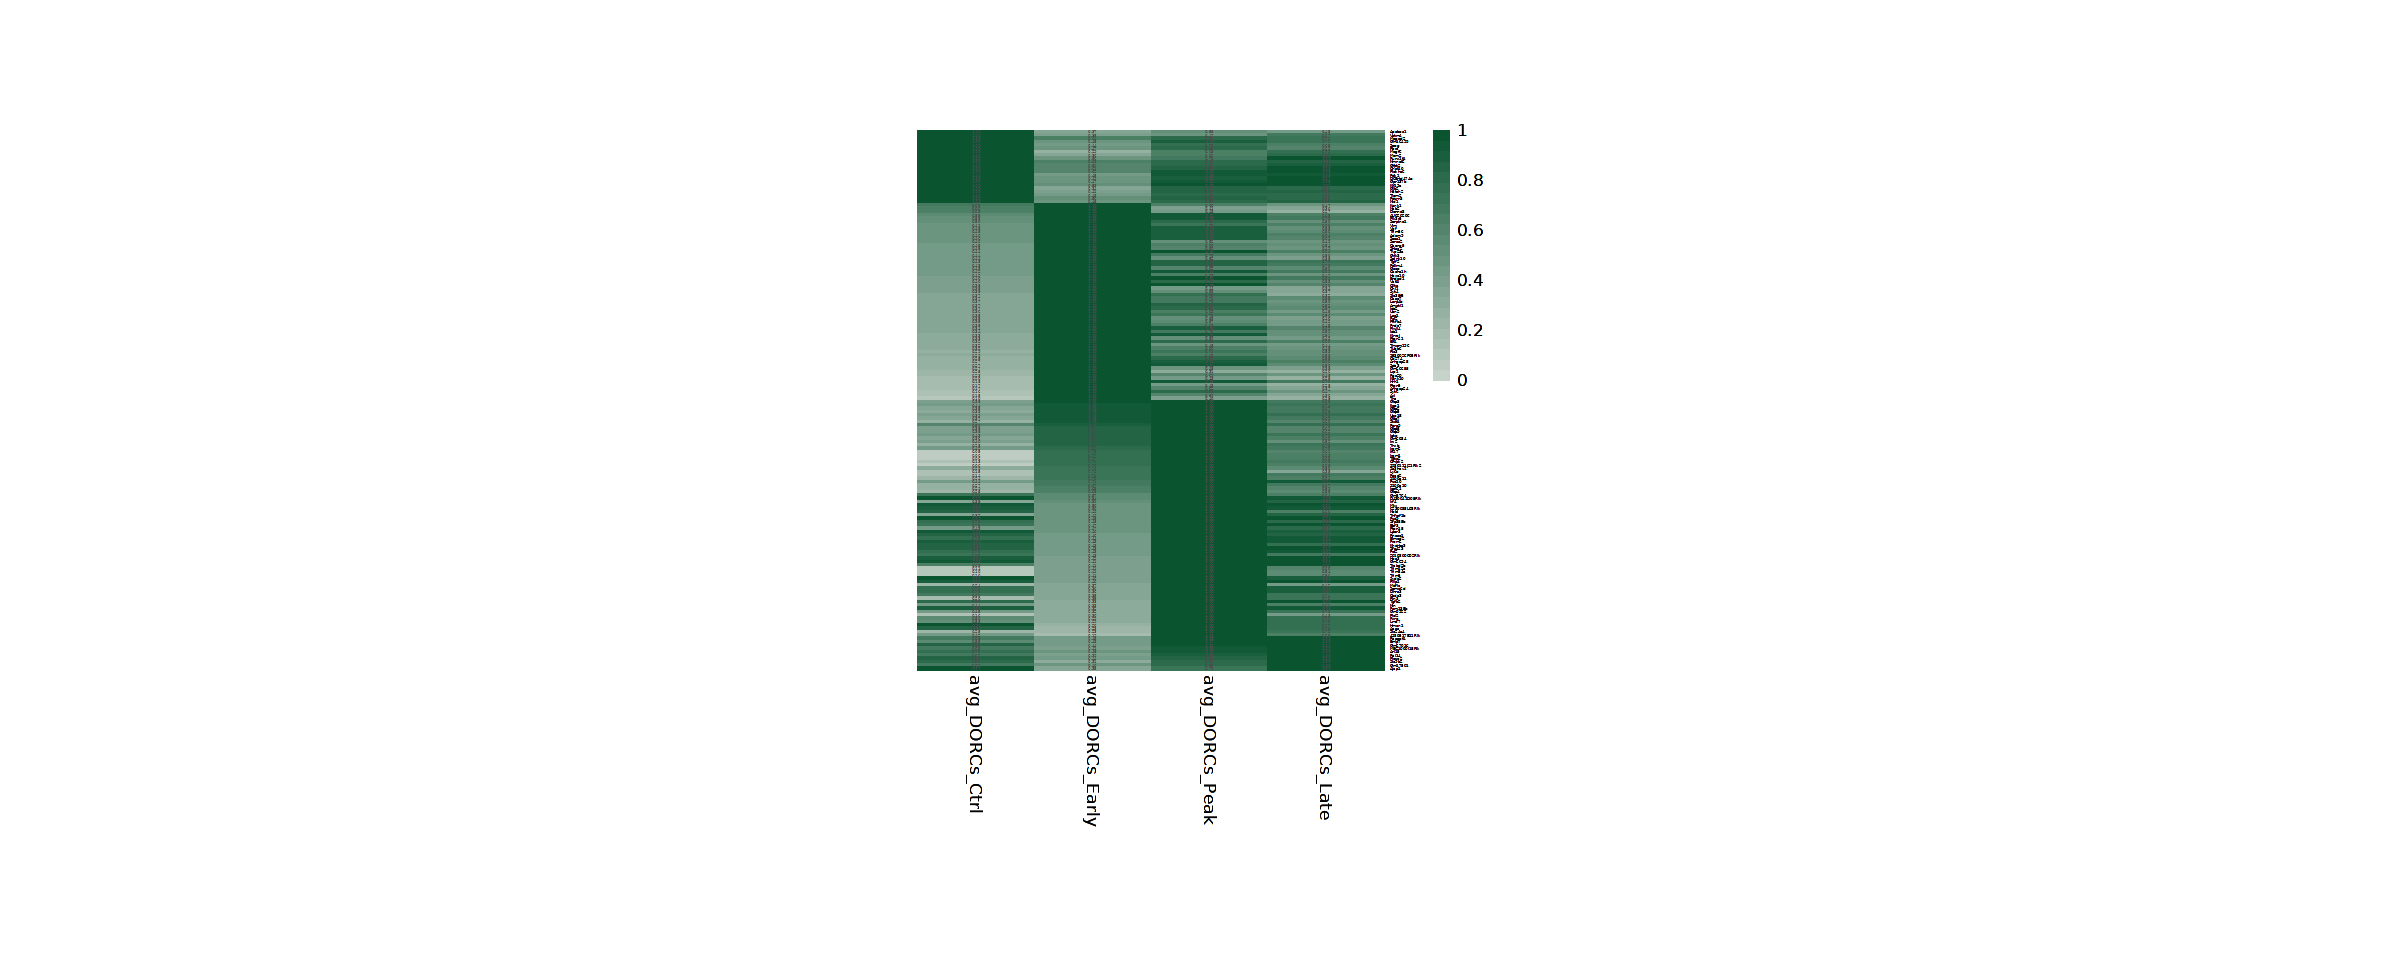

In [310]:
options(repr.plot.width=20, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [311]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_Enhancers_",cluster_choice,".pdf"), width=20, height=plot_height)

png 
  2

In [312]:
tmp_sample_markers_DORCs_mean <- data.frame(matrix(0L, ncol=1, nrow=length(gene_list), dimnames=list(gene_list, "Mean_DORCs")))

In [313]:
tmp_sample_markers_DORCs_mean[rownames(tmp_sample_markers_DORCs),"Mean_DORCs"] <- rowMeans(tmp_sample_markers_DORCs)

In [314]:
matrix <- tmp_sample_markers_DORCs_mean

In [315]:
paletteLength <- 50
myColor <- colorRampPalette(c("white", "black"))(paletteLength/2)
myBreaks <- c(seq(0, max(matrix), length.out=floor(paletteLength/2)))

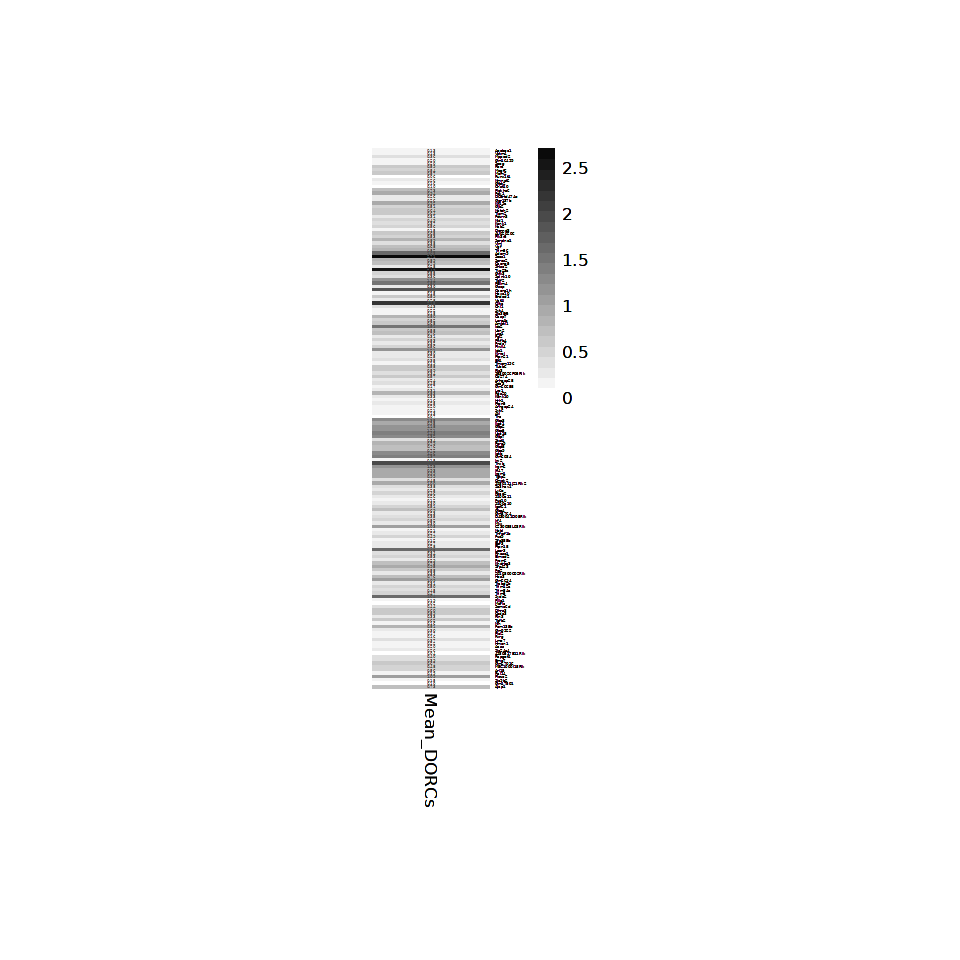

In [316]:
options(repr.plot.width=8, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [317]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_Enhancers_",cluster_choice,"_mean.pdf"), width=7, height=plot_height)

png 
  2

In [318]:
tmp_sample_markers_zscore <- t(apply(tmp_sample_markers_DORCs[gene_list,], 1, scale))
colnames(tmp_sample_markers_zscore) <- paste0("zscore_", sample_names)
matrix <- tmp_sample_markers_zscore

In [319]:
paletteLength <- 100
myColor <- colorRampPalette(c("blue", "white", "red"))(paletteLength/2)
myBreaks <- c(seq(-max(abs(matrix)), max(abs(matrix)), length.out=floor(paletteLength/2)))
myColor[(paletteLength/4):((paletteLength/4)+1)] <- c("#FFFFFF", "#FFFFFF")

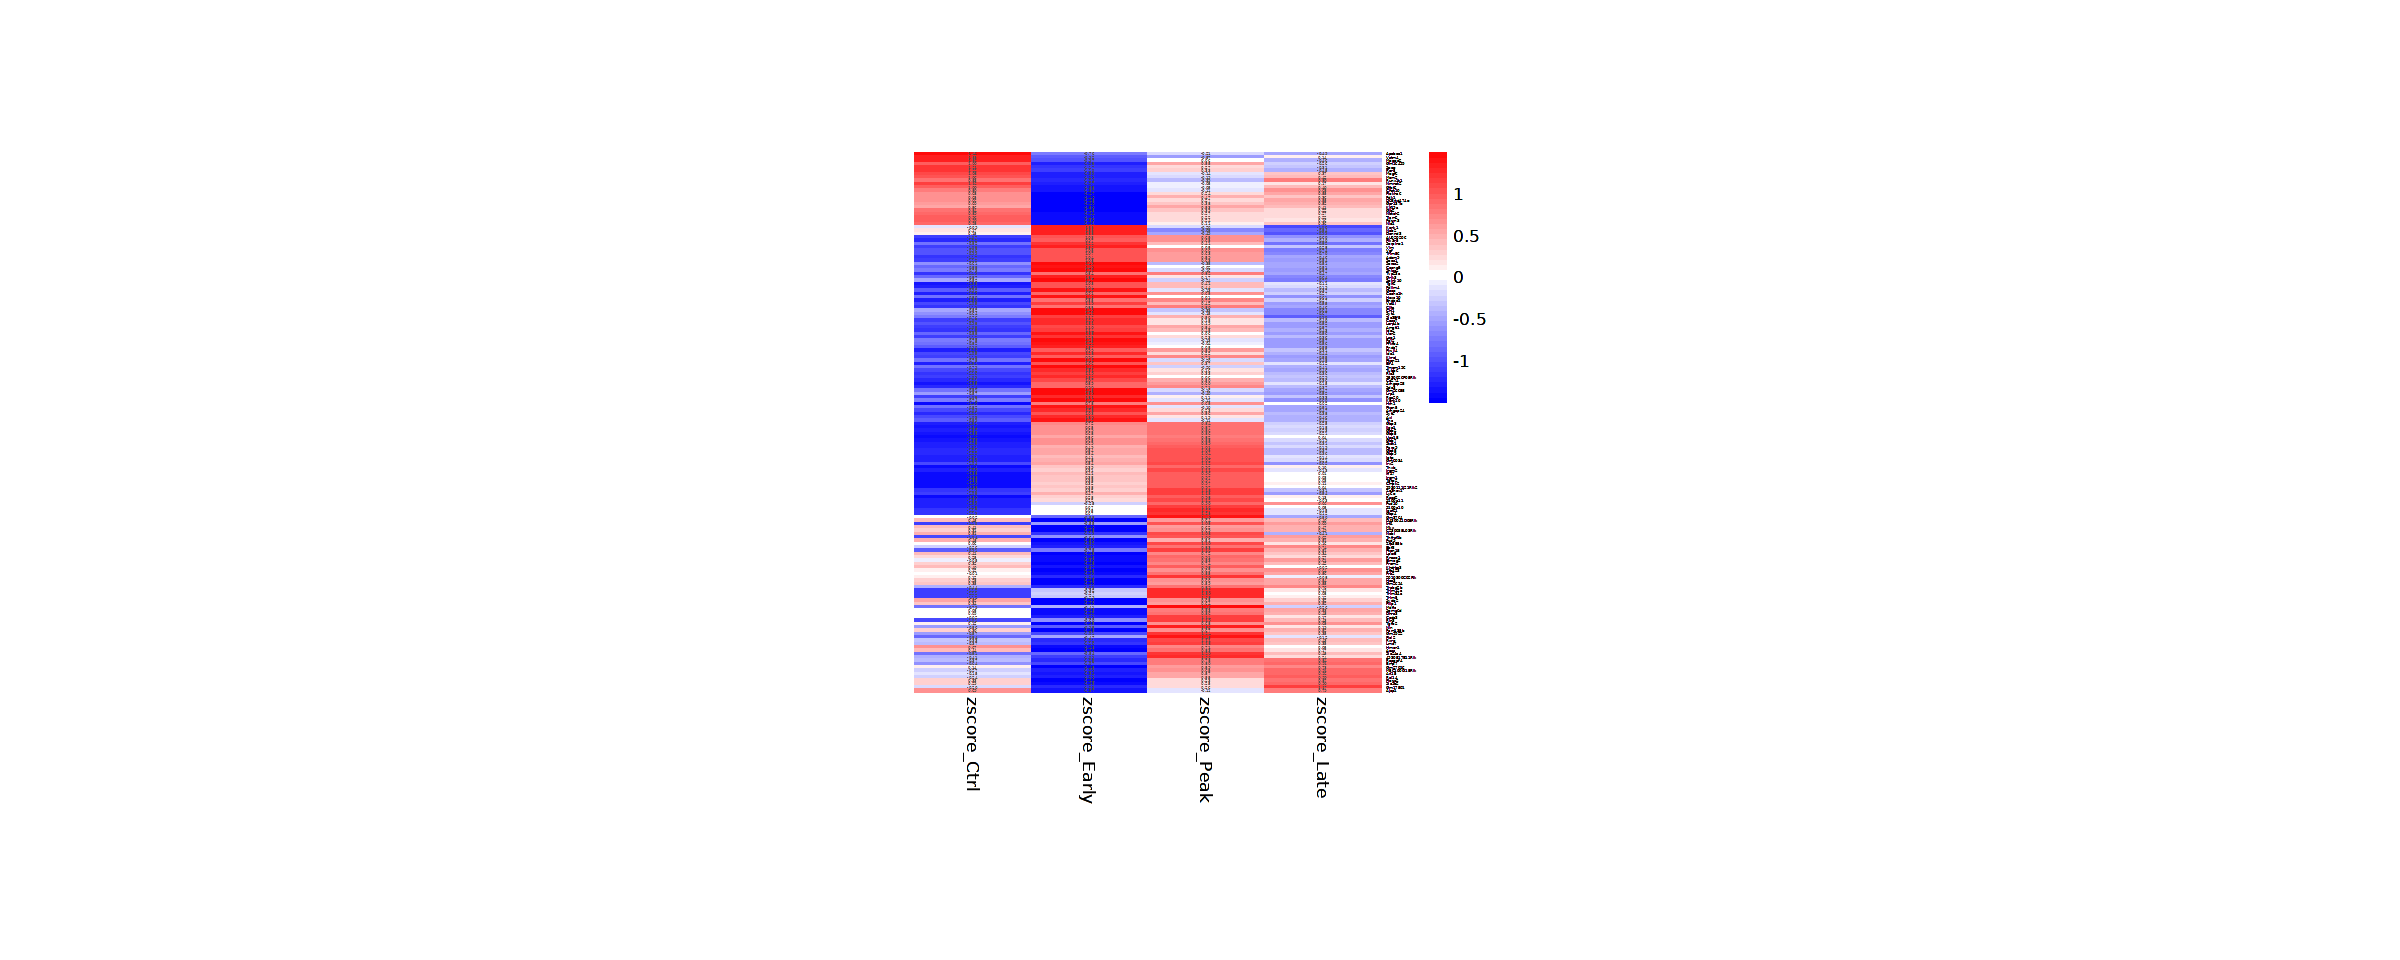

In [320]:
options(repr.plot.width=20, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [321]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_Enhancers_",cluster_choice,"_zscore.pdf"), width=20, height=plot_height)

png 
  2

In [322]:
matrix <- tmp_sample_markers_RNA
matrix_sub <- tmp_sample_markers_RNA_sub

In [323]:
matrix_sub <- matrix_sub/do.call(pmax, matrix_sub)

In [324]:
is.nan.data.frame <- function(x)
do.call(cbind, lapply(x, is.nan))

matrix_sub[is.nan.data.frame(matrix_sub)] <- 0

In [325]:
matrix[rownames(matrix_sub),] <- matrix_sub
matrix <- matrix[gene_list,]

In [326]:
paletteLength <- 50
myColor <- colorRampPalette(c("#FFFFB3", "#5E3719"))(paletteLength/2)
myBreaks <- c(seq(0, max(matrix), length.out=floor(paletteLength/2)))

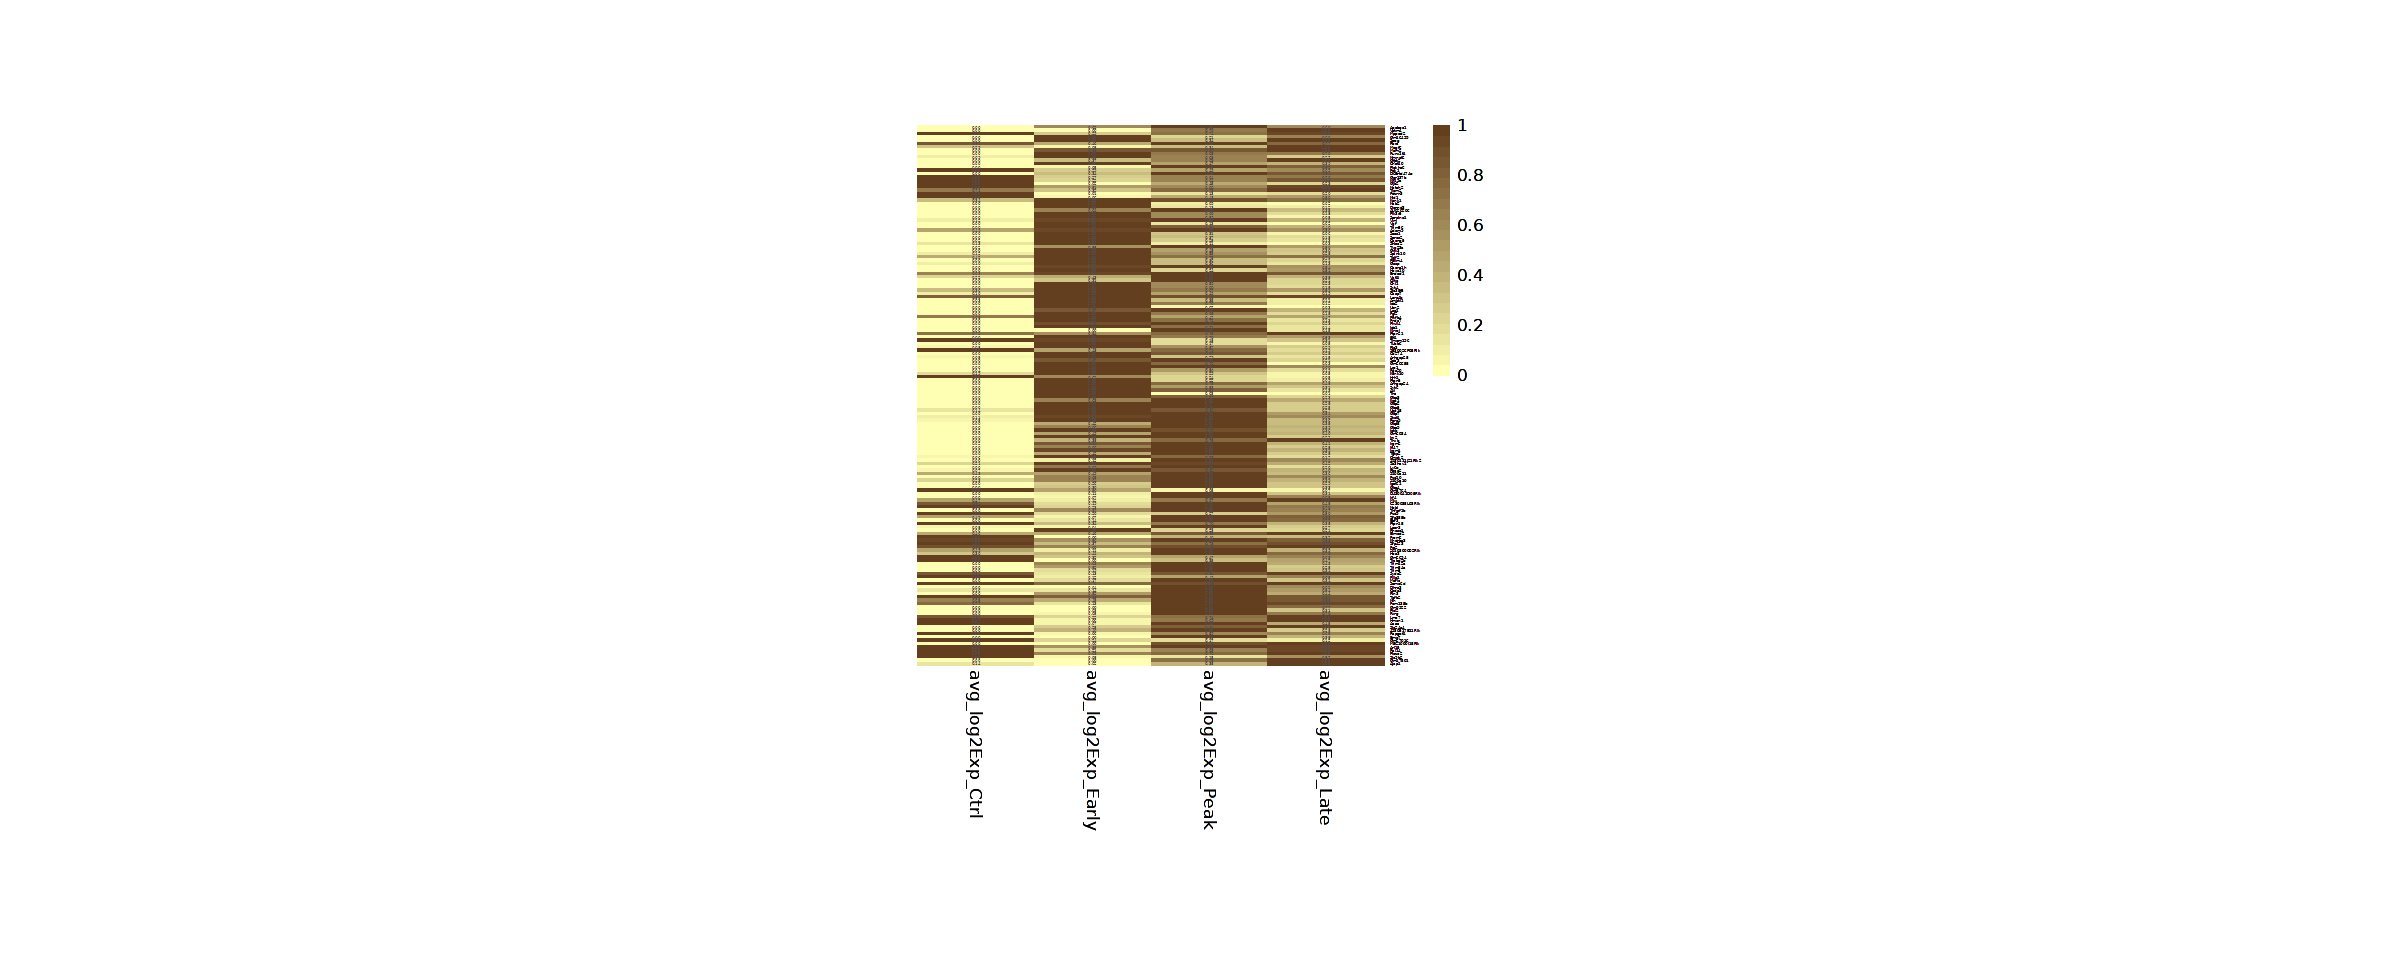

In [327]:
options(repr.plot.width=20, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [328]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_RNA_",cluster_choice,".pdf"), width=20, height=plot_height)

png 
  2

In [329]:
tmp_sample_markers_RNA_mean <- data.frame(matrix(0L, ncol=1, nrow=length(gene_list), dimnames=list(gene_list, "Mean_Exp")))

In [330]:
tmp_sample_markers_RNA_mean[rownames(tmp_sample_markers_RNA_sub),"Mean_Exp"] <- rowMeans(tmp_sample_markers_RNA_sub)

In [331]:
matrix <- tmp_sample_markers_RNA_mean

In [332]:
is.nan.data.frame <- function(x)
do.call(cbind, lapply(x, is.na))

matrix[is.na.data.frame(matrix)] <- 0

In [333]:
paletteLength <- 50
myColor <- colorRampPalette(c("white", "black"))(paletteLength/2)
myBreaks <- c(seq(0, max(matrix), length.out=floor(paletteLength/2)))

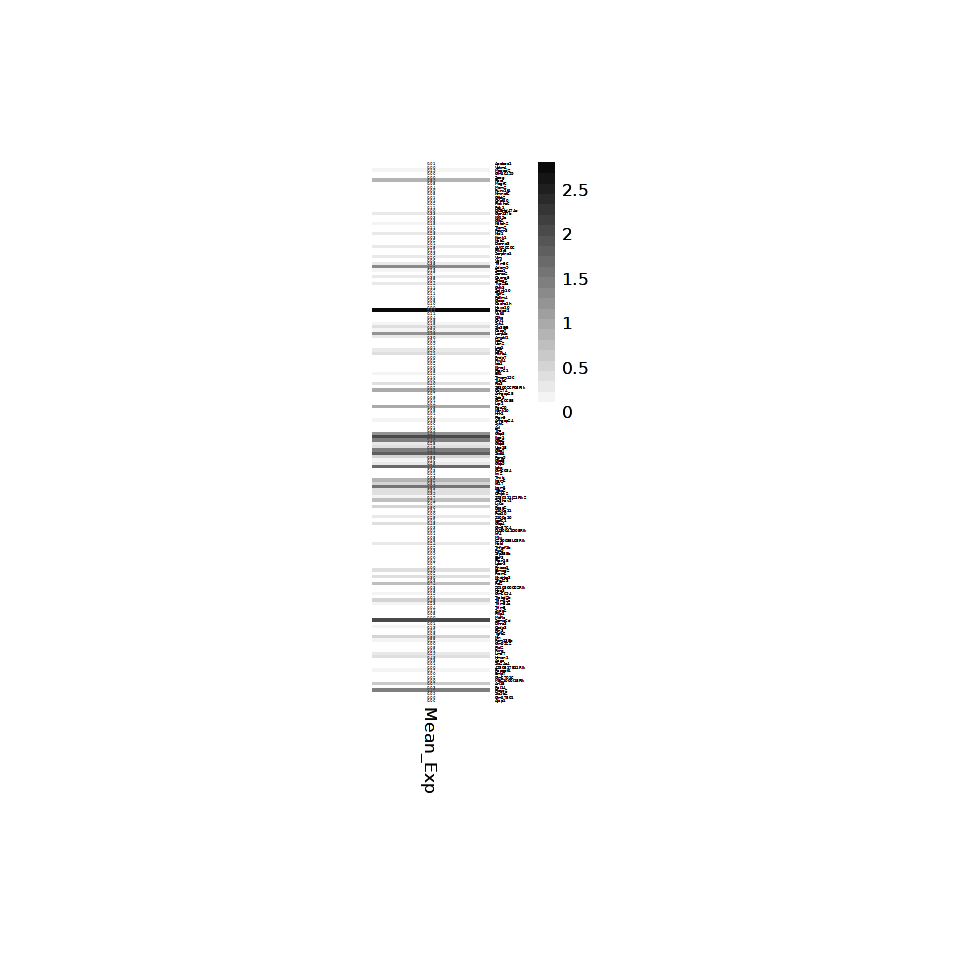

In [334]:
options(repr.plot.width=8, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [335]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_RNA_",cluster_choice,"_mean.pdf"), width=7, height=plot_height)

png 
  2

In [336]:
tmp_sample_markers_RNA[rownames(tmp_sample_markers_RNA_sub),] <- tmp_sample_markers_RNA_sub

In [337]:
tmp_sample_markers_RNA_zscore <- t(apply(tmp_sample_markers_RNA[gene_list,], 1, scale))
colnames(tmp_sample_markers_RNA_zscore) <- paste0("zscore_", sample_names)
matrix <- tmp_sample_markers_RNA_zscore

In [338]:
is.nan.data.frame <- function(x)
do.call(cbind, lapply(x, is.na))

matrix[is.na.data.frame(matrix)] <- 0

In [339]:
paletteLength <- 100
myColor <- colorRampPalette(c("blue", "white", "red"))(paletteLength/2)
myBreaks <- c(seq(-max(abs(matrix)), max(abs(matrix)), length.out=floor(paletteLength/2)))
myColor[(paletteLength/4):((paletteLength/4)+1)] <- c("#FFFFFF", "#FFFFFF")

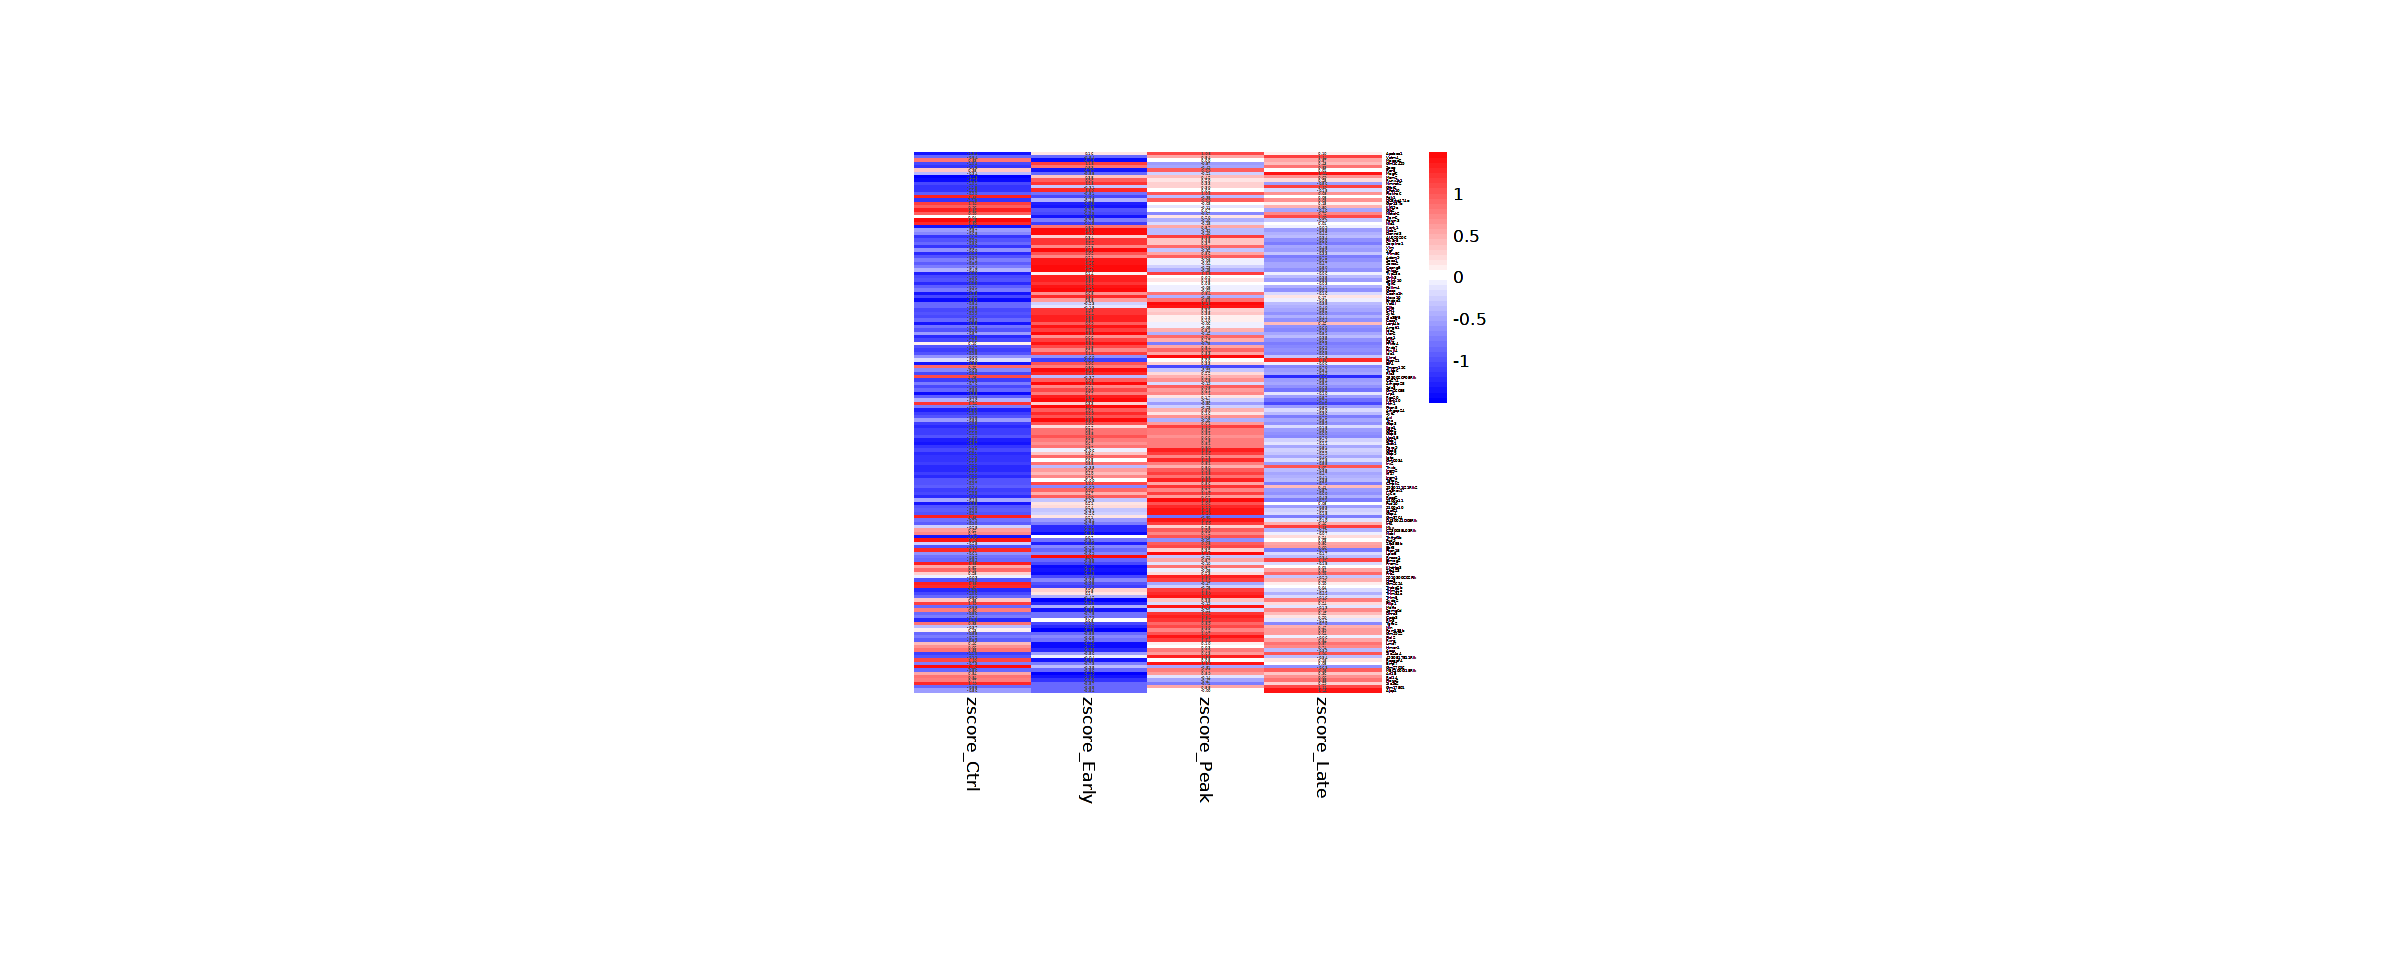

In [340]:
options(repr.plot.width=20, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [341]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_RNA_",cluster_choice,"_zscore.pdf"), width=20, height=plot_height)

png 
  2

In [342]:
matrix <- tmp_sample_markers_GenePromAcc
matrix_sub <- tmp_sample_markers_GenePromAcc_sub

In [343]:
matrix_sub <- matrix_sub/do.call(pmax, matrix_sub)

In [344]:
is.nan.data.frame <- function(x)
do.call(cbind, lapply(x, is.nan))

matrix_sub[is.nan.data.frame(matrix_sub)] <- 0

In [345]:
matrix[rownames(matrix_sub),] <- matrix_sub
matrix <- matrix[gene_list,]

In [346]:
paletteLength <- 50
myColor <- colorRampPalette(c("#FFBCB5", "#432371"))(paletteLength/2)
myBreaks <- c(seq(0, max(matrix), length.out=floor(paletteLength/2)))

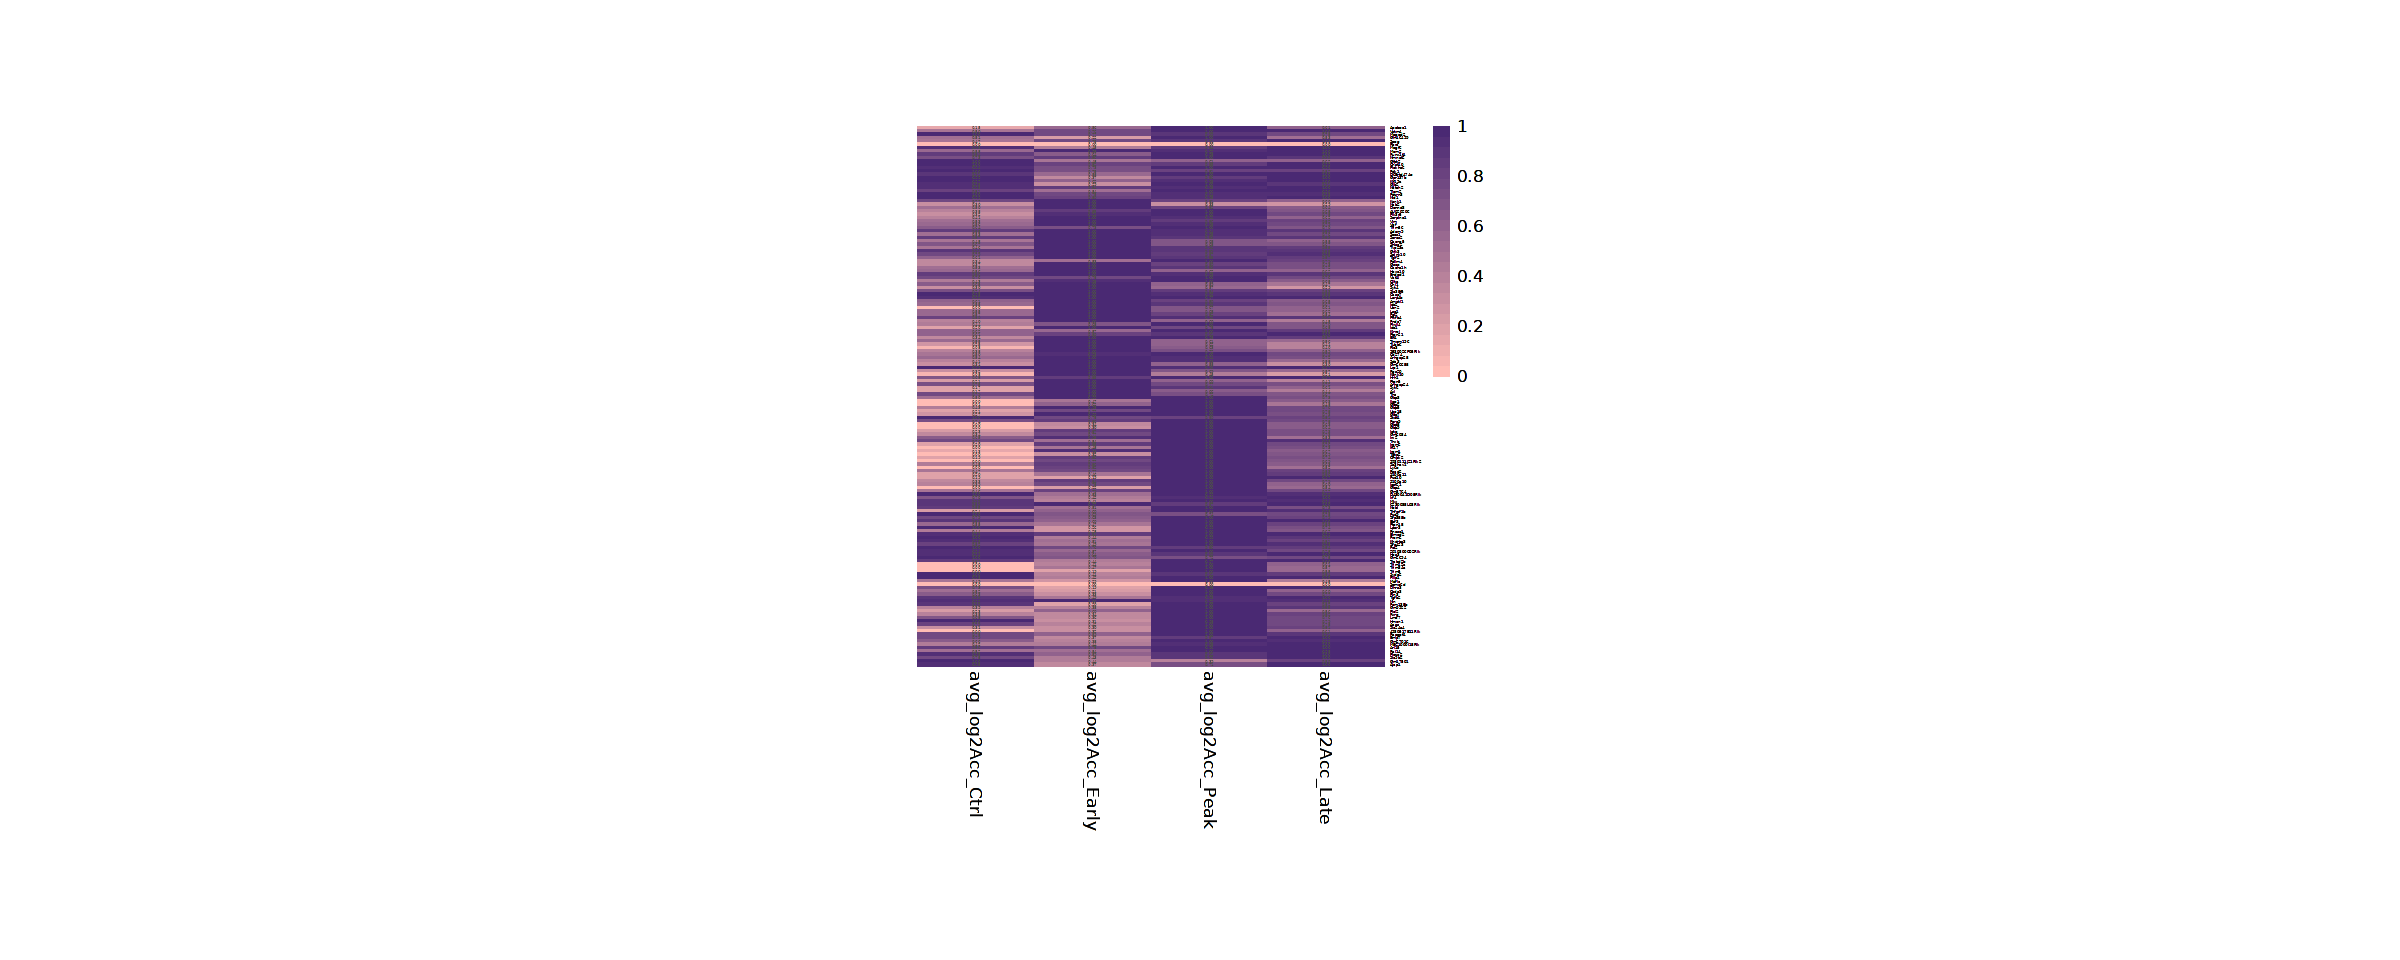

In [347]:
options(repr.plot.width=20, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [348]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_Acc_",cluster_choice,".pdf"), width=20, height=plot_height)

png 
  2

In [349]:
tmp_sample_markers_GenePromAcc_mean <- data.frame(matrix(0L, ncol=1, nrow=length(gene_list), dimnames=list(gene_list, "Mean_GenePromAcc")))

In [350]:
tmp_sample_markers_GenePromAcc_mean[rownames(tmp_sample_markers_GenePromAcc_sub),"Mean_GenePromAcc"] <- rowMeans(tmp_sample_markers_GenePromAcc_sub)

In [351]:
matrix <- tmp_sample_markers_GenePromAcc_mean

In [352]:
is.nan.data.frame <- function(x)
do.call(cbind, lapply(x, is.na))

matrix[is.na.data.frame(matrix)] <- 0

In [353]:
paletteLength <- 50
myColor <- colorRampPalette(c("white", "black"))(paletteLength/2)
myBreaks <- c(seq(0, max(matrix), length.out=floor(paletteLength/2)))

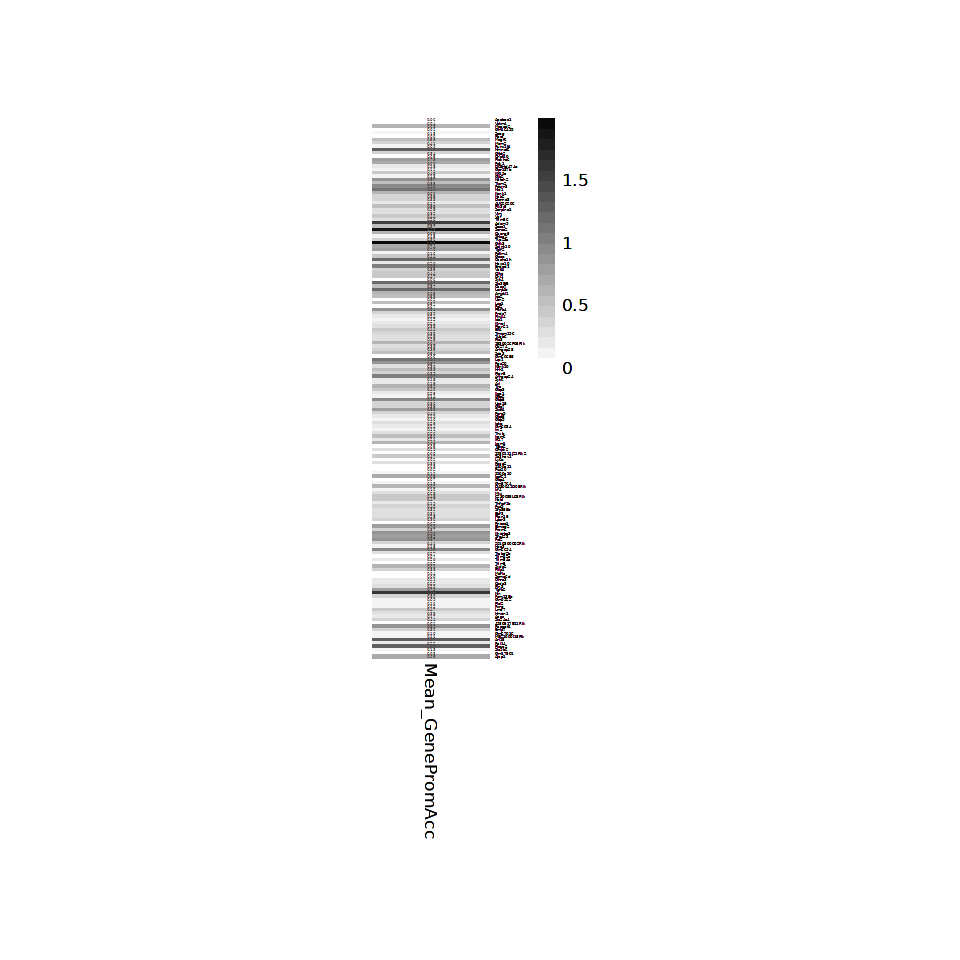

In [354]:
options(repr.plot.width=8, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [355]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_Acc_",cluster_choice,"_mean.pdf"), width=7, height=plot_height)

png 
  2

In [356]:
tmp_sample_markers_GenePromAcc[rownames(tmp_sample_markers_GenePromAcc_sub),] <- tmp_sample_markers_GenePromAcc_sub

In [357]:
tmp_sample_markers_GenePromAcc_zscore <- t(apply(tmp_sample_markers_GenePromAcc[gene_list,], 1, scale))
colnames(tmp_sample_markers_GenePromAcc_zscore) <- paste0("zscore_", sample_names)
matrix <- tmp_sample_markers_GenePromAcc_zscore

In [358]:
is.nan.data.frame <- function(x)
do.call(cbind, lapply(x, is.na))

matrix[is.na.data.frame(matrix)] <- 0

In [359]:
paletteLength <- 100
myColor <- colorRampPalette(c("blue", "white", "red"))(paletteLength/2)
myBreaks <- c(seq(-max(abs(matrix)), max(abs(matrix)), length.out=floor(paletteLength/2)))
myColor[(paletteLength/4):((paletteLength/4)+1)] <- c("#FFFFFF", "#FFFFFF")

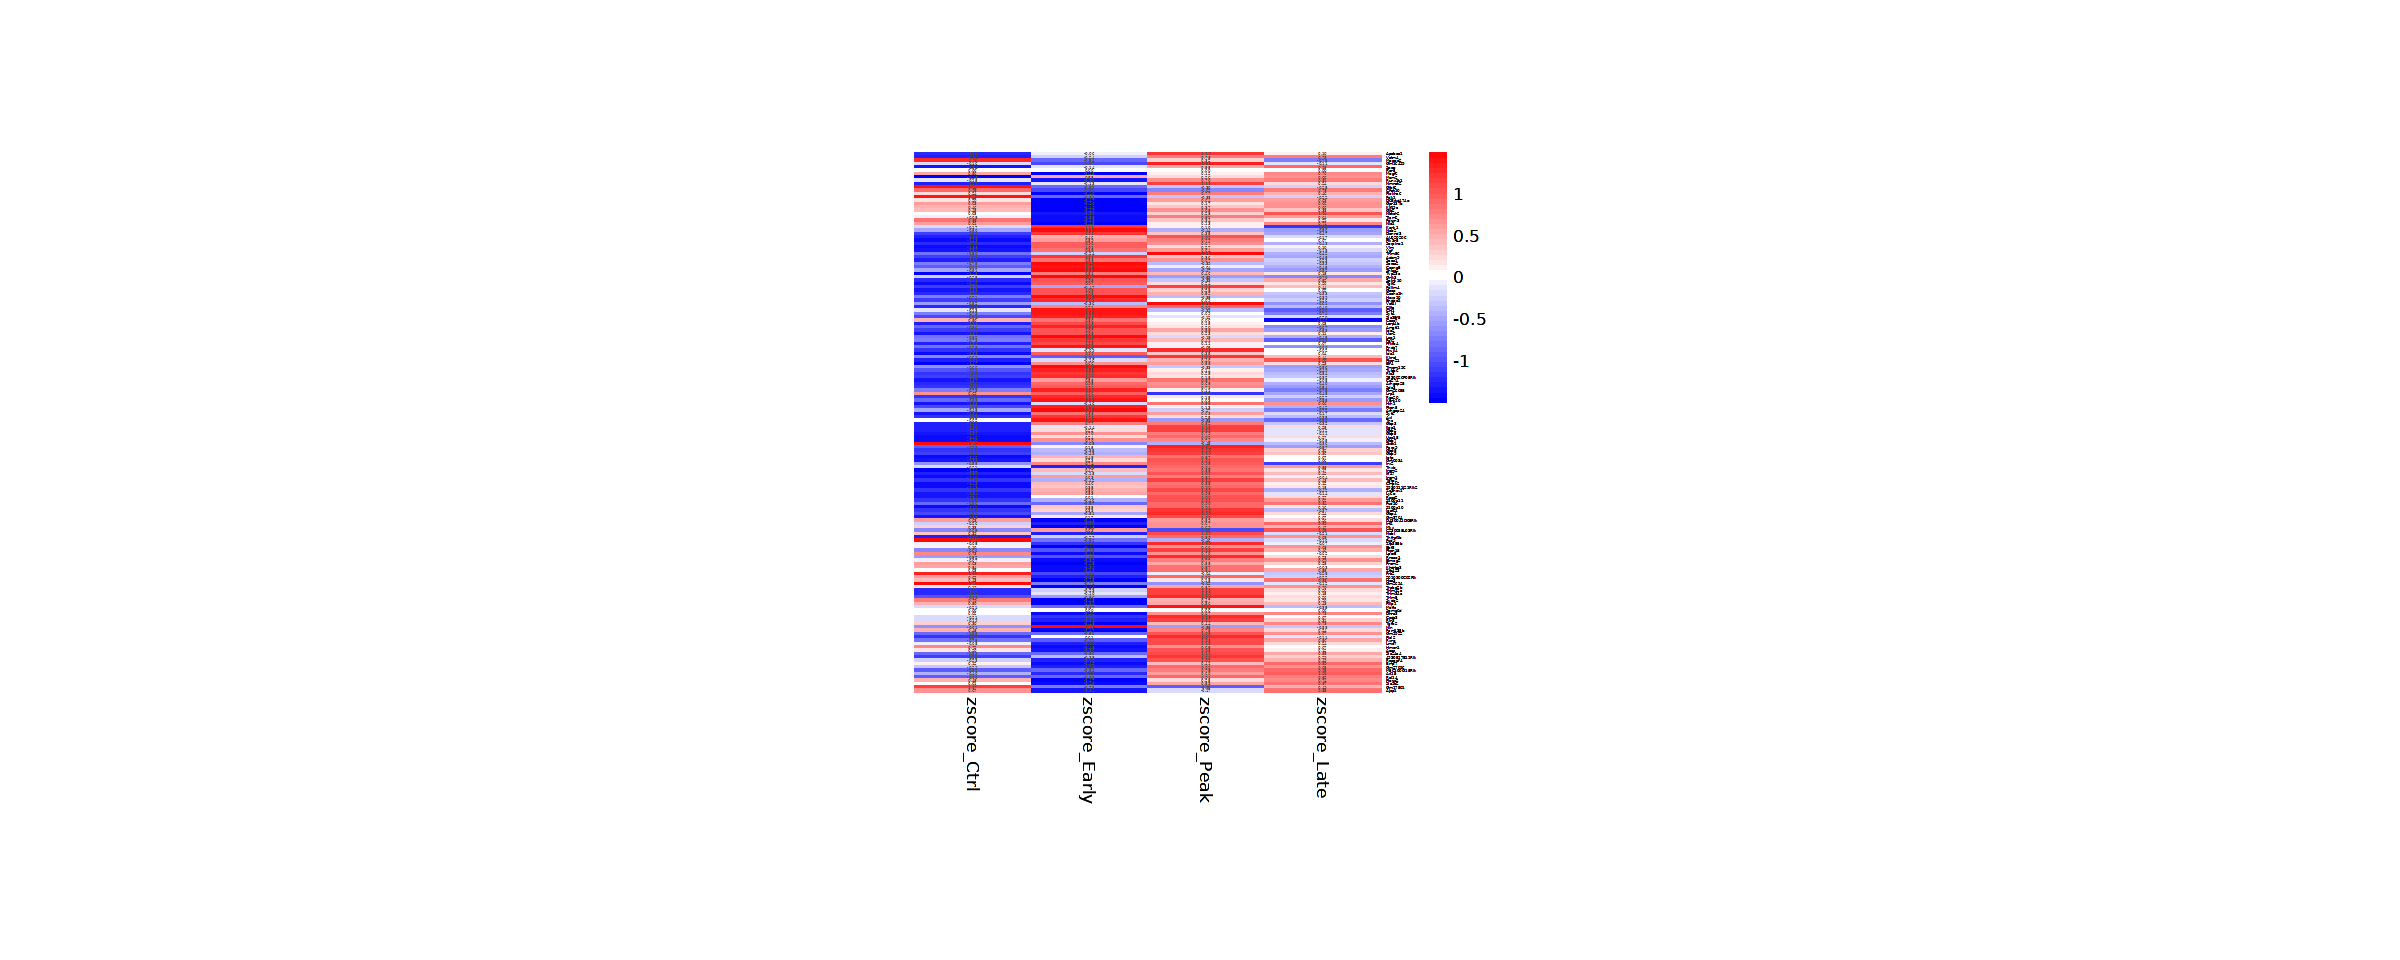

In [360]:
options(repr.plot.width=20, repr.plot.height=plot_height)
ph <- pheatmap(matrix, cellheight = 2, cellwidth = 70, fontsize_number = 2, fontsize_row=2, display_numbers = T, color=myColor, breaks=myBreaks, cluster_cols=FALSE, cluster_rows=FALSE)
ph

In [361]:
save_pheatmap_pdf(ph, paste0(OS_path_outputs, "Dynamics_DORCs_Acc_",cluster_choice,"_zscore.pdf"), width=20, height=plot_height)

png 
  2

##### 3.1.1.2 Module dynamics

In [362]:
dynamics_genes <- c("Apobec1","Vstm4","Mpped2","Gm16499","Speg","Rora","Megf6","Mcm2","Runx1t1","Nmnat2","Gfpt2","Chst10","Plekha6","Pdk1","D6Ertd474e","Gpr137b","Kif19a","Gjb2","Notch2","Tiam2","Pdzrn3","Nid1","Kank1","Nab2","Dennd3","AU020206","Pik3r5","Serpine1","Vim","Vgf","Trim56","Adam9","Socs1","Sorcs2","Cacng5","Shisa2","Tvp23a","Grik3","Spink10","Tgif2","Pdlim4","Gsap","Cacna1h","Hoxc10","Endod1","Vat1l","Ciita","Chl1","Syt4","Slc35f5","Casp7","Larp4b","Amotl1","Ido2","Ucn2","Lsp1","Fgl2","Pfkfb4","Fndc7","Piwil4","Ido1","Kirrel","Ptpn21","Elf4","Tmem196","Tubb6","Ric3","9530026P05Rik","Cd274","Arhgap28","Sdc3","Gm26658","Lrp1","Rgs20","Kcnk10","Hrh1","Ptpn5","Arhgap24","Syt6","Axl","Tnc","Gbp3","Iigp1","Gbp2","Gbp5","Usp18","Gbp7","Stat1","Parp9","Gbp8","Gbp9","Igtp","Gm6034","Irx2","Tnxb","Irgm2","Ifi47","Irgm1","Tgtp2","Cmpk2","9930111J21Rik2","Zc3hav1","Ly6e","Rsad2","S100a11","Fzd10","S100a10","Igsf21","Gbp4","Gm3764","D430041D05Rik","Irf4","Mkx","C230038L03Rik","Nebl","Tnfrsf1b","Fzd9","Zfp385b","Ebf3","Ptpn18","Lpar3","Rnase1","Elmod2","Frem2","Khdrbs3","Zfp423","Frs2","2010300C02Rik","Hes3","Gm2694","Trabd2b","Trim12a","Trim34a","Trim5","Syde2","Filip1","Mdfic","Sema6d","Dhrs3","Ccdc3","Rin3","Tgfb2","Nln","Fam135b","Gm9922","Plcl2","Rxrg","Lmo7","Hmcn1","Aass","Slc24a4","4930517E11Rik","Rapgef4","Bmp7","Gm27016","M5C1000I18Rik","Arl15","Rai14","Piezo2","Slc9b2","Gm17501","Ajap1")

In [363]:
gene_list <- dynamics_genes

In [364]:
Idents(object = tmp) <- "orig.ident_merge"

In [365]:
sample_names <- levels(tmp$orig.ident_merge)

In [366]:
tmp_sample_markers_DORCs <- data.frame(matrix(0L, ncol=length(sample_names), nrow=length(gene_list), dimnames=list(gene_list, paste0("avg_DORCs_", sample_names))))

In [367]:
for (i in 1:length(colnames(tmp_sample_markers_DORCs))){
    tmp_sample_markers_DORCs[,i] <- as.vector(AverageExpression(subset(x = tmp, subset = orig.ident_merge == sample_names[i]), assays = "DORCs", features = gene_list, slot = "counts")[['DORCs']])
}

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.



In [368]:
tmp_sample_markers_RNA <- data.frame(matrix(0L, ncol=length(sample_names), nrow=length(gene_list), dimnames=list(gene_list, paste0("avg_log2Exp_", sample_names))))

In [369]:
gene_list_RNA <- gene_list[gene_list %in% rownames(tmp[['RNA']])]

In [370]:
genes0 <- names(rowSums(tmp[['RNA']]@counts[gene_list_RNA,])[rowSums(tmp[['RNA']]@counts[gene_list_RNA,]) == 0])

In [371]:
gene_list_RNA <- gene_list_RNA[!gene_list_RNA %in% genes0]

In [372]:
tmp_sample_markers_RNA_sub <- data.frame(matrix(0L, ncol=length(sample_names), nrow=length(gene_list_RNA), dimnames=list(gene_list_RNA, paste0("avg_log2Exp_", sample_names))))

In [373]:
for (i in 1:length(colnames(tmp_sample_markers_RNA_sub))){
    tmp_sample_markers_RNA_sub[,i] <- log2(as.vector(AverageExpression(subset(x = tmp, subset = orig.ident_merge == sample_names[i]), assays = "RNA", features = gene_list_RNA, slot = "data")[['RNA']])+1)
}

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.



In [374]:
tmp_sample_markers_GenePromAcc <- data.frame(matrix(0L, ncol=length(sample_names), nrow=length(gene_list), dimnames=list(gene_list, paste0("avg_log2Acc_", sample_names))))

In [375]:
gene_list_GenePromAcc <- gene_list[gene_list %in% rownames(tmp[['GenePromAcc']])]

In [376]:
genes0 <- names(rowSums(tmp[['GenePromAcc']]@counts[gene_list_GenePromAcc,])[rowSums(tmp[['GenePromAcc']]@counts[gene_list_GenePromAcc,]) == 0])

In [377]:
gene_list_GenePromAcc <- gene_list_GenePromAcc[!gene_list_GenePromAcc %in% genes0]

In [378]:
tmp_sample_markers_GenePromAcc_sub <- data.frame(matrix(0L, ncol=length(sample_names), nrow=length(gene_list_GenePromAcc), dimnames=list(gene_list_GenePromAcc, paste0("avg_GenePromAcc_", sample_names))))

In [379]:
for (i in 1:length(colnames(tmp_sample_markers_GenePromAcc_sub))){
    tmp_sample_markers_GenePromAcc_sub[,i] <- log2(as.vector(AverageExpression(subset(x = tmp, subset = orig.ident_merge == sample_names[i]), assays = "GenePromAcc", features = gene_list_GenePromAcc, slot = "data")[['GenePromAcc']])+1)
}

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.



In [380]:
tmp_sample_markers_DORCs_scaled <- tmp_sample_markers_DORCs/do.call(pmax, tmp_sample_markers_DORCs)

In [381]:
tmp_sample_markers_RNA_sub_scaled <- tmp_sample_markers_RNA_sub/do.call(pmax, tmp_sample_markers_RNA_sub)

In [382]:
tmp_sample_markers_GenePromAcc_sub_scaled <- tmp_sample_markers_GenePromAcc_sub/do.call(pmax, tmp_sample_markers_GenePromAcc_sub)

###### 3.1.2.2.1 Category 1

In [388]:
gene_list <- c("Apobec1","Vstm4","Mpped2","Gm16499","Speg","Rora","Megf6","Mcm2","Runx1t1","Nmnat2","Gfpt2","Chst10","Plekha6","Pdk1","D6Ertd474e","Gpr137b","Kif19a","Gjb2","Notch2","Tiam2","Pdzrn3","Nid1")

In [389]:
df_DORCs <- tmp_sample_markers_DORCs_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_DORCs_scaled)],]
df_RNA <- tmp_sample_markers_RNA_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_RNA_sub_scaled)],]
df_GenePromAcc <- tmp_sample_markers_GenePromAcc_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_GenePromAcc_sub_scaled)],]

In [390]:
mean_RNA <- sapply(df_RNA, mean)
mean_GenePromAcc <- sapply(df_GenePromAcc, mean)
mean_DORCs <- sapply(df_DORCs, mean)

In [391]:
sd_RNA <- sapply(df_RNA, sd)
sd_GenePromAcc <- sapply(df_GenePromAcc, sd)
sd_DORCs <- sapply(df_DORCs, sd)

In [392]:
df <- data.frame(
  Mean=c(mean_RNA,mean_GenePromAcc,mean_DORCs),
  SD=c(sd_RNA,sd_GenePromAcc,sd_DORCs),
  Timepoint=rep(c("Ctrl","Early","Peak","Late"),3),
  Group=c(rep("Expression",4), rep("CA",4), rep("DORCs",4))
)

In [393]:
df$Timepoint <- factor(df$Timepoint, levels = c("Ctrl","Early","Peak","Late"))
df$Group <- factor(df$Group, levels = c("Expression","CA","DORCs"))

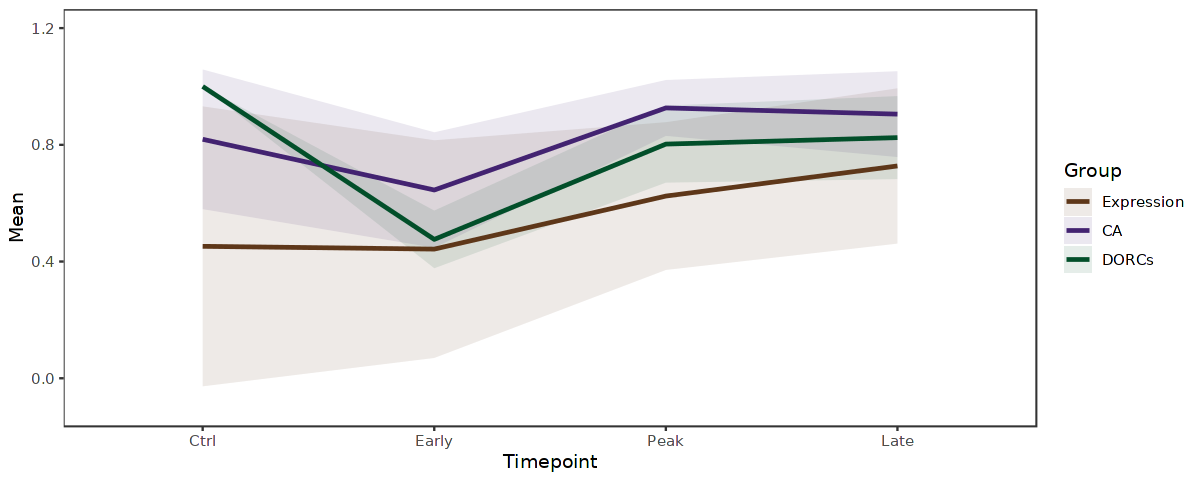

In [394]:
options(repr.plot.width=10, repr.plot.height=4)
ggplot(data = df, aes(x = Timepoint, group = Group)) + 
  geom_ribbon(aes(y = Mean, ymin = Mean - SD, ymax = Mean + SD, fill = Group), alpha = .1) +
  geom_line(aes(y = Mean, color = Group), size = 1) + 
  scale_color_manual(values=c("#5E3719", "#432371","#024F2A")) +
  scale_fill_manual(values=c("#5E3719", "#432371","#024F2A")) +
  ylim(-0.1, 1.2) +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())

###### 3.1.2.2.2 Category 2

In [395]:
gene_list <- c("Kank1","Nab2","Dennd3","AU020206","Pik3r5","Serpine1","Vim","Vgf","Trim56","Adam9","Socs1","Sorcs2","Cacng5","Shisa2","Tvp23a","Grik3","Spink10","Tgif2","Pdlim4","Gsap","Cacna1h","Hoxc10","Endod1","Vat1l","Ciita","Chl1","Syt4","Slc35f5","Casp7","Larp4b","Amotl1","Ido2","Ucn2","Lsp1","Fgl2","Pfkfb4","Fndc7","Piwil4","Ido1","Kirrel","Ptpn21","Elf4","Tmem196","Tubb6","Ric3","9530026P05Rik","Cd274","Arhgap28","Sdc3","Gm26658","Lrp1","Rgs20","Kcnk10","Hrh1","Ptpn5","Arhgap24","Syt6","Axl","Tnc","Gbp3")

In [396]:
df_DORCs <- tmp_sample_markers_DORCs_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_DORCs_scaled)],]
df_RNA <- tmp_sample_markers_RNA_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_RNA_sub_scaled)],]
df_GenePromAcc <- tmp_sample_markers_GenePromAcc_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_GenePromAcc_sub_scaled)],]

In [397]:
mean_RNA <- sapply(df_RNA, mean)
mean_GenePromAcc <- sapply(df_GenePromAcc, mean)
mean_DORCs <- sapply(df_DORCs, mean)

In [398]:
sd_RNA <- sapply(df_RNA, sd)
sd_GenePromAcc <- sapply(df_GenePromAcc, sd)
sd_DORCs <- sapply(df_DORCs, sd)

In [399]:
df <- data.frame(
  Mean=c(mean_RNA,mean_GenePromAcc,mean_DORCs),
  SD=c(sd_RNA,sd_GenePromAcc,sd_DORCs),
  Timepoint=rep(c("Ctrl","Early","Peak","Late"),3),
  Group=c(rep("Expression",4), rep("CA",4), rep("DORCs",4))
)

In [400]:
df$Timepoint <- factor(df$Timepoint, levels = c("Ctrl","Early","Peak","Late"))
df$Group <- factor(df$Group, levels = c("Expression","CA","DORCs"))

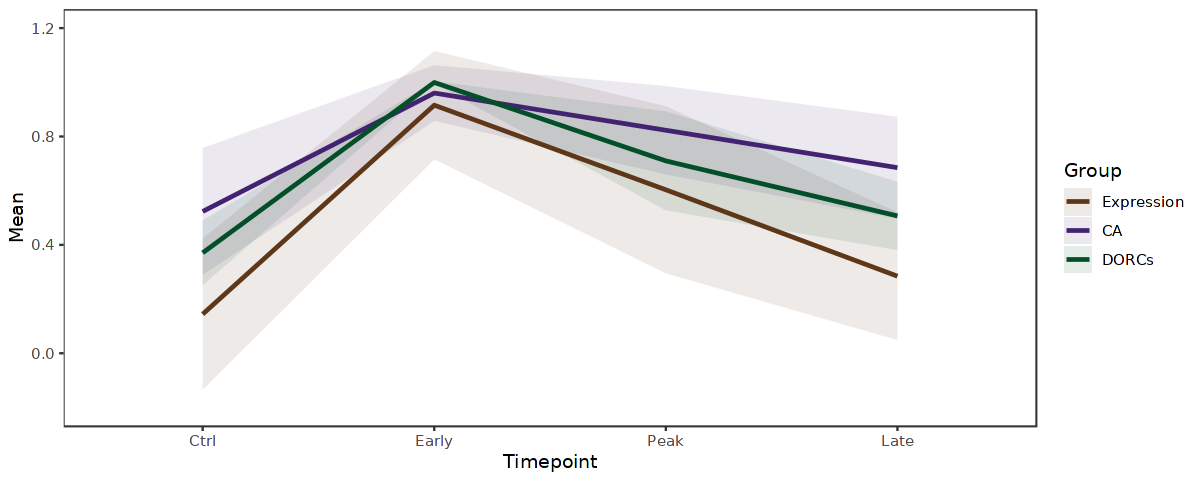

In [402]:
options(repr.plot.width=10, repr.plot.height=4)
ggplot(data = df, aes(x = Timepoint, group = Group)) + 
  geom_ribbon(aes(y = Mean, ymin = Mean - SD, ymax = Mean + SD, fill = Group), alpha = .1) +
  geom_line(aes(y = Mean, color = Group), size = 1) + 
  scale_color_manual(values=c("#5E3719", "#432371","#024F2A")) +
  scale_fill_manual(values=c("#5E3719", "#432371","#024F2A")) +
  ylim(-0.2, 1.2) +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())

###### 3.1.2.2.3 Category 3

In [403]:
gene_list <- c("Iigp1","Gbp2","Gbp5","Usp18","Gbp7","Stat1","Parp9","Gbp8","Gbp9","Igtp","Gm6034","Irx2","Tnxb","Irgm2","Ifi47","Irgm1","Tgtp2","Cmpk2","9930111J21Rik2","Zc3hav1","Ly6e","Rsad2","S100a11","Fzd10","S100a10","Igsf21","Gbp4","Gm3764","D430041D05Rik","Irf4","Mkx","C230038L03Rik","Nebl","Tnfrsf1b","Fzd9","Zfp385b","Ebf3","Ptpn18","Lpar3","Rnase1","Elmod2","Frem2","Khdrbs3","Zfp423","Frs2","2010300C02Rik","Hes3","Gm2694","Trabd2b","Trim12a","Trim34a","Trim5","Syde2","Filip1","Mdfic","Sema6d","Dhrs3","Ccdc3","Rin3","Tgfb2","Nln","Fam135b","Gm9922","Plcl2","Rxrg","Lmo7","Hmcn1","Aass","Slc24a4","4930517E11Rik")

In [404]:
df_DORCs <- tmp_sample_markers_DORCs_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_DORCs_scaled)],]
df_RNA <- tmp_sample_markers_RNA_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_RNA_sub_scaled)],]
df_GenePromAcc <- tmp_sample_markers_GenePromAcc_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_GenePromAcc_sub_scaled)],]

In [405]:
mean_RNA <- sapply(df_RNA, mean)
mean_GenePromAcc <- sapply(df_GenePromAcc, mean)
mean_DORCs <- sapply(df_DORCs, mean)

In [406]:
sd_RNA <- sapply(df_RNA, sd)
sd_GenePromAcc <- sapply(df_GenePromAcc, sd)
sd_DORCs <- sapply(df_DORCs, sd)

In [407]:
df <- data.frame(
  Mean=c(mean_RNA,mean_GenePromAcc,mean_DORCs),
  SD=c(sd_RNA,sd_GenePromAcc,sd_DORCs),
  Timepoint=rep(c("Ctrl","Early","Peak","Late"),3),
  Group=c(rep("Expression",4), rep("CA",4), rep("DORCs",4))
)

In [408]:
df$Timepoint <- factor(df$Timepoint, levels = c("Ctrl","Early","Peak","Late"))
df$Group <- factor(df$Group, levels = c("Expression","CA","DORCs"))

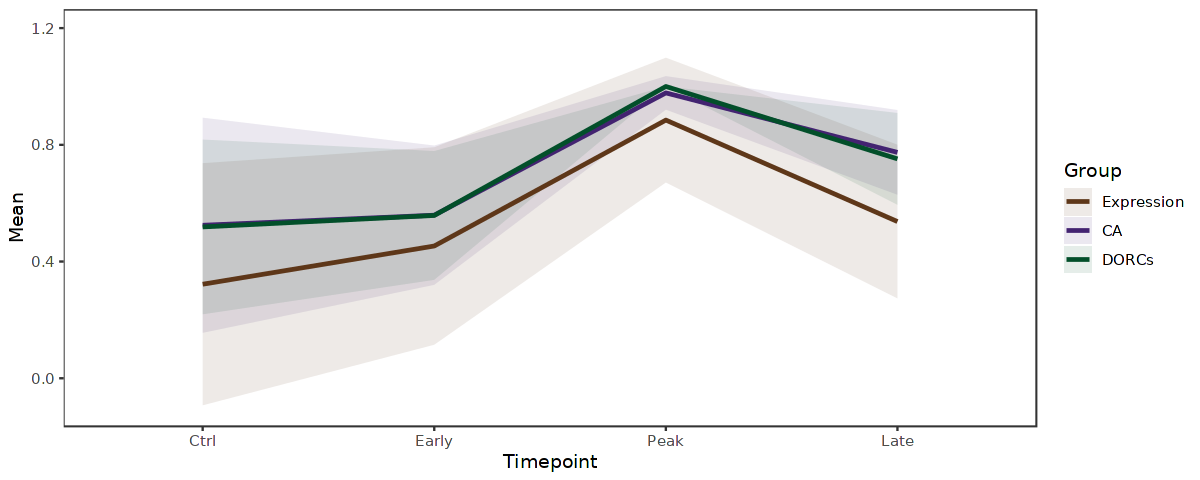

In [409]:
options(repr.plot.width=10, repr.plot.height=4)
ggplot(data = df, aes(x = Timepoint, group = Group)) + 
  geom_ribbon(aes(y = Mean, ymin = Mean - SD, ymax = Mean + SD, fill = Group), alpha = .1) +
  geom_line(aes(y = Mean, color = Group), size = 1) + 
  scale_color_manual(values=c("#5E3719", "#432371","#024F2A")) +
  scale_fill_manual(values=c("#5E3719", "#432371","#024F2A")) +
  ylim(-0.1, 1.2) +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())

###### 3.1.2.2.4 Category 4

In [410]:
gene_list <- c("Rapgef4","Bmp7","Gm27016","M5C1000I18Rik","Arl15","Rai14","Piezo2","Slc9b2","Gm17501","Ajap1")

In [411]:
df_DORCs <- tmp_sample_markers_DORCs_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_DORCs_scaled)],]
df_RNA <- tmp_sample_markers_RNA_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_RNA_sub_scaled)],]
df_GenePromAcc <- tmp_sample_markers_GenePromAcc_sub_scaled[gene_list[gene_list %in% rownames(tmp_sample_markers_GenePromAcc_sub_scaled)],]

In [412]:
mean_RNA <- sapply(df_RNA, mean)
mean_GenePromAcc <- sapply(df_GenePromAcc, mean)
mean_DORCs <- sapply(df_DORCs, mean)

In [413]:
sd_RNA <- sapply(df_RNA, sd)
sd_GenePromAcc <- sapply(df_GenePromAcc, sd)
sd_DORCs <- sapply(df_DORCs, sd)

In [414]:
df <- data.frame(
  Mean=c(mean_RNA,mean_GenePromAcc,mean_DORCs),
  SD=c(sd_RNA,sd_GenePromAcc,sd_DORCs),
  Timepoint=rep(c("Ctrl","Early","Peak","Late"),3),
  Group=c(rep("Expression",4), rep("CA",4), rep("DORCs",4))
)

In [415]:
df$Timepoint <- factor(df$Timepoint, levels = c("Ctrl","Early","Peak","Late"))
df$Group <- factor(df$Group, levels = c("Expression","CA","DORCs"))

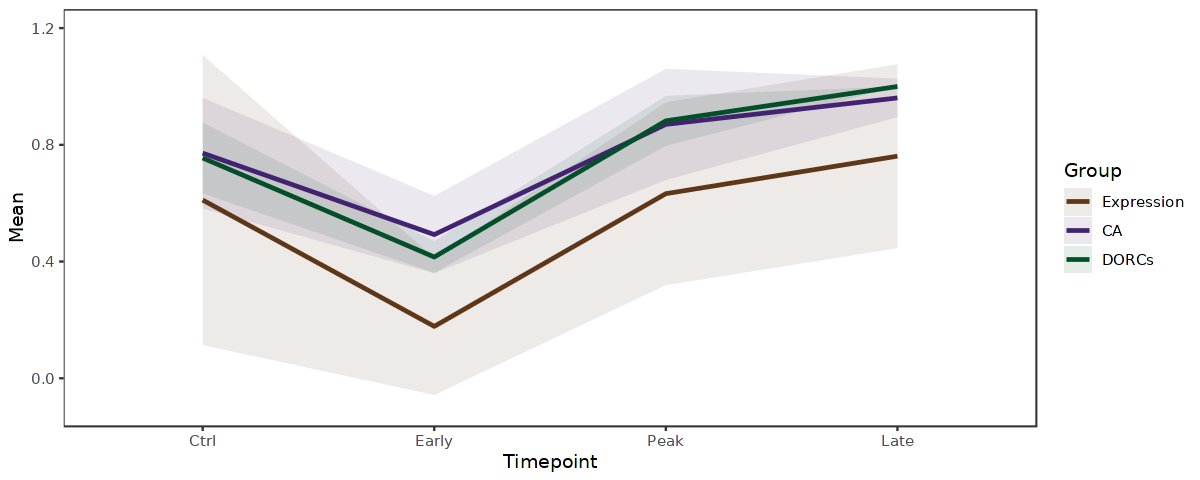

In [416]:
options(repr.plot.width=10, repr.plot.height=4)
ggplot(data = df, aes(x = Timepoint, group = Group)) + 
  geom_ribbon(aes(y = Mean, ymin = Mean - SD, ymax = Mean + SD, fill = Group), alpha = .1) +
  geom_line(aes(y = Mean, color = Group), size = 1) + 
  scale_color_manual(values=c("#5E3719", "#432371","#024F2A")) +
  scale_fill_manual(values=c("#5E3719", "#432371","#024F2A")) +
  ylim(-0.1, 1.2) +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())